# Statistics

## Package Load

In [1]:
import warnings
import random
import numpy as np
import pandas as pd

import pingouin as pg
import scipy.stats as stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
warnings.filterwarnings('ignore')

## Descriptive Statistics

### (1) Data

#### Univariable data

In [3]:
fish_data = np.array([2, 3, 3, 4, 4, 4, 4, 5, 5, 6])
fish_data

array([2, 3, 3, 4, 4, 4, 4, 5, 5, 6])

#### Multivariable data
- 열이 변수의 의미를 가지에 해야 분석이 용이
- 행 하나에 1개의 결과가 있도록 정리

In [4]:
state = pd.read_csv("./Practical_Statictics/data/state.csv")
state.head()

State  Population  Murder.Rate Abbreviation
0     Alabama     4779736          5.7           AL
1      Alaska      710231          5.6           AK
2     Arizona     6392017          4.7           AZ
3    Arkansas     2915918          5.6           AR
4  California    37253956          4.4           CA

In [5]:
shoes = pd.read_csv("./stats_for_python/3-2-2-shoes.csv")
shoes

store color  sales
0  tokyo  blue     10
1  tokyo   red     15
2  osaka  blue     13
3  osaka   red      9

In [6]:
fish_multi = pd.read_csv("./stats_for_python/3-2-1-fish_multi.csv")
fish_multi

species  length
0       A       2
1       A       3
2       A       4
3       B       6
4       B       8
5       B      10

In [7]:
### Grouping
group = fish_multi.groupby("species")
group.mean()

length
species        
A           3.0
B           8.0

In [8]:
group.std(ddof = 1)

length
species        
A           1.0
B           2.0

In [9]:
group.describe()

length                                    
         count mean  std  min  25%  50%  75%   max
species                                           
A          3.0  3.0  1.0  2.0  2.5  3.0  3.5   4.0
B          3.0  8.0  2.0  6.0  7.0  8.0  9.0  10.0

In [10]:
### Contingency table
cross = pd.pivot_table(
    data = shoes,
    values = "sales",
    aggfunc = "sum",
    index = "store",
    columns = "color"
)
cross

color  blue  red
store           
osaka    13    9
tokyo    10   15

In [11]:
lc_loans = pd.read_csv("./Practical_Statictics/data/lc_loans.csv")

In [12]:
crosstab = lc_loans.pivot_table(index='grade', columns='status', 
                                aggfunc=lambda x: len(x), margins=True)
crosstab

status  Charged Off  Current  Fully Paid  Late     All
grade                                                 
A              1562    50051       20408   469   72490
B              5302    93852       31160  2056  132370
C              6023    88928       23147  2777  120875
D              5007    53281       13681  2308   74277
E              2842    24639        5949  1374   34804
F              1526     8444        2328   606   12904
G               409     1990         643   199    3241
All           22671   321185       97316  9789  450961

In [13]:
df = crosstab.copy().loc['A':'G', :]
df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'], axis=0)
df['All'] = df['All'] / sum(df['All'])
df

status  Charged Off   Current  Fully Paid      Late       All
grade                                                        
A          0.021548  0.690454    0.281528  0.006470  0.160746
B          0.040054  0.709013    0.235401  0.015532  0.293529
C          0.049828  0.735702    0.191495  0.022974  0.268039
D          0.067410  0.717328    0.184189  0.031073  0.164708
E          0.081657  0.707936    0.170929  0.039478  0.077177
F          0.118258  0.654371    0.180409  0.046962  0.028614
G          0.126196  0.614008    0.198396  0.061401  0.007187

### (2) Numerical Descriptives

#### Measures of central location

In [14]:
### sum
fish_data.sum()

40

In [15]:
### length
len(fish_data)

10

In [16]:
### mean
fish_data.mean()

4.0

In [17]:
state['Population'].mean()

6162876.3

In [18]:
### geometric mean
# 곱셈으로 계산하는 값들의 평균
stats.gmean([1.0, 0.00001, 10000000000.])

46.415888336127786

In [19]:
### harmonic mean
# 변화율의 평균
stats.hmean([1.0, 0.00001, 10000000000.])

2.9999700002999943e-05

In [20]:
### trim mean
stats.trim_mean(fish_data, 0.2) # trim 비율도 파라미터로 들어감

4.0

In [21]:
stats.trim_mean(state['Population'], 0.1)

4783697.125

In [22]:
### Median
np.median(fish_data)

4.0

In [23]:
state['Population'].median()

4436369.5

In [24]:
# 이상치의 영향
fish_data_2 = np.array([2, 3, 3, 4, 4, 4, 4, 5, 5, 100])
print(np.mean(fish_data_2), np.median(fish_data_2))

13.4 4.0


In [25]:
### weighted mean
np.average(state['Murder.Rate'], weights=state['Population'])

4.445833981123393

In [26]:
### mode
stats.mode(fish_data)

ModeResult(mode=array([4]), count=array([4]))

In [27]:
stats.mode(state['Murder.Rate'])

ModeResult(mode=array([1.6]), count=array([3]))

In [28]:
state['Murder.Rate'].mode()

0    1.6
1    2.0
2    5.7
Name: Murder.Rate, dtype: float64

#### Measures of variability

In [29]:
### variance
# np.var(fish_data, ddof=0) # 동일
fish_data.var()

1.2

In [30]:
### Unbiased variance
# N-1로 나눔
np.var(fish_data, ddof=1) 

1.3333333333333333

In [31]:
### Std. deviation
# np.std(fish_data, ddof=0)
np.std(fish_data, ddof=1)

1.1547005383792515

In [32]:
state['Population'].std()

6848235.347401142

In [33]:
### Standardization
# 평균 0, 표준편차 1
print(np.mean((fish_data - fish_data.mean())/np.std(fish_data, ddof=0)))
print(np.std((fish_data - fish_data.mean())/np.std(fish_data, ddof=0)))

2.2204460492503132e-17
1.0


In [34]:
### Coefficient of Vriation
# 변동계수
# SD/mean

# max variation along rows of A; 
# rows: axis=0, cols: axis=1
# = np.std(fish_data, ddof=1)/np.mean(fish_data)
stats.variation(fish_data, axis=0, ddof=1) # 모집단의 변동계수

0.28867513459481287

In [35]:
from statsmodels import robust

In [36]:
### MAD (Mean Absolute Deviation from the median)
# 중간값과의 편차의 절댓값의 중간값
robust.scale.mad(state['Population'])

3849876.1459979336

In [37]:
### Mean absolute deviation
# 편차 절대평균
def mean_absolute_deviation(data, axis=None):
    return np.mean(np.absolute(data - np.mean(data, axis)), axis)

mean_absolute_deviation(state['Population'])

4450933.356000001

In [38]:
### Maximum, Minimum
### Range: Max - Min
fish_data.max() - fish_data.min()

4

In [39]:
### Quantile, Percentile
### IQR: Inter Quantile Range
state['Population'].quantile(0.75) - state['Population'].quantile(0.25)

4847308.0

In [40]:
state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

In [41]:
fish_data_3 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
print(np.percentile(fish_data_3, 25), np.percentile(fish_data_3, 75))

3.0 7.0


#### Measures of Relationship

In [42]:
### Covariance
cov_data = pd.read_csv("./stats_for_python/3-2-3-cov.csv")
cov_data

x   y
0  18.5  34
1  18.7  39
2  19.1  41
3  19.7  38
4  21.5  45
5  21.7  41
6  21.8  52
7  22.0  44
8  23.4  44
9  23.8  49

In [43]:
x = cov_data["x"]
y = cov_data["y"]

np.cov(x, y, ddof=0)

array([[ 3.2816,  6.906 ],
       [ 6.906 , 25.21  ]])

In [44]:
np.cov(x, y, ddof=1)

array([[ 3.64622222,  7.67333333],
       [ 7.67333333, 28.01111111]])

In [45]:
### Correlation
# N이든 N-1이든 동일한 값이 됨
cov_data.corr()

x         y
x  1.000000  0.759272
y  0.759272  1.000000

In [46]:
sp500_sym = pd.read_csv("./Practical_Statictics/data/sp500_sectors.csv")
sp500_px = pd.read_csv("./Practical_Statictics/data/sp500_data.csv.gz", index_col=0)

In [47]:
# Determine telecommunications symbols
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']

# Filter data for dates July 2012 through June 2015
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]
telecom.corr()

T       CTL       FTR        VZ      LVLT
T     1.000000  0.474683  0.327767  0.677612  0.278626
CTL   0.474683  1.000000  0.419757  0.416604  0.286665
FTR   0.327767  0.419757  1.000000  0.287386  0.260068
VZ    0.677612  0.416604  0.287386  1.000000  0.242199
LVLT  0.278626  0.286665  0.260068  0.242199  1.000000

#### Measure of distribution shape

In [48]:
### Skewness
# DataFrame/Series 형태로 변경하여 출력
state['Population'].skew()

2.6426346412748765

In [49]:
### Kurtosis
state['Population'].kurtosis()

8.722114728161502

#### Permutation & Combination

In [50]:
import itertools

In [51]:
tmp_list = list(range(10))
perm = len(list(itertools.permutations(tmp_list, 3)))
comb = len(list(itertools.combinations(tmp_list, 3)))
print(perm, comb)

720 120


In [52]:
from math import perm
from math import comb

In [53]:
### Python 3.8 이상에 적용
print(perm(10, 3))
print(comb(10, 3))

720
120


### (3) Discrete Probability Distribution

#### Binomial
- 베르누이 시행: 2 종류의 결과 중 하나만 발생시키는 시행
- 성공확률 p, N 회의 독립 베르누이 시행을 했을 때, 성공한 횟수 X의 확률분포

In [54]:
# PMF
stats.binom.pmf(k=1, n=2, p=0.5) # 성공횟수, 시행횟수, 성공확률

0.5000000000000002

In [55]:
# CDF
stats.binom.cdf(k=2, n=5, p=0.1)

0.99144

In [56]:
np.random.seed(1)
stats.binom.rvs(n=10, p=0.2, size=5) # 시행횟수 n, 성공확률 p, 5번 반복 sampling

array([2, 3, 0, 1, 1])

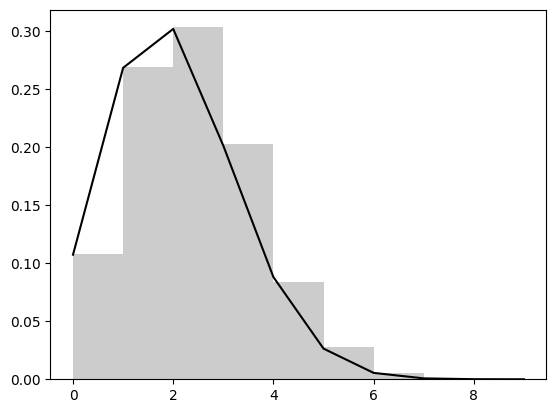

In [57]:
binomial = stats.binom(n=10, p=0.2)

np.random.seed(1)
rvs_binomial = binomial.rvs(size=10000)

m = np.arange(0, 10, 1)
sns.distplot(rvs_binomial, bins=m, kde=False, norm_hist=True, color='gray')
plt.plot(m, binomial.pmf(k=m), color='black')
plt.show()

#### Multinomial
- 이항분포의 확장형으로, 확률변수의 범주가 3가지 이상인 경우 

In [58]:
# n: Number of trials
# p (array-like): Probability of a trial falling into each category; should sum to 1
rv = stats.multinomial(8, [0.3, 0.2, 0.5])
rv.pmf([1, 3, 4])

0.04200000000000007

In [59]:
stats.multinomial.pmf([[3, 4], [3, 5]], n=[7, 8], p=[.3, .7])

array([0.2268945 , 0.25412184])

In [60]:
stats.multinomial.cov([4, 5], [[.3, .7], [.4, .6]])

array([[[ 0.84, -0.84],
        [-0.84,  0.84]],

       [[ 1.2 , -1.2 ],
        [-1.2 ,  1.2 ]]])

#### Poisson
- 카운트 데이터 (0 이상의 정수)의 확률분포
- p -> 0, N -> Inf의 조건에서 이항분포 Np=λ

In [61]:
stats.poisson.pmf(k=2, mu=5)

0.08422433748856832

In [62]:
stats.poisson.cdf(k=2, mu=5)

0.12465201948308108

In [63]:
# λ=2인 Possion
np.random.seed(1)
stats.poisson.rvs(mu=2, size=5)

array([2, 1, 0, 1, 2])

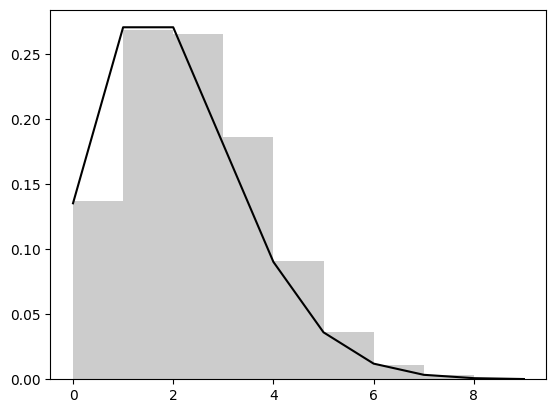

In [64]:
poisson = stats.poisson(mu=2)

np.random.seed(1)
rvs_poisson = poisson.rvs(size = 10000)
pmf_poisson = poisson.pmf(k=m)

sns.distplot(rvs_poisson, bins=m, kde=False, norm_hist=True, color='gray')
plt.plot(m, pmf_poisson, color='black')

Mean: N*p = 2.0


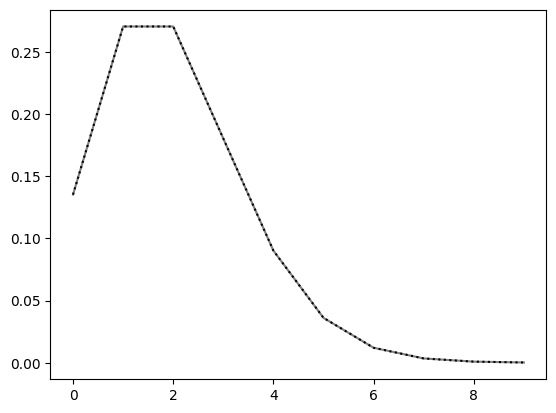

In [65]:
# N이 크고 p가 작을 때의 이항분포
N = 100000000
p = 0.00000002
print("Mean: N*p =", N*p)
binomial_2 = stats.binom(n=N, p=p)

pmf_binomial_2 = binomial_2.pmf(k=m)

sns.lineplot(x=m, y=pmf_poisson, color='gray')
sns.lineplot(x=m, y=pmf_binomial_2, color='black', linestyle='dotted')
plt.show()

#### Negative Binomial
- 카운트 데이터의 확률분포
- 성공 횟수 r회가 될 때까지의 시행횟수를 확률변수로 둠
- Poission보다 분산이 큰 경우

In [66]:
n, p = 5, 0.5 # 0.5 확률의 시행을 5회 성공할 때까의 시행횟수가 확률변수
mean, var, skew, kurt = stats.nbinom.stats(n, p, moments='mvsk')

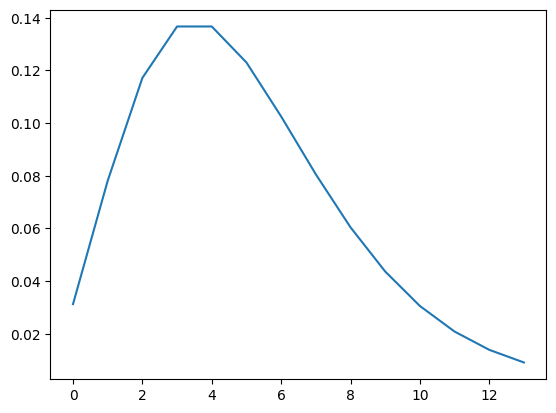

In [67]:
x = np.arange(stats.nbinom.ppf(0.01, n, p), stats.nbinom.ppf(0.99, n, p))
sns.lineplot(stats.nbinom(n, p).pmf(x))
plt.show()

#### Geometric
- 1회 성공까지의 시행횟수가 확률변수
- Negative Binomial의 특수 케이스

In [68]:
p = 0.5
mean, var, skew, kurt = stats.geom.stats(p, moments='mvsk')

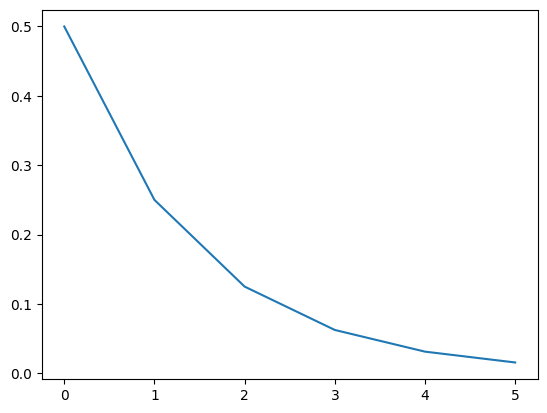

In [69]:
x = np.arange(stats.geom.ppf(0.01, p), stats.geom.ppf(0.99, p))
sns.lineplot(stats.geom(p).pmf(x))
plt.show()

#### Hypergeometric
- 비복원 추출(독립이 아닌) 사건에서의 이항확률분포
- 모집단 개수 N, 모집단에서 사건이 일어난 횟수 D, 샘플 개수 n
- p = D/N
- X: 표본에서 사건의 개수에 해당하는 개수
- 평균 np, 표준편차 np(1-p)((N-n)/(N-1)) 

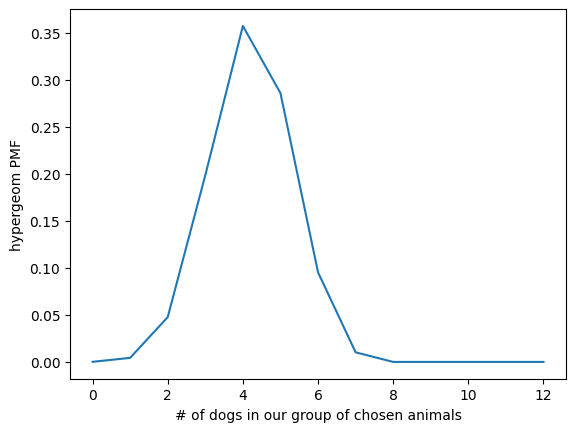

In [70]:
[N, D, n] = [20, 7, 12]

rv = stats.hypergeom(N, D, n)
x = np.arange(0, n + 1)

pmf_dogs = rv.pmf(x)

fig = plt.figure()

sns.lineplot(x=x, y=pmf_dogs)
plt.xlabel('# of dogs in our group of chosen animals')
plt.ylabel('hypergeom PMF')
plt.show()

### (4) Continuous Probability Distribution

#### Uniform
- 분포가 특정 범위 내에서 균등하게 나타나는 분포

In [71]:
stats.uniform(loc=0, scale=1)

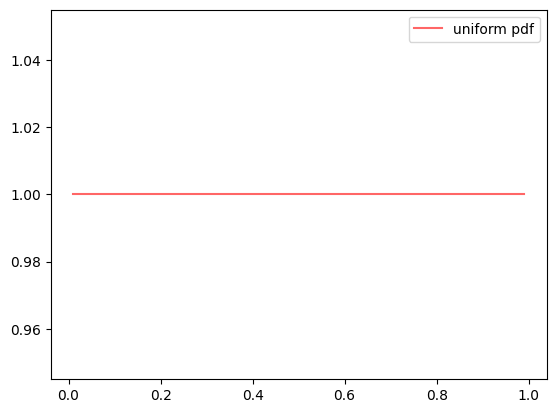

In [72]:
x = np.linspace(stats.uniform.ppf(0.01), stats.uniform.ppf(0.99), 100)
sns.lineplot(x=x, y=stats.uniform(loc=0, scale=1).pdf(x), color='red', alpha=0.6, label='uniform pdf') # location과 scale 조정해서 분포 생성 가능
plt.show()

#### Normal

In [73]:
### PDF
stats.norm.pdf(loc=4, scale=0.8, x=3) # 확률변수 x가 3일때의 확률값

0.2283113567362774

In [74]:
norm_dist = stats.norm(loc=4, scale=0.8)
norm_dist.pdf(x=3)

0.2283113567362774

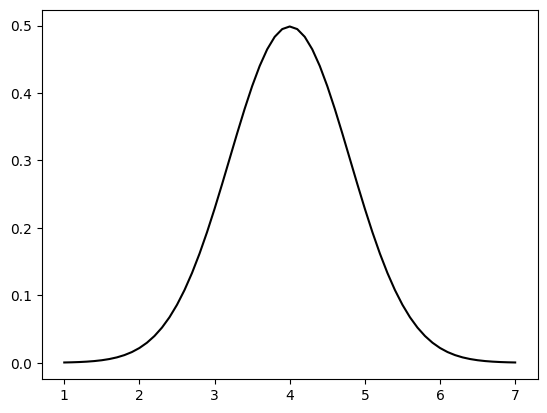

In [75]:
x_plot = np.arange(start=1, stop=7.1, step=0.1)
sns.lineplot(x=x_plot, y=stats.norm.pdf(x=x_plot, loc=4, scale=0.8), color = 'black')
plt.show()

In [76]:
### CDF
stats.norm.cdf(loc=4, scale=0.8, x=3)

0.10564977366685535

In [77]:
### PPF (Percent Point Function)
# 누적확률이 q가 되는 확률변수 값
stats.norm.ppf(loc=4, scale=0.8, q=0.025)

2.4320288123679563

In [78]:
sitagawa = stats.norm.cdf(loc=4, scale=0.8, x=3)
stats.norm.ppf(loc=4, scale=0.8, q=sitagawa)

3.0000000000000004

In [79]:
# q가 0.5인 지점 = 평균
stats.norm.ppf(loc=4, scale=0.8, q=0.5)

4.0

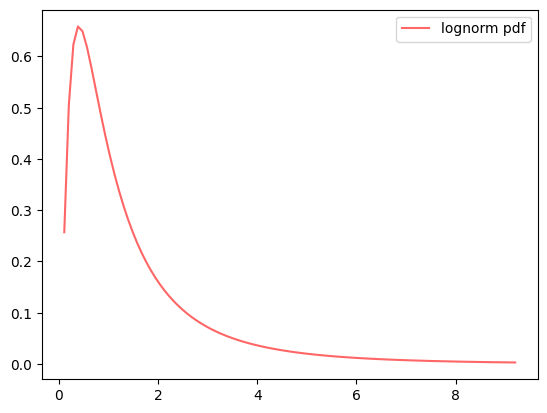

In [80]:
### (참고) Log-normal distribution
# 로그를 취한 변수가 정규분포를 따르는 경우
# ln(X) ~ N(mu, sigma)
s = 0.954 # shape parameter
x = np.linspace(stats.lognorm.ppf(0.01, s), stats.lognorm.ppf(0.99, s), 100)
sns.lineplot(x=x, y=stats.lognorm.pdf(x, s), color='red', alpha=0.6, label='lognorm pdf')
plt.show()

#### Student T
- 평균 검정을 위해 만들어진 분포
- 표준정규분포에서, 모분산 simga**2가 Chi-sq(n)으로 추정된 경우
- 표준정규분포보다 꼬리가 더 두꺼운 형태

<Axes: >

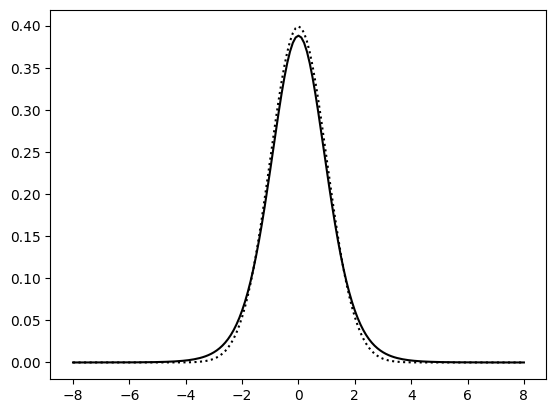

In [81]:
# 평균 0, 분산 n/(n-2)
# n이 커지면 표준정규분포에 근사
x = np.arange(start=-8, stop=8.1, step=0.1)
sns.lineplot(x=x, y=stats.norm.pdf(x=x), color='black', linestyle='dotted')
sns.lineplot(x=x, y=stats.t.pdf(x=x, df=9), color='black')

#### Chi-square
- k개의 서로 독립적인 표준정규 확률변수를 각각 제곱한 다음 합해서 얻어지는 분포
- Gamma 분포의 특수한 형태
- Chi-sq ~ Gamma(r/2, 2), r은 자유도

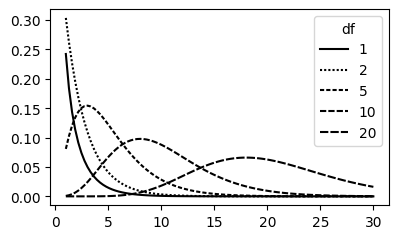

In [82]:
x = [1 + i * (30 - 1) / 99 for i in range(100)]

chi = pd.DataFrame({
    'x': x,
    'chi_1': stats.chi2.pdf(x, df=1),
    'chi_2': stats.chi2.pdf(x, df=2),
    'chi_5': stats.chi2.pdf(x, df=5),
    'chi_10': stats.chi2.pdf(x, df=10),
    'chi_20': stats.chi2.pdf(x, df=20),
})
fig, ax = plt.subplots(figsize=(4, 2.5))
ax.plot(chi.x, chi.chi_1, color='black', linestyle='-', label='1')
ax.plot(chi.x, chi.chi_2, color='black', linestyle=(0, (1, 1)), label='2')
ax.plot(chi.x, chi.chi_5, color='black', linestyle=(0, (2, 1)), label='5')
ax.plot(chi.x, chi.chi_10, color='black', linestyle=(0, (3, 1)), label='10')
ax.plot(chi.x, chi.chi_20, color='black', linestyle=(0, (4, 1)), label='20')
ax.legend(title='df')

plt.tight_layout()
plt.show()

#### F
- 두 개의 카이제곱 변수의 비로 표현되는 분포

In [83]:
stats.f.pdf(sorted(x), dfn=1, dfd=10)

array([2.30361989e-01, 1.75326213e-01, 1.37509636e-01, 1.10124770e-01,
       8.95846844e-02, 7.37825167e-02, 6.13877908e-02, 5.15150896e-02,
       4.35514142e-02, 3.70590924e-02, 3.17178318e-02, 2.72884591e-02,
       2.35893389e-02, 2.04805419e-02, 1.78529302e-02, 1.56204596e-02,
       1.37146444e-02, 1.20805099e-02, 1.06735892e-02, 9.45766471e-03,
       8.40305134e-03, 7.48527663e-03, 6.68405716e-03, 5.98249794e-03,
       5.36646102e-03, 4.82406438e-03, 4.34528130e-03, 3.92161829e-03,
       3.54585461e-03, 3.21183059e-03, 2.91427459e-03, 2.64866111e-03,
       2.41109373e-03, 2.19820826e-03, 2.00709224e-03, 1.83521781e-03,
       1.68038554e-03, 1.54067721e-03, 1.41441605e-03, 1.30013318e-03,
       1.19653908e-03, 1.10249941e-03, 1.01701439e-03, 9.39201148e-04,
       8.68278623e-04, 8.03554613e-04, 7.44414601e-04, 6.90312134e-04,
       6.40760499e-04, 5.95325512e-04, 5.53619262e-04, 5.15294670e-04,
       4.80040738e-04, 4.47578418e-04, 4.17656983e-04, 3.90050860e-04,
      

#### Exponential
- 한 사건이 일어날때까지의 시간이나 거리에 대한 분포

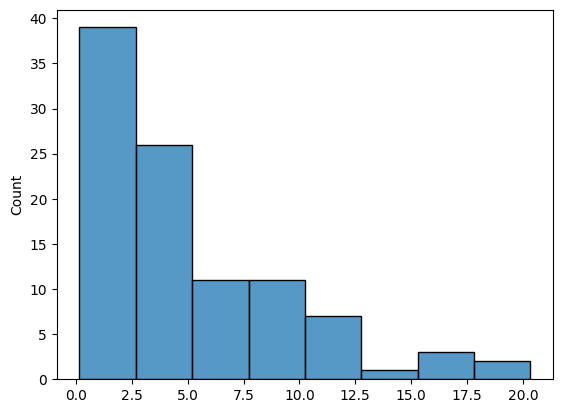

In [84]:
sample = stats.expon.rvs(scale=5, size=100) # 주기별 평균 사건 수 5
sns.histplot(sample)
plt.show()

####  Weibull
- 사건 발생률이 시간에 따라 변화
    - beta > 1이면 발생률이 시간이 지남에 따라 증가, 작으면 감소
- 지수분포의 일반화 버전

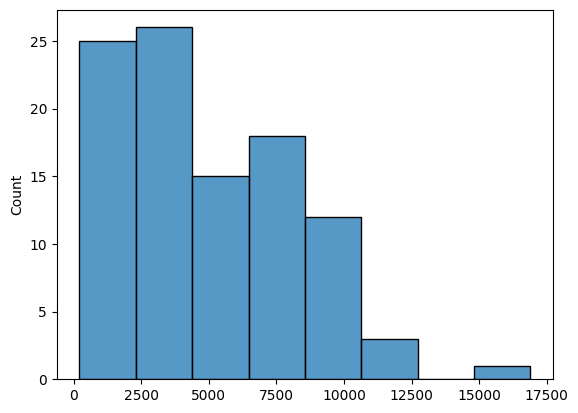

In [85]:
sample = stats.weibull_min.rvs(1.5, scale=5000, size=100) # beta 1.5
sns.histplot(sample)
plt.show()

#### Gamma
- shape (alpha), scale (beta)
- 지수 분포나 포아송 분포 등의 매개변수에 대한 켤레 사전 확률 분포이며, 이에 따라 베이즈 확률론에서 사전 확률 분포로 사용
- 사건이 k번 발생할 때까지의 시간 ~ Gamma(k, 1/lambda). lambda는 포아송 분포의 파라미터
    - 지수분포는 Gamma(1, 1/lambda)와 동일

In [86]:
x = np.linspace(0, 20, 101)

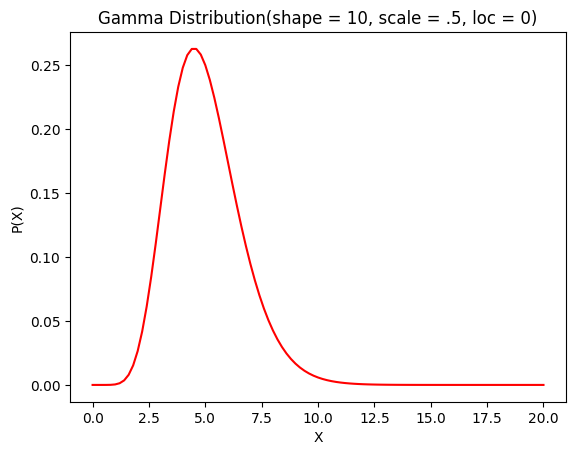

In [87]:
y = stats.gamma(10, 0, 0.5).pdf(x)        

sns.lineplot(x=x, y=y, color='red')        
plt.xlabel('X')
plt.ylabel('P(X)')
plt.title('Gamma Distribution(shape = 10, scale = .5, loc = 0)') 
plt.show()

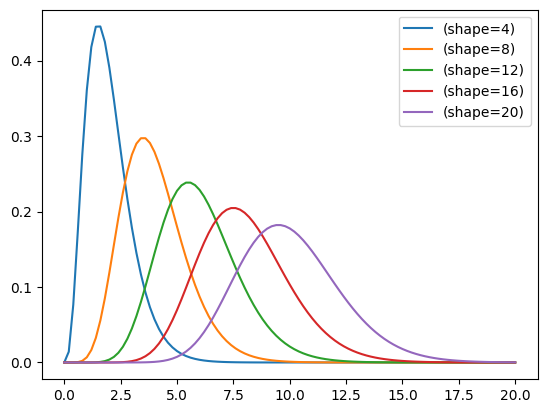

In [88]:
for shape in np.arange(4, 24, 4):
    sns.lineplot(x=x, y=stats.gamma(shape, 0, 0.5).pdf(x), label='(shape=' + str(shape) + ')')

plt.legend()
plt.show()

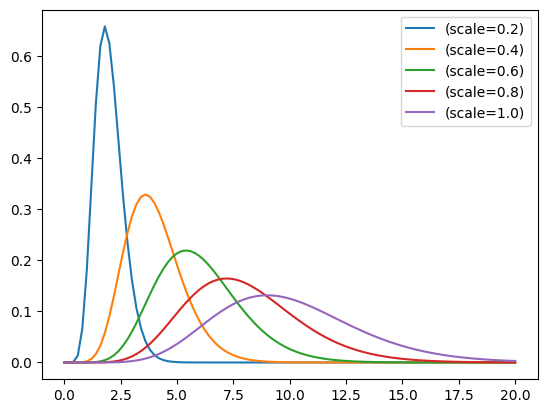

In [89]:
for scale in np.arange(2, 12, 2) / 10:
    sns.lineplot(x=x, y=stats.gamma(10, 0, scale).pdf(x), label='(scale=' + str(scale) + ')')

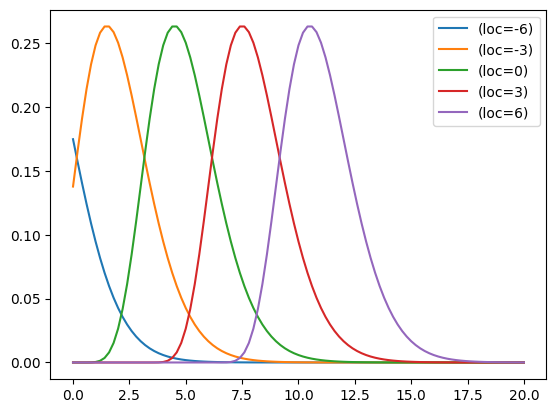

In [90]:
for loc in np.arange(5) * 3 - 6:
    sns.lineplot(x=x, y=stats.gamma(10, loc, 0.5).pdf(x), label='(loc=' + str(loc) + ')')
plt.legend()
plt.show()

#### Beta
- 두 개의 감마분포의 조합으로 만들어지는 파생분포
- Beta ~ Gamma(alpha + beta, 1)
- 0부터 1까지의 값을 가질 수 있는 베르누이시행 모수 𝜇의 값을 베이지안 추정한 결과를 표현한 것
- 사전정보가 없는 베이즈 통계에서 사전확률로 많이 쓰임

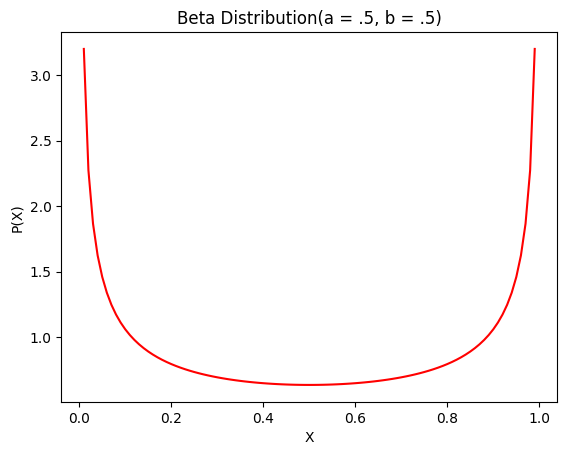

In [91]:
x = np.linspace(.01, .99, 99)
a = .5
b = .5
y1 = stats.beta(a, b).pdf(x)        

sns.lineplot(x=x, y=y1, color='red')        
plt.xlabel('X')
plt.ylabel('P(X)')
plt.title('Beta Distribution(a = .5, b = .5)') 
plt.show()

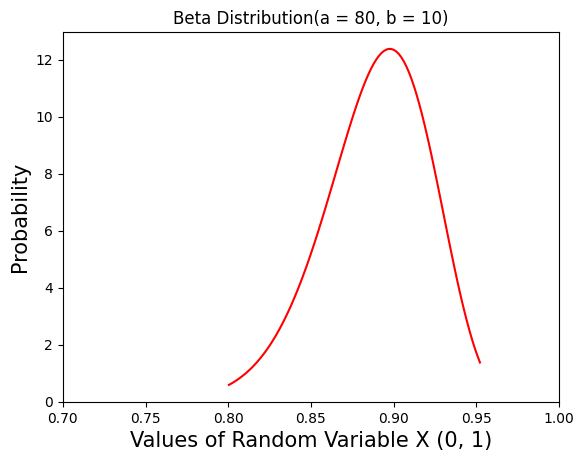

In [92]:
# Set the shape paremeters
a, b = 80, 10

# Generate the value between
x = np.linspace(stats.beta.ppf(0.01, a, b), stats.beta.ppf(0.99, a, b), 100)

# Plot the beta distribution
plt.xlim(0.7, 1)
sns.lineplot(x=x, y=stats.beta.pdf(x, a, b), color='red')
plt.xlabel('Values of Random Variable X (0, 1)', fontsize='15')
plt.ylabel('Probability', fontsize='15')
plt.title('Beta Distribution(a = 80, b = 10)') 
plt.show()

#### Dirichlet
- 베타 분포의 다변수 확장
- 베이즈 통계학에서 다항 분포에 대한 사전 켤레확률분포 

In [93]:
quantiles = np.array([0.2, 0.2, 0.6])  # specify quantiles
alpha = np.array([0.4, 5, 15])  # specify concentration parameters

stats.dirichlet.pdf(quantiles, alpha)

0.2843831684937255

In [94]:
### log scale
stats.dirichlet.logpdf(quantiles, alpha)

-1.2574327653159187

In [95]:
stats.dirichlet.rvs(alpha, size=2, random_state=2)

array([[0.01639427, 0.1292273 , 0.85437844],
       [0.00156917, 0.19033695, 0.80809388]])

## Bayesian Analysis
- 관측값을 통해 모델의 확률분포(파라미터)를 업데이트하는 추론

### (1) Markov Chain
- Markov property
- 다음 상태의 사건이 발생할 확률 정의
- 각 이벤트의 확률은 이전 상태에만 영향을 받음

In [96]:
# The statespace
states = ["Sleep", "Icecream", "Run"]

# Possible sequences of events
transition_name = [["SS", "SR", "SI"],["RS", "RR", "RI"],["IS", "IR", "II"]]

# Probabilities matrix (transition matrix)
transition_matrix = [[0.2, 0.6, 0.2], [0.1, 0.6, 0.3], [0.2, 0.7, 0.1]]

In [97]:
# 확률의 합은 1 미만이어야 함
if sum(transition_matrix[0]) + sum(transition_matrix[1]) + sum(transition_matrix[2]) != 3:
    print("Somewhere, something went wrong. Transition matrix, perhaps?")
else: print("All is gonna be okay, you should move on!! ;)")

All is gonna be okay, you should move on!! ;)


In [98]:
# A function that implements the Markov model to forecast the state/mood.
def activity_forecast(days):
    # Choose the starting state
    activity_today = "Sleep"
    print("Start state: " + activity_today)
    
    # Shall store the sequence of states taken. So, this only has the starting state for now.
    activity_list = [activity_today]
    i = 0
    # To calculate the probability of the activityList
    prob = 1
    while i != days:
        if activity_today == "Sleep":
            change = np.random.choice(transition_name[0], replace=True, p=transition_matrix[0])
            if change == "SS":
                prob = prob * 0.2
                activity_list.append("Sleep")
                pass
            elif change == "SR":
                prob = prob * 0.6
                activity_today = "Run"
                activity_list.append("Run")
            else:
                prob = prob * 0.2
                activity_today = "Icecream"
                activity_list.append("Icecream")
        elif activity_today == "Run":
            change = np.random.choice(transition_name[1],replace=True,p=transition_matrix[1])
            if change == "RR":
                prob = prob * 0.5
                activity_list.append("Run")
                pass
            elif change == "RS":
                prob = prob * 0.2
                activity_today = "Sleep"
                activity_list.append("Sleep")
            else:
                prob = prob * 0.3
                activity_today = "Icecream"
                activity_list.append("Icecream")
        elif activity_today == "Icecream":
            change = np.random.choice(transition_name[2], replace=True, p=transition_matrix[2])
            if change == "II":
                prob = prob * 0.1
                activity_list.append("Icecream")
                pass
            elif change == "IS":
                prob = prob * 0.2
                activity_today = "Sleep"
                activity_list.append("Sleep")
            else:
                prob = prob * 0.7
                activity_today = "Run"
                activity_list.append("Run")
        i += 1 
    print("Possible states: " + str(activity_list))
    print("End state after "+ str(days) + " days: " + activity_today)
    print("Probability of the possible sequence of states: " + str(prob))

    return activity_list

# Function that forecasts the possible state for the next 2 days
activity_forecast(2)

Start state: Sleep
Possible states: ['Sleep', 'Run', 'Run']
End state after 2 days: Run
Probability of the possible sequence of states: 0.3


['Sleep', 'Run', 'Run']

In [99]:
# To save every activityList
list_activity = []
count = 0

# `Range` starts from the first count up until but excluding the last count
for iterations in range(1, 10):
    list_activity.append(activity_forecast(2))


# Iterate through the list to get a count of all activities ending in state:'Run'
for smaller_list in list_activity:
    if(smaller_list[2] == "Run"):
        count += 1

# Calculate the probability of starting from state:'Sleep' and ending at state:'Run'
percentage = (count/10000) * 100
print("The probability of starting at state:'Sleep' and ending at state:'Run'= " + str(percentage) + "%")

Start state: Sleep
Possible states: ['Sleep', 'Run', 'Run']
End state after 2 days: Run
Probability of the possible sequence of states: 0.3
Start state: Sleep
Possible states: ['Sleep', 'Run', 'Run']
End state after 2 days: Run
Probability of the possible sequence of states: 0.3
Start state: Sleep
Possible states: ['Sleep', 'Run', 'Run']
End state after 2 days: Run
Probability of the possible sequence of states: 0.3
Start state: Sleep
Possible states: ['Sleep', 'Run', 'Run']
End state after 2 days: Run
Probability of the possible sequence of states: 0.3
Start state: Sleep
Possible states: ['Sleep', 'Run', 'Run']
End state after 2 days: Run
Probability of the possible sequence of states: 0.3
Start state: Sleep
Possible states: ['Sleep', 'Run', 'Run']
End state after 2 days: Run
Probability of the possible sequence of states: 0.3
Start state: Sleep
Possible states: ['Sleep', 'Run', 'Icecream']
End state after 2 days: Icecream
Probability of the possible sequence of states: 0.18
Start sta

### (2) Hidden Markov Model
- 독립 혼합 모형에서 연속 확률 분포를 선택하는 이산 확률 과정 𝐶𝑡가 Markov Chain이고 연속 확률 분포𝑋𝑡 가 그 시점의 이산 확률 과정의 값에만 의존하는 모형
- 연속 확률 분포의 값 𝑋𝑡 만 측정 가능하고 이산 확률 과정의 값 𝐶𝑡 는 측정할 수 없음
- 독립 혼합 모형(Independent Mixuture Model)
    - 연속 확률 변수이지만 단일한 확률 분포를 가지지 않고 복수의 연속 확률 분포 중 하나를 확률적으로 선택하는 모형
    - ex. 베르누이-정규 혼합 모형(Bernoulli Normal-Mixuture Model)은 베르누이 확률 변수의 값에 따라 두 개의 서로 다른 연속 정규 분포 중 하나를 선택하는 확률 분포

In [100]:
# !pip install hmmlearn
from hmmlearn import hmm

In [101]:
# 베르누이 - 정규분포
model = hmm.GaussianHMM(n_components=2, covariance_type="diag")
model.startprob_ = np.array([0.9, 0.1])
model.transmat_ = np.array([[0.95, 0.05], [0.15, 0.85]])
model.means_ = np.array([[1.0], [-3.0]])
model.covars_ = np.array([[15.0], [40.0]])
X, Z = model.sample(500)

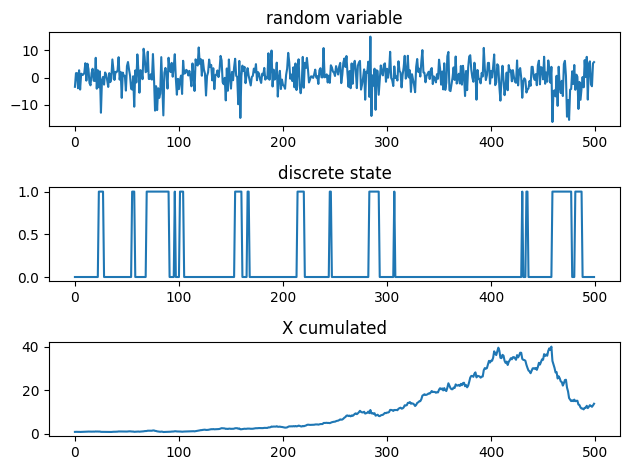

In [102]:
plt.subplot(311)
plt.plot(X)
plt.title("random variable")
plt.subplot(312)
plt.plot(Z)
plt.title("discrete state")
plt.subplot(313)
plt.plot((1 + 0.01*X).cumprod())
plt.title("X cumulated")
plt.tight_layout()
plt.show()

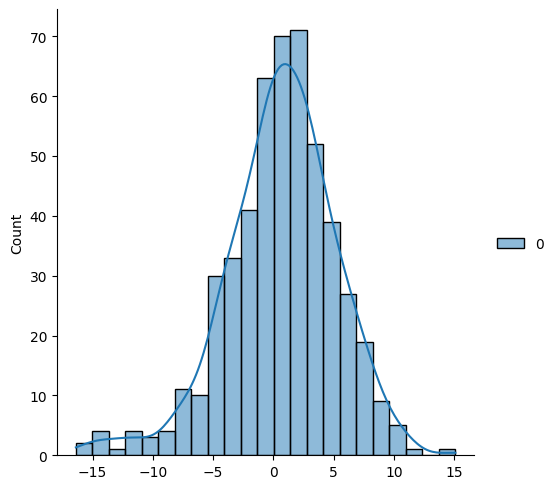

In [103]:
sns.displot(X, kde=True)
plt.show()

In [104]:
### Decode
# 관측된 히든 마코프 모형의 연속 확률 변수 값으로부터 내부의 이산 확률 변수 값을 추정하는 과정
model2 = hmm.GaussianHMM(n_components=2, n_iter=len(X)).fit(X)
model2

GaussianHMM(n_components=2, n_iter=500)

In [105]:
Z_hat = model2.decode(X)[1]
X_cum = (1 + 0.01*X).cumprod()
X_cum_hat = X_cum.copy()
X_cum_hat[Z_hat == 0] = np.nan

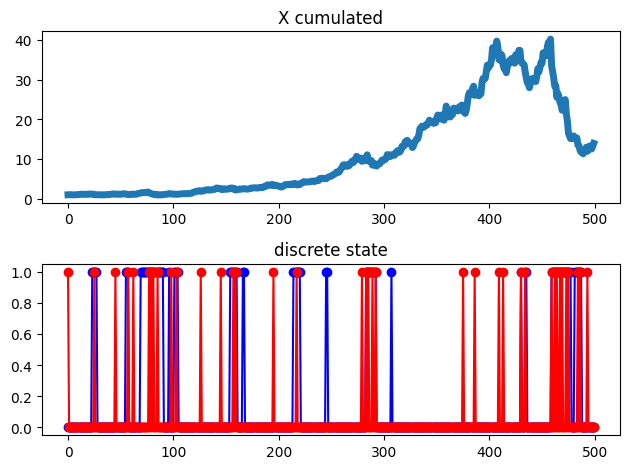

In [106]:
plt.subplot(211)
plt.plot(X_cum, lw=5)
plt.plot(X_cum_hat, 'r-', lw=5)
plt.title("X cumulated")
plt.subplot(212)
plt.plot(Z, 'bo-')
plt.plot(Z_hat, 'ro-')
plt.title("discrete state")
plt.tight_layout()
plt.show()

### (3) MCMC (Markov Chain Monte Carlo)
- Markov Chain을 이용하는 표본 생성 방법
- 어떤 상태가 끊임없이 움직이고 있는 체인 상태의 샘플링
- Markov Chain인의 수렴분포가 원하는 분포 𝑝(𝑥)가 되도록 하는 마코프 체인을 만들고 이 마코프 체인을 𝑡′시간 이상 가동하면 그 다음부터는 원하는 분포의 표본을 얻을 수 있음
- Metropolis-Hastings(MH) 알고리즘
    - 사전분포를 제안하고, 현재 샘플링 파라미터 θt가 다음 샘플 θnew 로 전이될 확률을 사후확률의 비로 결정
- 수행 단계
    - 현재 위치에서 시작한다
    - 새로 이동할 위치를 조사한다 → 주변의 sample을 조사
    - 데이터와 사전확률분포에 따른 위치를 바탕으로 새로운 위치를 수용하거나 기각한다 → sample이 해당 사후확률분포에서 나올 가능성을 조사
    - 수용한다면 새로운 위치로 이동하고 1단계로 돌아간다.

In [107]:
# !pip install pymc3
import pymc3 as pm

Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [x]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 6 seconds.
The number of effective samples is smaller than 10% for some parameters.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


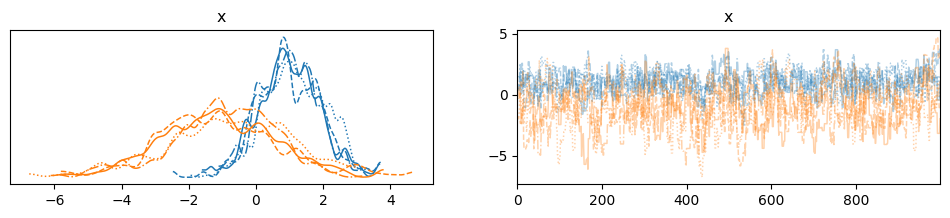

In [108]:
# 2차원 정규분포 표본 생성
cov = np.array([[1., 1.5], [1.5, 4]])
mu = np.array([1, -1])

with pm.Model() as model:
    x = pm.MvNormal('x', mu=mu, cov=cov, shape=(1, 2))
    step = pm.Metropolis()
    trace = pm.sample(1000, step)

pm.traceplot(trace)
plt.show()

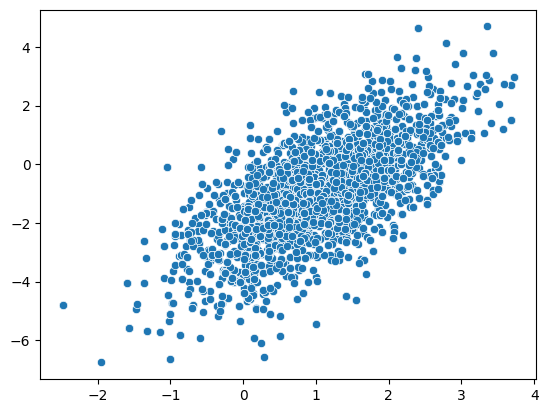

In [109]:
sns.scatterplot(x=trace['x'][:, 0, 0], y=trace['x'][:, 0, 1])
plt.show()

In [110]:
### Baysian Estimation
# 𝑃(𝜃): Beta - 사전분포
# 𝑃(𝑥1,…,𝑥𝑁∣𝜃): Binomial - 사후분포
theta0 = 0.7
np.random.seed(0)
x_data1 = stats.bernoulli(theta0).rvs(10) # 10개의 베르누이 표본
x_data1

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1])

In [111]:
with pm.Model() as model:
    theta = pm.Beta('theta', alpha=1, beta=1) # Beta dist
    x = pm.Bernoulli('x', p=theta, observed=x_data1)
    start = pm.find_MAP()
    step = pm.NUTS()
    trace1 = pm.sample(2000, step=step, start=start)

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


/Users/hyunjoong/Library/Python/3.9/lib/python/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/hyunjoong/Library/Python/3.9/lib/python/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/hyunjoong/Library/Python/3.9/lib/python/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/hyunjoong/Library/Python/3.9/lib/python/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 7 seconds.


Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


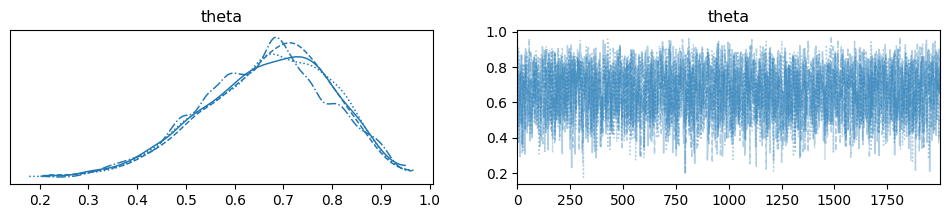

In [112]:
pm.traceplot(trace1)
plt.show()

Got error No model on context stack. trying to find log_likelihood in translation.


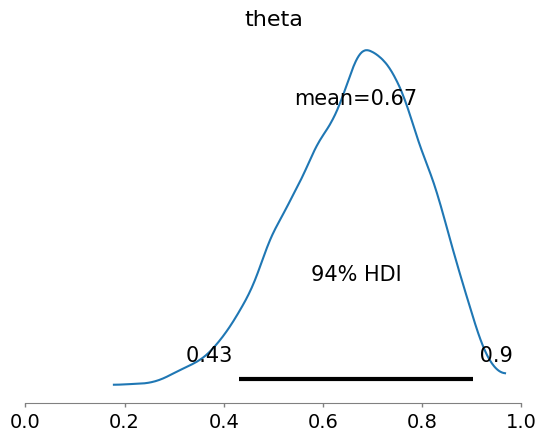

In [113]:
pm.plot_posterior(trace1)
plt.xlim(0, 1)
plt.show()

In [114]:
pm.summary(trace1)

Got error No model on context stack. trying to find log_likelihood in translation.


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
theta  0.665  0.131   0.431    0.903      0.002    0.002    3484.0    4822.0   

       r_hat  
theta    1.0

In [115]:
x_data2 = stats.bernoulli(theta0).rvs(500) # 500개의 베르누이 표본

In [116]:
with pm.Model() as model:
    theta = pm.Beta('theta', alpha=1, beta=1)
    x = pm.Bernoulli('x', p=theta, observed=x_data2)
    start = pm.find_MAP()
    step = pm.NUTS()
    trace2 = pm.sample(1000, step=step, start=start)

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


/Users/hyunjoong/Library/Python/3.9/lib/python/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/hyunjoong/Library/Python/3.9/lib/python/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/hyunjoong/Library/Python/3.9/lib/python/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/hyunjoong/Library/Python/3.9/lib/python/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 6 seconds.


Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


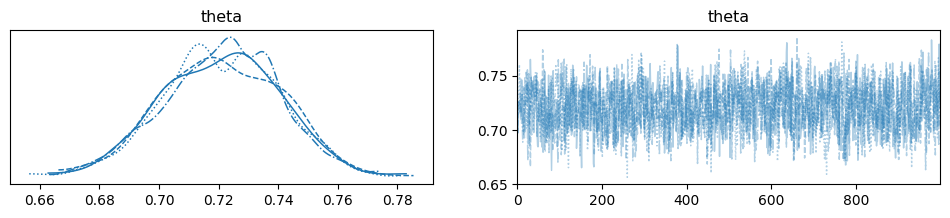

In [117]:
pm.traceplot(trace2)
plt.show()

Got error No model on context stack. trying to find log_likelihood in translation.


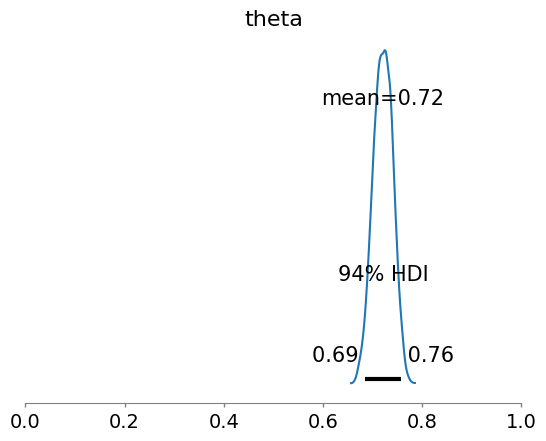

In [118]:
pm.plot_posterior(trace2)
plt.xlim(0, 1)
plt.show()

In [119]:
pm.summary(trace2)

Got error No model on context stack. trying to find log_likelihood in translation.


mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
theta  0.721  0.02   0.685    0.758        0.0      0.0    1654.0    2839.0   

       r_hat  
theta    1.0

## Inference Basic

### (1) Sampling

#### Bootstrap
- 모집단으로부터 얻은 복원추출 표본

In [120]:
loans_income = pd.read_csv("./Practical_Statictics/data/loans_income.csv").squeeze('columns')

In [121]:
from sklearn.utils import resample

In [122]:
results = []
for nrepeat in range(1000):
    sample = resample(loans_income)
    results.append(sample.median())
results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'original: {loans_income.median()}')
print(f'bias: {results.mean() - loans_income.median()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original: 62000.0
bias: -80.74850000000151
std. error: 224.31671356752653


#### Random sampling

In [123]:
fish_5 = np.array([2, 3, 4, 5, 6])
fish_5

array([2, 3, 4, 5, 6])

In [124]:
### Sampling
print(np.random.choice(fish_5, size=1, replace=False))
print(np.random.choice(fish_5, size=3, replace=False))

[4]
[2 3 6]


In [125]:
### Random.seed
# sample 고정
np.random.seed(1)
print(np.random.choice(fish_5, size=3, replace=False))
print(np.random.choice(fish_5, size=3, replace=False))

[4 3 6]
[2 4 6]


In [126]:
### Sample mean
np.mean(np.random.choice(fish_5, size=3, replace=False))

4.0

#### Stratified sampling
- 모집단을 중복되지 않는 층으로 나눈 다음 각 층에서 표본 추출

In [127]:
#create DataFrame
df = pd.DataFrame({'team': ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B'],
                   'position': ['G', 'G', 'F', 'G', 'F', 'F', 'C', 'C'],
                   'assists': [5, 7, 7, 8, 5, 7, 6, 9],
                   'rebounds': [11, 8, 10, 6, 6, 9, 6, 10]})

#view DataFrame
df.head()

team position  assists  rebounds
0    A        G        5        11
1    A        G        7         8
2    A        F        7        10
3    A        G        8         6
4    B        F        5         6

In [128]:
df.groupby('team', group_keys=False).apply(lambda x: x.sample(2))

team position  assists  rebounds
2    A        F        7        10
0    A        G        5        11
7    B        C        9        10
4    B        F        5         6

In [129]:
#define total sample size desired
N = 4

# perform stratified random sampling
df.groupby('team', group_keys=False).apply(lambda x: x.sample(int(np.rint(N*len(x)/len(df))))).sample(frac=1).reset_index(drop=True)

team position  assists  rebounds
0    A        G        7         8
1    B        F        7         9
2    B        C        9        10
3    A        G        8         6

#### Cluster sampling
- 집단을 일차적으로 표집한 다음, 선정된 각 집단에서 구성원을 표본으로 추출하는 다단계 표집방법

In [130]:
#create DataFrame
df = pd.DataFrame({'tour': np.repeat(np.arange(1,11), 20),
                   'experience': np.random.normal(loc=7, scale=1, size=200)})

#view first six rows of DataFrame
df.head()

tour  experience
0     1    8.462108
1     1    4.939859
2     1    6.677583
3     1    6.615946
4     1    8.133769

In [131]:
#randomly choose 4 tour groups out of the 10
clusters = np.random.choice(np.arange(1,11), size=4, replace=False)

#define sample as all members who belong to one of the 4 tour groups
cluster_sample = df[df['tour'].isin(clusters)]

#view first six rows of sample
cluster_sample.head()

tour  experience
20     2    6.308339
21     2    6.603246
22     2    6.312827
23     2    6.154794
24     2    6.328754

In [132]:
cluster_sample['tour'].value_counts()

tour
2     20
7     20
8     20
10    20
Name: count, dtype: int64

#### Systemetic sampling
- 첫 번째 요소는 무작위로 선정한 후 목록의 매번 k번째 요소를 표본으로 선정하는 표집방법
- 모집단의 크기를 원하는 표본의 크기로 나누어 표집간격 k 계산

In [133]:
import string

In [134]:
#create simple function to generate random last names
def random_names(size=6, chars=string.ascii_uppercase):
    return ''.join(random.choice(chars) for _ in range(size))

#create DataFrame
df = pd.DataFrame({'last_name': [random_names() for _ in range(500)],
                   'GPA': np.random.normal(loc=85, scale=3, size=500)})

#view first six rows of DataFrame
df.head()

last_name        GPA
0    YJFIDU  88.385569
1    HVKPQD  85.383065
2    FWKQQC  84.785720
3    QRJOQB  83.262146
4    JQDKLF  86.491009

In [135]:
#obtain systematic sample by selecting every 5th row
sys_sample_df = df.iloc[::5]

#view first six rows of DataFrame
sys_sample_df.head()

last_name        GPA
0     YJFIDU  88.385569
5     WSNYNS  88.410757
10    EULBOP  85.640342
15    NAJNRR  87.754813
20    NSMNHB  80.507397

In [136]:
#view dimensions of data frame
sys_sample_df.shape

(100, 2)

### (2) Sampling distribution

In [137]:
# 분포에서 샘플링
sampling_norm = stats.norm.rvs(loc=4, scale=0.8, size=10)
sampling_norm

array([3.62099337, 4.85174705, 3.8966078 , 2.80347492, 3.516034  ,
       2.99126696, 3.77920671, 5.34418476, 3.83267662, 3.56487145])

In [138]:
np.mean(sampling_norm)

3.8201063630128202

In [139]:
# 평균 4, 표준편차 0.8인 정규분포
population = stats.norm(loc=4, scale=0.8)

In [140]:
# 표본평균 여러 번 계산하기
sample_mean_array = np.zeros(10000)
np.random.seed(1)
for i in range(0, 10000):
    sample = population.rvs(size=10)
    sample_mean_array[i] = np.mean(sample)

sample_mean_array

array([3.92228729, 3.86432929, 4.06953003, ..., 4.13616562, 4.57489661,
       4.09896685])

In [141]:
# Sample의 평균과 표준편차
print(np.mean(sample_mean_array), np.std(sample_mean_array, ddof=1))

4.004202422791747 0.2513580850860402


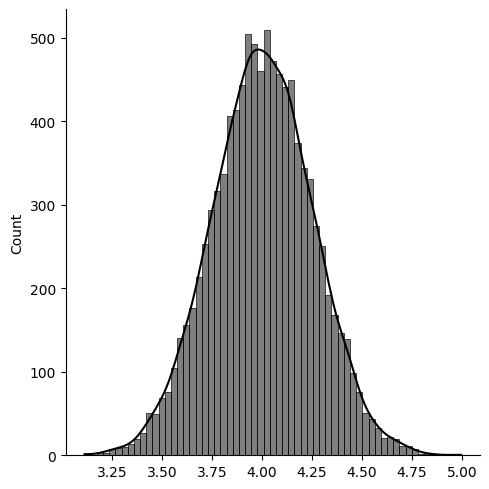

In [142]:
sns.displot(sample_mean_array, color='black', kde=True)
plt.show()

In [143]:
### Sample size에 따른 평균과 표준편차의 변화
size_array = np.arange(start=10, stop=100100, step=100)
sample_mean_array_size = np.zeros(len(size_array))

np.random.seed(1)
for i in range(0, len(size_array)):
    sample = population.rvs(size = size_array[i])
    sample_mean_array_size[i] = np.mean(sample)

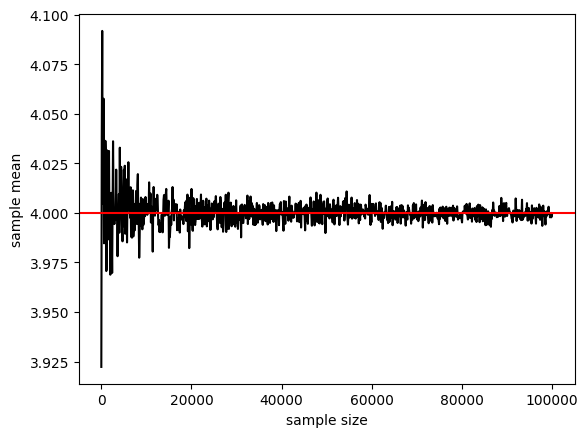

In [144]:
sns.lineplot(x=size_array, y=sample_mean_array_size, color='black')
plt.axhline(4, color='red')
plt.xlabel("sample size")
plt.ylabel("sample mean")
plt.show()

In [145]:
# 표본평균 계산 함수
def calc_sample_mean(size, n_trial):
    sample_mean_array = np.zeros(n_trial)
    for i in range(0, n_trial):
        sample = population.rvs(size=size)
        sample_mean_array[i] = np.mean(sample)
    return(sample_mean_array)

In [146]:
# 10000개 표본평균의 평균
np.random.seed(1)
np.mean(calc_sample_mean(size=10, n_trial=10000))

4.004202422791747

In [147]:
# Sample size와 표본평균
np.random.seed(1)

size_10 = calc_sample_mean(size=10, n_trial=10000)
size_10_df = pd.DataFrame({
    "sample_mean":size_10,
    "size"       :np.tile("size 10", 10000)
})

size_20 = calc_sample_mean(size=20, n_trial=10000)
size_20_df = pd.DataFrame({
    "sample_mean":size_20,
    "size"       :np.tile("size 20", 10000)
})

size_30 = calc_sample_mean(size=30, n_trial=10000)
size_30_df = pd.DataFrame({
    "sample_mean":size_30,
    "size"       :np.tile("size 30", 10000)
})


sim_result = pd.concat([size_10_df, size_20_df, size_30_df])

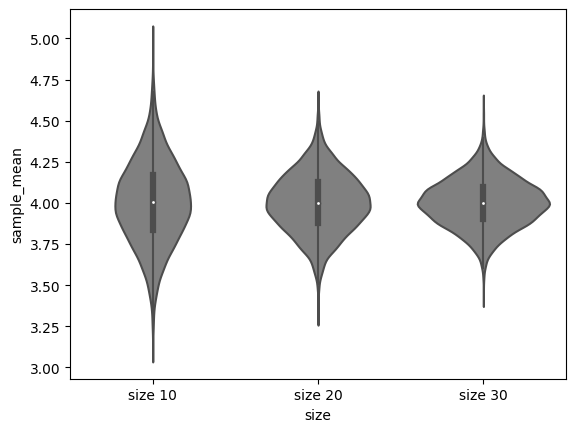

In [148]:
sns.violinplot(x="size", y="sample_mean", data=sim_result, color='gray')
plt.show()

In [149]:
# 표본평균의 표준편차
size_array = np.arange(start=2, stop=102, step=2)
sample_mean_std_array = np.zeros(len(size_array))

np.random.seed(1)
for i in range(0, len(size_array)):
    sample_mean = calc_sample_mean(size=size_array[i], n_trial=100)
    sample_mean_std_array[i] = np.std(sample_mean, ddof=1)

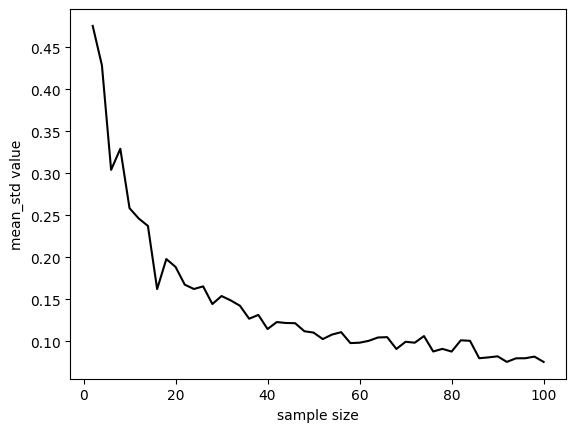

In [150]:
sns.lineplot(x=size_array, y=sample_mean_std_array, color='black')
plt.xlabel("sample size")
plt.ylabel("mean_std value")
plt.show()

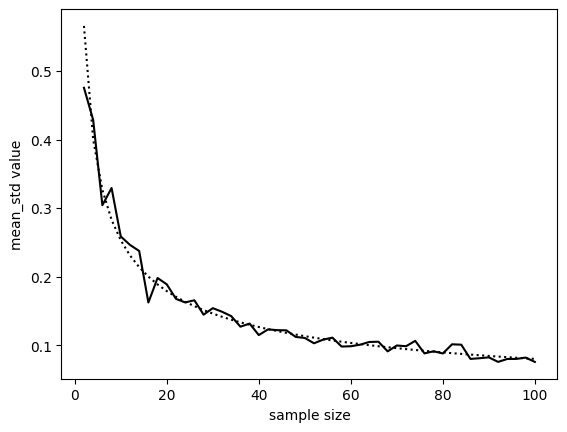

In [151]:
# Standard error
standard_error = 0.8 / np.sqrt(size_array)
sns.lineplot(x=size_array, y=sample_mean_std_array, color='black')
sns.lineplot(x=size_array, y=standard_error, color='black', linestyle='dotted')
plt.xlabel("sample size")
plt.ylabel("mean_std value")
plt.show()

In [152]:
# 표본분산의 평균 (Unbiased variance)
sample_var_array = np.zeros(10000)
np.random.seed(1)
for i in range(0, 10000):
    sample = population.rvs(size=10)
    sample_var_array[i] = np.var(sample, ddof=1)
    
np.mean(sample_var_array)

0.6385429863702334

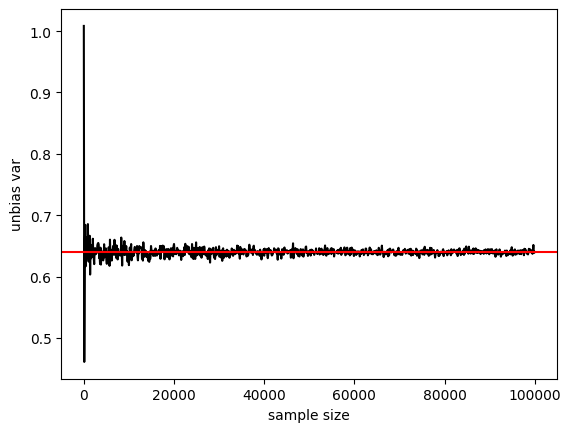

In [153]:
# 표본분산과 모분산의 관계
size_array =  np.arange(start=10, stop=100100, step=100)
unbias_var_array_size = np.zeros(len(size_array))
np.random.seed(1)
for i in range(0, len(size_array)):
    sample = population.rvs(size=size_array[i])
    unbias_var_array_size[i] = np.var(sample, ddof=1)
    
sns.lineplot(x=size_array, y=unbias_var_array_size, color='black')
plt.axhline(0.8**2, color='red')
plt.xlabel("sample size")
plt.ylabel("unbias var")
plt.show()

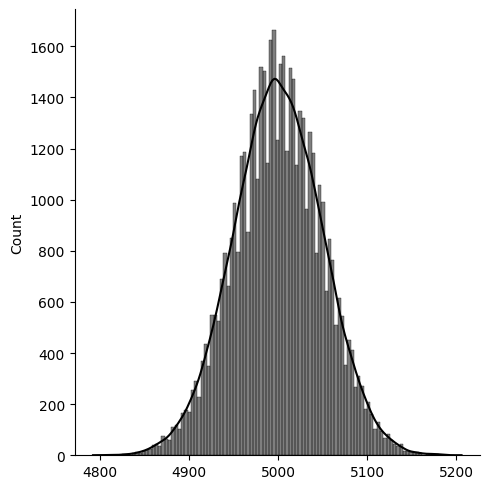

In [154]:
### Central Limit Theorem
n_size = 10000
n_trial = 50000

coin = np.array([0, 1])
count_coin = np.zeros(n_trial)
np.random.seed(1)
for i in range(0, n_trial):
    count_coin[i] = np.sum(np.random.choice(coin, size=n_size, replace=True))

sns.displot(count_coin, color='black', kde=True)
plt.show()

In [155]:
sample_data = pd.DataFrame({
    'income': loans_income.sample(1000),
    'type': 'Data',
})

sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})

sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
results.head()

income  type
43759  26000.0  Data
46518  63000.0  Data
4776   20800.0  Data
28700  70000.0  Data
16657  85000.0  Data

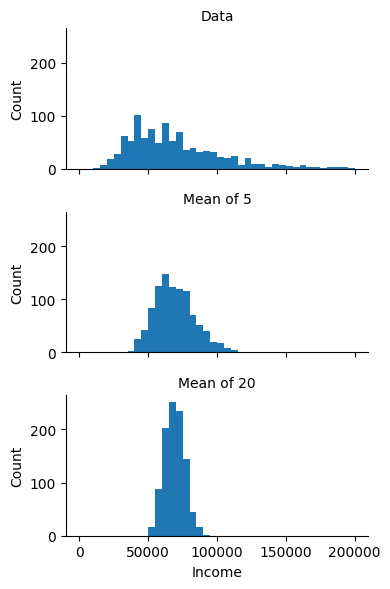

In [156]:
g = sns.FacetGrid(results, col='type', col_wrap=1, height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

### (3) Estimation
- Point estimation
- Interval estimation

In [157]:
fish = pd.read_csv("./stats_for_python/3-7-1-fish_length.csv")["length"]

#### Point estimation

In [158]:
# mean
mu = np.mean(fish)
mu

4.187039324504523

In [159]:
# variance
sigma_2 = np.var(fish, ddof=1)
sigma_2

0.6803017080832623

#### Interval estimation

In [160]:
### 표본평균에 대한 구간추정
# 정규분포로 구간추정: 모표준편차가 알려진 경우
data = np.random.randint(10, 30, 50)

# create 95% confidence interval for population mean
# sem: standard error of the mean
stats.norm.interval(alpha=0.95, loc=np.mean(data), scale=stats.sem(data))

(17.621531444065983, 20.338468555934018)

In [161]:
# T분포로 구간추정: 모표준편차를 모르는 경우
df = len(fish) - 1 # Degree of Freedom: n - 1
sigma = np.std(fish, ddof=1)
se = sigma / np.sqrt(len(fish))

# 신뢰계수(alpha), df, 표본평균, 표준오차
interval = stats.t.interval(alpha=0.95, df=df, loc=mu, scale=se)
interval

(3.597010056835825, 4.777068592173221)

In [162]:
from statsmodels.stats.proportion import proportion_confint

In [163]:
### Minimum Sample n
# 오차 d를 통한 sample size 계산
d = 0.1
estimated_n = (stats.norm.ppf(0.975)*(sigma/d))**2
estimated_n

261.33509972497285

In [164]:
### 표본표준편차, 신뢰도, 샘플 개수에 따른 구간의 길이
# 표본표준편차 * 10
se2 = (sigma*10) / np.sqrt(len(fish))
stats.t.interval(alpha=0.95, df=df, loc=mu, scale=se2)

(-1.7132533521824609, 10.087332001191507)

In [165]:
# 샘플 개수
df2 = (len(fish)*10) - 1
se3 = sigma / np.sqrt(len(fish)*10)
stats.t.interval(alpha=0.95, df=df2, loc=mu, scale=se3)

(4.0233803082774395, 4.350698340731607)

In [166]:
# 신뢰도
stats.t.interval(alpha=0.99, df=df, loc=mu, scale=se)

(3.3393979149413973, 5.034680734067649)

In [167]:
### Interval estimation 해석
# 여러 번 추정 수행 시, 신뢰구간이 모평균을 포함하는 비율
be_included_array = np.zeros(20000, dtype = "bool")

np.random.seed(1)
norm_dist = stats.norm(loc=4, scale=0.8)
for i in range(0, 20000):
    sample = norm_dist.rvs(size=10)
    df = len(sample) - 1
    mu = np.mean(sample)
    std = np.std(sample, ddof=1)
    se = std / np.sqrt(len(sample))
    interval = stats.t.interval(0.95, df, mu, se)
    if(interval[0] <= 4 and interval[1] >= 4):
        be_included_array[i] = True

In [168]:
sum(be_included_array) / len(be_included_array)

0.948

68760.51844


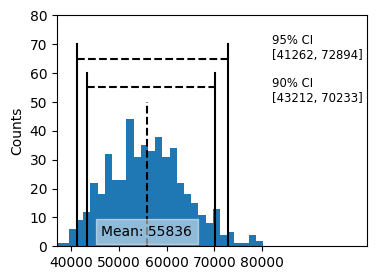

In [169]:
# CI 도식화
print(loans_income.mean())

np.random.seed(seed=3)
# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)

results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3), color='C1')
ax.plot(confidence_interval, [55, 55], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 60], color='black')
ax.text(82000, 50, 
        f'90% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')

confidence_interval = list(results.quantile([0.025, 0.975]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [65, 65], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 70], color='black')
ax.text(82000, 65, f'95% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 5, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_xlim(37000, 102000)
ax.set_xticks([40000, 50000, 60000, 70000, 80000])
ax.set_ylabel('Counts')
plt.show()

In [170]:
### 표본비율 구간추정
# p-hat = x-bar/n
# 표준오차: sqrt(p(1-p)/n) -> p를 p-hat으로 대체하여 사용
# X ~ B(n, p)이므로, Z = (X - np)/sqrt(np(1-p)) ~ N(0, 1)

p_hat = 41/500
se = np.sqrt((p_hat*(1 - p_hat))/500)
stats.norm.interval(alpha=0.95, loc=p_hat, scale=se)

(0.05795131379112069, 0.10604868620887932)

In [171]:
from statsmodels.stats.proportion import proportion_confint

In [172]:
proportion_confint(41, 500, alpha=0.05, method='normal') # 동일한 결과

(0.05795131379112069, 0.10604868620887932)

In [173]:
### Minimum Sample n
# 오차 d를 통한 sample size 계산
# p(1-p)는 최댓값 0.25로 치환
d = 0.1
estimated_n = ((stats.norm.ppf(0.975)/d)**2)/4
estimated_n

96.03647051735311

In [174]:
### 분산과 표준편차 구간추정
# 모집단의 정규분포 가정 필수
# (n-1)(s**2)/sigma**2 ~ chisq(n-1)
# (n-1)(s**2)/chisq(alpha/2)(n-1) < sigma**2 < (n-1)(s**2)/chisq(1-alpha/2)(n-1)
alpha=0.05
n = len(fish)
var = np.var(fish)
interval = ((n - 1) * var)/stats.chi2.ppf(1-(alpha/2), df=n-1), ((n - 1) * var)/stats.chi2.ppf(alpha/2, df=n-1)
interval

(0.28967623922045205, 2.040610747269794)

In [175]:
### 독립적인 두 개 집단의 차이 구간추정
# 표본이 큰 경우
data_1 = np.random.randint(10, 30, 50)
data_2 = np.random.randint(15, 30, 50)

stats.norm.interval(alpha=0.95, loc=np.mean(data_1 - data_2), scale=np.var(data_1)/len(data_1) + np.var(data_2)/len(data_2))

(-5.26512682976139, -1.65487317023861)

In [176]:
# 표본이 작은 경우
# 정규분포 가정이 필수. 정규분포 가정이 없으면 비모수적 방법 사용
# 비모수적 방법..?
data_1 = np.random.normal(10, 5, 15)
data_2 = np.random.normal(15, 5, 10)

n_1 = len(data_1)
n_2 = len(data_2)
s_pooled = ((n_1 - 1)*np.var(data_1) + (n_2 - 1)*np.var(data_2)) / (n_1 + n_2 - 1)

stats.t.interval(alpha=0.95, df=n_1 + n_2 - 2, loc=np.mean(data_1) - np.mean(data_2), scale=s_pooled) # 분산이 같은 경우

(-70.71997901781293, 58.964994764559094)

In [177]:
data_1 = np.random.normal(10, 5, 15)
data_2 = np.random.normal(15, 2, 10)

n_1 = len(data_1)
n_2 = len(data_2)

df = ((np.var(data_1)/n_1) + (np.var(data_2)/n_2))**2 / (((np.var(data_1)/n_1)**2/(n_1 - 1)) + ((np.var(data_2)/n_2)**2/(n_1 - 1))) # df = min([n_1, n_2]) 를 사용하기도 함
stats.t.interval(alpha=0.95, df=df, loc=np.mean(data_1) - np.mean(data_2), scale=(np.var(data_1)/n_1) + (np.var(data_2)/n_2)) # 분산이 다른 경우

(-9.847986390251464, -1.1664884250463112)

In [178]:
### 두 개 집단의 비율 차이 구간추정
# Z = (p-hat_1 - p-hat_2)/sqrt(((p_1*(1-p_1))/n_1) + ((p_2*(1-p_2))/n_2)) ~ N(0, 1)
p_1 = 0.6
p_2 = 0.5
n_1 = 10
n_2 = 12

se = np.sqrt(((p_1*(1 - p_1))/n_1) + ((p_2*(1 - p_2))/n_2))
stats.norm.interval(alpha=0.95, loc=np.mean(p_1 - p_2), scale=se)

(-0.3150004864990562, 0.5150004864990562)

### (4) Testing
- 귀무가설과 대립가설
- P-value
- 유의수준
- 단측검정/양측검정
    - alternative: less, greater(larger) / two-sided
- 제 1종 오류와 제 2종 오류: 1종 오류만 컨트롤 가능
- 신뢰구간과 양측검정
    - 신뢰구간 안에 검정할 모수가 들어가면 귀무가설 기각하지 않음
<br><br>
- A/B Test
    - 두 그룹 비교
    - 실험군과 대조군, 임의화 (처리 적용 대상 임의로 결정)
<br><br>
- Multi-armed bandit
    - 전통적인 A/B test가 어려운 경우
        - 표본의 크기가 충분하지 않은 경우
        - 실험이 끝나기 전에, 이미 얻은 결과들을 이용하는 경우
        - 추가적으로 들어오는 데이터를 바탕으로 다른 것 시도
    - Epsilon-greedy algorithm
        - 0~1 사이의 난수 생성
        - 난수가 0과 Epsilon 사이이면, 동전 뒤집기 (50/50) 시행
        - 앞면이면 제안 A, 뒷면이면 제안 B
        - 난수가 Epsilon보다 크면, 지금까지 가장 좋은 결과를 보인 제안 표시
    - Thompson's sampling
        - 표본을 추출하여, 최고의 손잡이를 선택할 확률 최대화
        - Beta distribution (Bayes 사전 분포) 사용

#### Resampling and Permutation test
- 두 개 이상의 표본을 결합하여 관측값을 무작위로(또는 전체를) 추출하는 과정
- 관측 데이터로부터 반복해서 표본추출

In [179]:
### T-test
session_times = pd.read_csv("./Practical_Statictics/data/web_page_data.csv")
session_times.Time = 100 * session_times.Time

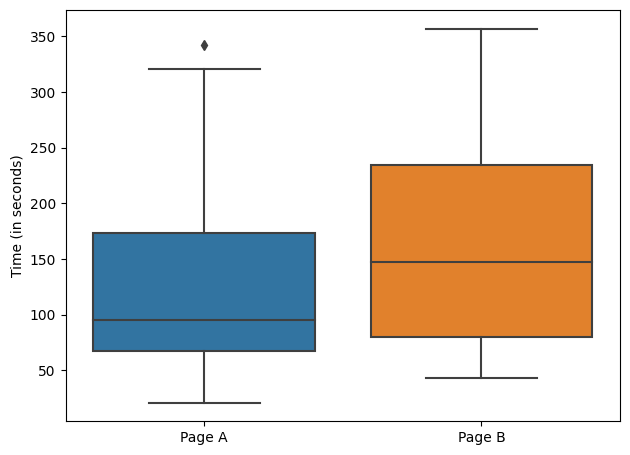

In [180]:
sns.boxplot(x='Page', y='Time', data=session_times)
plt.xlabel('')
plt.ylabel('Time (in seconds)')
plt.suptitle('')

plt.tight_layout()
plt.show()

In [181]:
# 관측된 차이
mean_a = session_times[session_times.Page == 'Page A'].Time.mean()
mean_b = session_times[session_times.Page == 'Page B'].Time.mean()
print(mean_b - mean_a)

35.66666666666667


In [182]:
import random

In [183]:
# Permutation test example with stickiness
def perm_fun(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B
    return x.loc[list(idx_B)].mean() - x.loc[list(idx_A)].mean()
    
nA = session_times[session_times.Page == 'Page A'].shape[0]
nB = session_times[session_times.Page == 'Page B'].shape[0]
print(perm_fun(session_times.Time, nA, nB))

-42.04761904761905


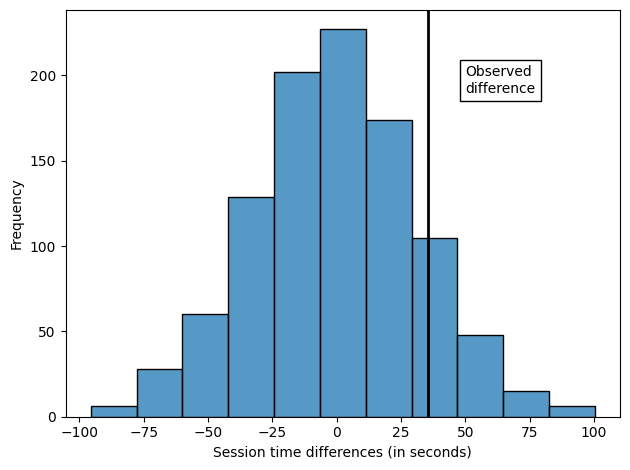

In [184]:
random.seed(1)
perm_diffs = [perm_fun(session_times.Time, nA, nB) for _ in range(1000)]

sns.histplot(x=perm_diffs, bins=11)
plt.axvline(x = mean_b - mean_a, color='black', lw=2)
plt.text(50, 190, 'Observed\ndifference', bbox={'facecolor':'white'})
plt.xlabel('Session time differences (in seconds)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [185]:
# convert perm_diffs to numpy array
perm_diffs = np.array(perm_diffs)
np.mean(perm_diffs > mean_b - mean_a)

0.121

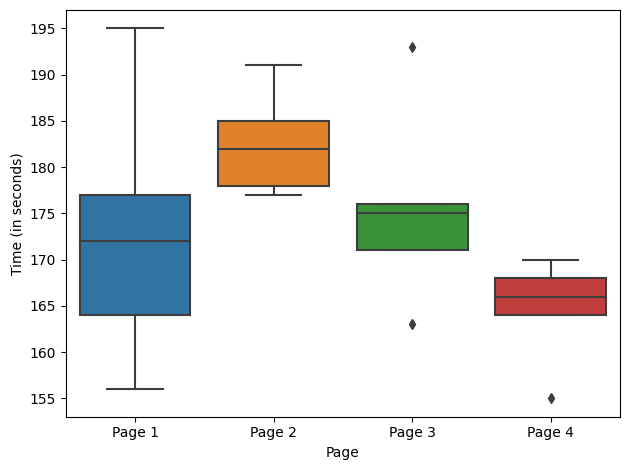

In [186]:
### ANOVA
four_sessions = pd.read_csv("./Practical_Statictics/data/four_sessions.csv")

sns.boxplot(x='Page', y='Time', data=four_sessions)
plt.xlabel('Page')
plt.ylabel('Time (in seconds)')
plt.title('')
plt.tight_layout()
plt.show()

In [187]:
observed_variance = four_sessions.groupby('Page').mean().var()[0]
print('Observed means:', four_sessions.groupby('Page').mean().values.ravel())
print('Variance:', observed_variance)
# Permutation test example with stickiness
def perm_test(df):
    df = df.copy()
    df['Time'] = np.random.permutation(df['Time'].values)
    
    return df.groupby('Page').mean().var()[0]
    
print(perm_test(four_sessions))

Observed means: [172.8 182.6 175.6 164.6]
Variance: 55.426666666666655
43.98666666666674


Pr(Prob) 0.087


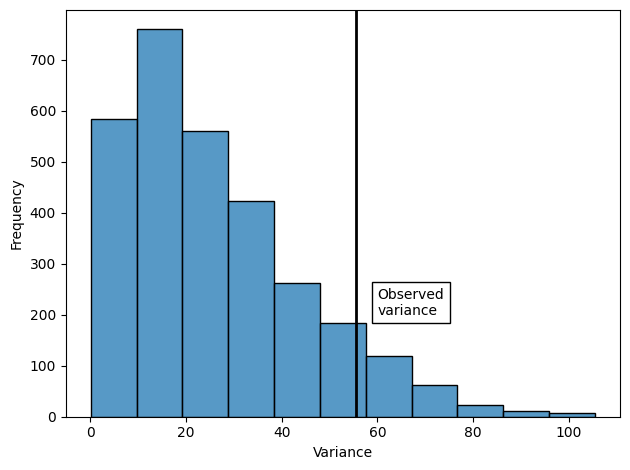

In [188]:
random.seed(1)
perm_variance = [perm_test(four_sessions) for _ in range(3000)]
print('Pr(Prob)', np.mean([var > observed_variance for var in perm_variance]))

sns.histplot(x=perm_variance, bins=11)
plt.axvline(x = observed_variance, color='black', lw=2)
plt.text(60, 200, 'Observed\nvariance', bbox={'facecolor':'white'})
plt.xlabel('Variance')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [189]:
### Chi-sq test
click_rate = pd.read_csv("./Practical_Statictics/data/click_rates.csv")
clicks = click_rate.pivot(index='Click', columns='Headline', values='Rate')
clicks

Headline  Headline A  Headline B  Headline C
Click                                       
Click             14           8          12
No-click         986         992         988

In [190]:
row_average = clicks.mean(axis=1)
pd.DataFrame({
    'Headline A': row_average,
    'Headline B': row_average,
    'Headline C': row_average,
})

Headline A  Headline B  Headline C
Click                                       
Click      11.333333   11.333333   11.333333
No-click  988.666667  988.666667  988.666667

In [191]:
box = [1] * 34
box.extend([0] * 2966)
random.shuffle(box)

def chi2(observed, expected):
    pearson_residuals = []
    for row, expect in zip(observed, expected):
        pearson_residuals.append([(observe - expect) ** 2 / expect
                                  for observe in row])
    # return sum of squares
    return np.sum(pearson_residuals)

expected_clicks = 34 / 3
expected_noclicks = 1000 - expected_clicks
expected = [expected_clicks, expected_noclicks]
chi2observed = chi2(clicks.values, expected)

def perm_fun(box):
    random.shuffle(box)
    sample_clicks = [sum(box[0:1000]),
                     sum(box[1000:2000]),
                     sum(box[2000:3000])]
    sample_noclicks = [1000 - n for n in sample_clicks]
    return chi2([sample_clicks, sample_noclicks], expected)

perm_chi2 = [perm_fun(box) for _ in range(2000)]

resampled_p_value = sum(perm_chi2 > chi2observed) / len(perm_chi2)
print(f'Observed chi2: {chi2observed:.4f}')
print(f'Resampled p-value: {resampled_p_value:.4f}')

Observed chi2: 1.6659
Resampled p-value: 0.4660


In [192]:
expected = [expected_clicks, expected_noclicks]
def sample_with_replacement(box):
    sample_clicks = [sum(random.sample(box, 1000)),
                     sum(random.sample(box, 1000)),
                     sum(random.sample(box, 1000))]
    sample_noclicks = [1000 - n for n in sample_clicks]
    return chi2([sample_clicks, sample_noclicks], expected)

perm_chi2 = [sample_with_replacement(box) for _ in range(2000)]

resampled_p_value = sum(perm_chi2 > chi2observed) / len(perm_chi2)
print(f'Observed chi2: {chi2observed:.4f}')
print(f'Resampled p-value: {resampled_p_value:.4f}')

Observed chi2: 1.6659
Resampled p-value: 0.4845


#### Statistical test
- 일부만 수록하고, 자세한 내용은 아래에서 확인

In [193]:
# One sample test
junk_food = pd.read_csv("./stats_for_python/3-8-1-junk-food-weight.csv")["weight"]
junk_food.head()

0    58.529820
1    52.353039
2    74.446169
3    52.983263
4    55.876879
Name: weight, dtype: float64

귀무가설: 봉지과자의 평균중량은 50g이다 <br>
대립가설: 봉지과자의 평균중량은 50g이 아니다

In [194]:
# T-test는 모집단의 정규분포 가정 필요
stats.ttest_1samp(junk_food, 50, alternative='two-sided')

Ttest_1sampResult(statistic=2.750339683171343, pvalue=0.012725590012524182)

In [195]:
# Paired test
paired_test_data = pd.read_csv("./stats_for_python/3-9-1-paired-t-test.csv")
print(paired_test_data)

  person medicine  body_temperature
0      A   before              36.2
1      B   before              36.2
2      C   before              35.3
3      D   before              36.1
4      E   before              36.1
5      A    after              36.8
6      B    after              36.1
7      C    after              36.8
8      D    after              37.1
9      E    after              36.9


In [196]:
# 데이터 정리
before = np.array(paired_test_data.query('medicine == "before"')["body_temperature"])
after = np.array(paired_test_data.query('medicine == "after"')["body_temperature"])

diff = after - before
diff

array([ 0.6, -0.1,  1.5,  1. ,  0.8])

귀무가설: 약을 먹기 전과 후의 체온에는 차이가 없다 (d=0) <br>
대립가설: 약이 먹기 전과 후의 체온에는 차이가 있다 (d!=0)

In [197]:
stats.ttest_1samp(diff, 0)

Ttest_1sampResult(statistic=2.901693483620596, pvalue=0.044043109730074276)

In [198]:
stats.ttest_rel(after, before)

Ttest_relResult(statistic=2.901693483620596, pvalue=0.044043109730074276)

In [199]:
### Chi-sq test
click_data = pd.read_csv("./stats_for_python/3-10-1-click_data.csv")
print(click_data)

  color  click  freq
0  blue  click    20
1  blue    not   230
2   red  click    10
3   red    not    40


In [200]:
# 분할표 생성
cross = pd.pivot_table(
    data=click_data,
    values="freq",
    aggfunc="sum",
    index="color",
    columns="click"
)
cross

click  click  not
color            
blue      20  230
red       10   40

In [201]:
# 동질성 검정
stats.chi2_contingency(cross, correction=False) # 통계량, p-value, df, expected table

(6.666666666666666,
 0.009823274507519247,
 1,
 array([[ 25., 225.],
        [  5.,  45.]]))

In [202]:
survivors = np.array([[200, 23739 - 200], [182, 22588 - 182]])
chi2, p_value, df, _ = stats.chi2_contingency(survivors)

print(f'p-value for single sided test: {p_value / 2:.4f}')

p-value for single sided test: 0.3498


In [203]:
from statsmodels.stats import power

In [204]:
### Test power
# 일정 수준 이상의 power를 얻기 위한 표본 수 계산
effect_size = sm.stats.proportion_effectsize(0.0121, 0.011) # p1, p2
analysis = sm.stats.TTestIndPower()
result = analysis.solve_power(effect_size=effect_size, alpha=0.05, power=0.8, alternative='larger') # 단측 검정
print('Sample Size: %.3f' % result)

Sample Size: 116602.393


In [205]:
effect_size = sm.stats.proportion_effectsize(0.0165, 0.011)
analysis = sm.stats.TTestIndPower()
result = analysis.solve_power(effect_size=effect_size, 
                              alpha=0.05, power=0.8, alternative='larger')
print('Sample Size: %.3f' % result)

Sample Size: 5488.408


## Pre-test Analysis
- 통계분석 전 사전 수행해야 하는 test
- 정규성 확인, 등분산성 확인 등

### (1) Normality

귀무가설(H0) <br>
데이터의 분포는 정규분포를 따른다.<br>
대립가설(H1)<br>
데이터의 분포는 정규분포를 따르지 않는다.<br>

In [206]:
cats = pd.read_csv('./ADP_book_ver01/data/cats.csv')

In [207]:
cats.head()

Sex  Bwt  Hwt
0   F  2.0  7.0
1   F  2.0  7.4
2   F  2.0  9.5
3   F  2.1  7.2
4   F  2.1  7.3

#### Shapiro-wilk test

In [208]:
stats.shapiro(cats['Bwt'])

ShapiroResult(statistic=0.9518789649009705, pvalue=6.730626046191901e-05)

#### Kolmogorov-smirnov (K-S) test
- 두 집단의 분포 비교. 데이터와 Normal distribution 제시

In [209]:
stats.kstest(cats['Bwt'], stats.norm.cdf)

KstestResult(statistic=0.9772498680518208, pvalue=5.089961007561737e-237)

#### Anderson-darling test
- 데이터 개수가 많은 경우 (5000개 이상?)

In [210]:
stats.anderson(cats['Bwt'], dist='norm')

AndersonResult(statistic=1.9228438994888393, critical_values=array([0.561, 0.639, 0.767, 0.894, 1.064]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

[결과해석] <br>
유의수준보다 작으므로 '데이터가 정규분포를 따른다'는 귀무가설을 기각한다. 즉, cats 데이이터의 Bwt 변수는 정규분포를 따르지 않는다.

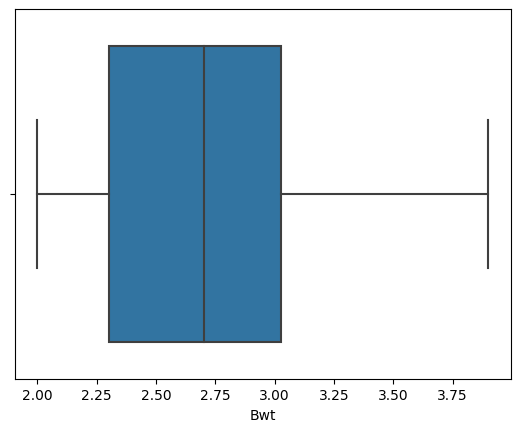

In [211]:
### Boxplot
sns.boxplot(x=cats.Bwt)
plt.show()

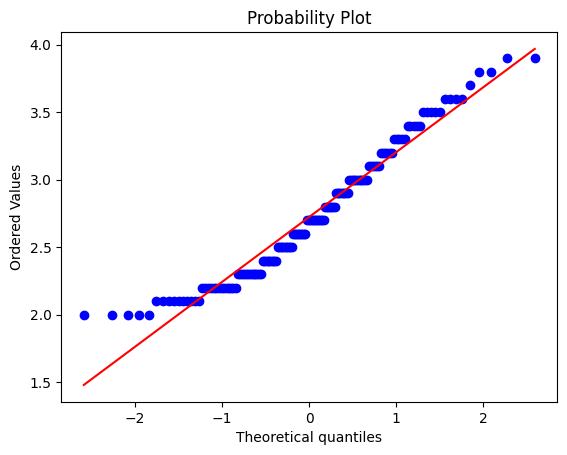

In [212]:
### Q-Q plot
stats.probplot(cats.Bwt, dist="norm", plot=plt)
plt.show()

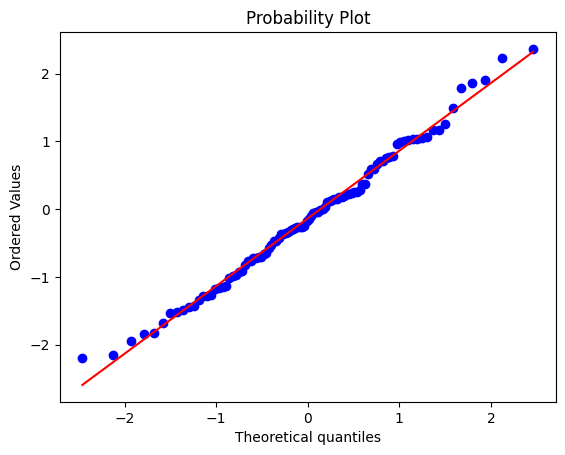

In [213]:
stats.probplot(stats.norm.rvs(size=100), plot=plt)
plt.show()

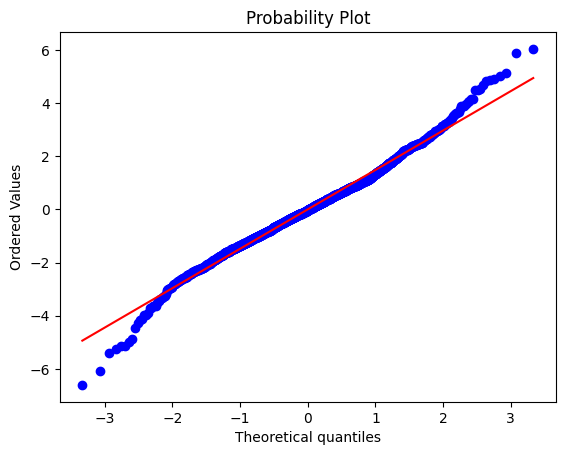

In [214]:
# not normal: 긴 꼬리 분포
nflx = sp500_px.NFLX
nflx = np.diff(np.log(nflx[nflx > 0]))

stats.probplot(nflx, plot=plt)
plt.show()

In [215]:
### Skewness, Kurtosis
# Normal의 왜도, 첨도는 0, 3
cats.Bwt.skew()

0.47862437175650524

In [216]:
cats.Bwt.kurtosis()

-0.6738392606733399

### (2) Equal variance

귀무가설(H0) <br>
집단 간 분산 차이가 없다.<br>
대립가설(H1)<br>
집단 간 분산 차이가 있다.<br>

In [217]:
female = cats.loc[cats.Sex=='F', 'Bwt']
male = cats.loc[cats.Sex=='M', 'Bwt']

#### Levene test
- 모집단이 정규분포가 아닌 경우에도 사용할 수 있음
- median 척도가 default -> Brown-Forsythe test

In [218]:
stats.levene(female, male, center='mean')

LeveneResult(statistic=17.201368589463517, pvalue=5.759437452845422e-05)

In [219]:
stats.levene(female, male)

LeveneResult(statistic=19.43101190877999, pvalue=2.0435285255189404e-05)

#### Fligner test
- 모집단이 정규분포가 아닌 경우에도 사용할 수 있음. (Levene 보다 더 Robust test)

In [220]:
stats.fligner(female, male, center='mean')

FlignerResult(statistic=16.302435204533868, pvalue=5.399451767224612e-05)

In [221]:
stats.fligner(female, male)

FlignerResult(statistic=16.909233669160688, pvalue=3.921038124917857e-05)

#### Bartlett test
- 정규성 필요. 모집단이 정규분포인 경우 정확도가 높음
- 집단 내 데이터 수가 달라도 가능

In [222]:
stats.bartlett(female, male)

BartlettResult(statistic=15.074702450407873, pvalue=0.00010333894088535893)

#### F-test
- 두 집단 분산의 비율 검정
- 정규성 필요
- Two sample test 파트 참조

## Sample tests
- 한 개, 또는 두 개 집단 비교

### (1) One sample test
- 연속형인 한 개 집단 검정
- T-test는 모집단의 정규분포 가정이 필요하며, 정규성이 깨지면 비모수적 방법 시행

#### Binomial probability test

In [223]:
stats.binomtest(k=1, n=10, p=0.5, alternative='two-sided') # 성공횟수, 시행횟수, 성공확률

BinomTestResult(k=1, n=10, alternative='two-sided', proportion_estimate=0.1, pvalue=0.021484375)

#### Mean test
- Z-test: 데이터가 충분히 크거나 모분산을 알고 있는 경우
- T-test, Wilcoxon signed rank test (Sign test)

In [224]:
statsmodels.stats.weightstats.ztest(cats['Bwt'], x2=None, value=0, alternative='two-sided')

(67.34573724070906, 0.0)

In [225]:
cats.head()

Sex  Bwt  Hwt
0   F  2.0  7.0
1   F  2.0  7.4
2   F  2.0  9.5
3   F  2.1  7.2
4   F  2.1  7.3

Bwt 컬럼은 고양이의 몸무게를 의미하고, Hwt는 고양이의 길이를 의미한다. 
cats의 데이터의 정보를 info로 확인해준다. 

In [226]:
cats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     144 non-null    object 
 1   Bwt     144 non-null    float64
 2   Hwt     144 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.5+ KB


shapiro test를 통해 데이터의 정규성을 검정한다. 고양이의 몸무게를 검정하므로 고양이의 몸무게만 추출하여 shapiro test를 진행해야 한다.

In [227]:
mu = 2.6
stats.shapiro(cats['Bwt'])

ShapiroResult(statistic=0.9518789649009705, pvalue=6.730626046191901e-05)

데이터가 정규분포를 따르지 않으므로 wilcox test를 진행한다. 

귀무가설(H0) <br>
고양이의 평균 몸무게는 2.6kg이다. -> 고양이의 몸무게 - 2.6kg의 평균은 0이다.<br><br>
대립가설(H1)<br>
고양이의 평균 몸무게는 2.6kg이 아니다 <br>

In [228]:
### Wilcoxon signed rank test
# 평균을 빼주는 이유는, signed rank test가 원래 paired sample용임.
# sign test도 사용 가능
stats.wilcoxon(cats.Bwt - mu, alternative='two-sided')

WilcoxonResult(statistic=3573.0, pvalue=0.02524520294814093)

H0 기각. 유의수준 0.05 하에서 고양이의 평균 몸무게는 2.6kg이라고 할 수 없다.

In [229]:
#### (참고) T-test
# stats.ttest_1samp(cats.Bwt, popmean=mu)

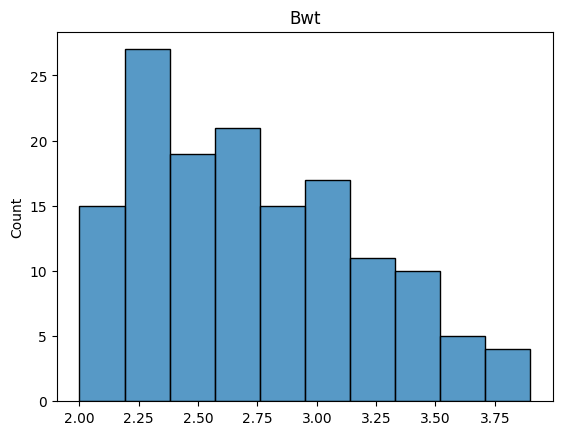

In [230]:
sns.histplot(cats.Bwt.values, bins=10)
plt.title('Bwt')
plt.ylabel('Count')
plt.show()

#### Proportion test
- 정규분포를 이용한 집단의 비율 검정

H0: p = p0 (population proportion is equal to hypothesized proportion p0)

H1 (two-tailed): p ≠ p0 (two-tailed population proportion is not equal to some hypothesized value p0) <br>
H1 (left-tailed): p < p0 (left-tailed population proportion is less than some hypothesized value p0) <br>
H1 (right-tailed): p > p0 (right-tailed population proportion is greater than some hypothesized value p0)

In [231]:
# count: 성공 횟수, nobs: 전체 시행 횟수 -> 표본비율 = count/nobs
# value: 검정할 모비율
# returns z-stat, p-value
statsmodels.stats.proportion.proportions_ztest(count=70, nobs=100, value=0.86, alternative='smaller') # smaller, larger, two-side

(-3.4914862437758782, 0.0002401705999909348)

#### Variance test
- 정규성 가정이 필수 

In [232]:
def chi_var_test(x, va0, direction="two-tailed"):
    n = len(x)
    chi_stat = (n - 1) * np.var(x) / va0 
    tmp_p = stats.chi2.cdf(chi_stat, df=n-1)
    
    if direction == "lower":
        p = tmp_p
    elif direction == "upper":
        p = 1 - tmp_p 
    else:
        p = 2*(1-tmp_p) if tmp_p > 0.5 else 2*tmp_p
    
    return chi_stat, p

x = np.random.normal(0, 2, 25)
chi_var_test(x, va0=9)

(11.03481336663814, 0.022477166555364775)

In [233]:
### if not normal
# Squared Ranks test for Variances

### (2) Paired sample test
- 단일 모집단의 어떠한 처리 전후에 따른 평균 차이 비교
- Paired T-test, Wilcoxon signed rank test

In [234]:
# 데이터 불러오기 및 확인
data = {'before':[7, 3, 4, 5, 2, 1, 6, 6, 5, 4],
       'after':[8, 4, 5, 6, 2, 3, 6, 8, 6, 5]}
data = pd.DataFrame(data)
data

before  after
0       7      8
1       3      4
2       4      5
3       5      6
4       2      2
5       1      3
6       6      6
7       6      8
8       5      6
9       4      5

귀무가설(H0) <br>
수면제 복용 전과 후의 수면시간 차이는 없다. (D=0)<br>
대립가설(H1)<br>
수면제 복용 전과 후의 수면시간 차이는 있다. <br>


In [235]:
### Normality test
stats.shapiro(data.before)

ShapiroResult(statistic=0.9644595384597778, pvalue=0.8352707624435425)

In [236]:
stats.shapiro(data.after)

ShapiroResult(statistic=0.9456835985183716, pvalue=0.6177982091903687)

두 집단 다 정규성을 만족하므로, Paired T-test를 진행한다.

In [237]:
stats.ttest_rel(data['after'], data['before'], alternative='greater') # H1: D > 0

Ttest_relResult(statistic=4.743416490252569, pvalue=0.0005269356285082764)

In [238]:
data.mean()

before    4.3
after     5.3
dtype: float64

[결과해석]
p-value가 유의수준보다 작으므로 '수면영양제를 복용하기 전과 후의 평균 수면시간의 차이는 통계적으로 유의하며, 영양제를 복용한 후 수면시간이 늘었다'는 결론을 낼 수 있다. 

In [239]:
### (참고) Wilcoxon signed rank test
# 두 데이터의 차이 배열을 input으로 함
# 비모수 검정의 p-value가 높음 -> 검정력이 떨어짐
stats.wilcoxon(data['after']-data['before'], alternative='greater')

WilcoxonResult(statistic=36.0, pvalue=0.00414960799764038)

In [240]:
### (참고) Sign test
# Ordinal data
# 두 집단의 대소 비교하여, 이항검정 또는 정규근사 활용
# H0: p = 0.5
# n = 동률이 아닌 데이터 수
# z = x - np/sqrt(np(1-p)) ~ N(0, 1)

In [241]:
from statsmodels.stats import descriptivestats

In [242]:
stat, p = descriptivestats.sign_test(data['after']-data['before'], mu0=0)
print("single sample sign test p-value", p) # 양측 검정만 가능. H1: p != 0.5

single sample sign test p-value 0.0078125


In [243]:
plus = (data['after'] - data['before'] > 0).sum()
minus = (data['after'] - data['before'] < 0).sum()

stats.binomtest(k=plus, n=plus + minus, p=0.5, alternative='two-sided') # 위 결과와 동일

BinomTestResult(k=8, n=8, alternative='two-sided', proportion_estimate=1.0, pvalue=0.0078125)

In [244]:
stats.binomtest(k=plus, n=plus + minus, p=0.5, alternative='greater') # H1: p > 0.5. + 확률이 0.5보다 큰가? after의 수면시간이 더 길어지는지 검정

BinomTestResult(k=8, n=8, alternative='greater', proportion_estimate=1.0, pvalue=0.00390625)

### (3) Independent Two-sample test
- 두 개의 독립된 모집단 비교
- 표본 크기가 충분한 경우, 정규분포를 이용한 test 가능
    - X_bar - Y_bar ~ N(mu_1 - mu_2, ((sigma_1)**2/n_1 + (sigma_2)**2/n_2))
- T-test, Wilcoxon Rank sum test / Mann-Whitney U test
- T-test의 경우 집단 간 등분산 검정 먼저 수행 -> equal_var 파라미터 입력

In [245]:
# 참고: Two sample z-test
#enter IQ levels for 20 individuals from each city
cityA = [82, 84, 85, 89, 91, 91, 92, 94, 99, 99,
         105, 109, 109, 109, 110, 112, 112, 113, 114, 114]

cityB = [90, 91, 91, 91, 95, 95, 99, 99, 108, 109,
         109, 114, 115, 116, 117, 117, 128, 129, 130, 133]

statsmodels.stats.weightstats.ztest(cityA, cityB, value=0, alternative='two-sided')

(-1.9953236073282115, 0.046007596761332065)

In [246]:
female = cats.loc[cats.Sex=='F', 'Bwt']
male = cats.loc[cats.Sex=='M', 'Bwt']

귀무가설(H0) <br>
암컷 고양이와 수컷 고양이의 몸무게는 차이가 없다.<br>
대립가설(H1)<br>
암컷 고양이와 수컷 고양이의 몸무게는 차이가 있다. <br>

In [247]:
### Normality test
stats.shapiro(female) # not normal

ShapiroResult(statistic=0.8909613490104675, pvalue=0.0003754299250431359)

In [248]:
stats.shapiro(male)

ShapiroResult(statistic=0.9788323640823364, pvalue=0.11896143108606339)

정규성을 만족시키지 못하는 집단이 있으므로, Wilcoxon Rank sum test를 진행한다.

In [249]:
stats.ranksums(female, male, alternative='two-sided')

RanksumsResult(statistic=-6.484649068728496, pvalue=8.893855174450822e-11)

In [250]:
stats.mannwhitneyu(female, male, alternative='two-sided')

MannwhitneyuResult(statistic=757.5, pvalue=8.200502234321752e-11)

In [251]:
### (참고) Independent T-test
stats.ttest_ind(female, male, equal_var=False) # 등분산성 만족이 안 되는 경우

Ttest_indResult(statistic=-8.70948849909559, pvalue=8.831034455859356e-15)

[결과해석]
p-value가 유의수준보다 작으므로 '암컷 고양이와 수컷 고양이의 몸무게는 차이가 있다'는 결론을 낼 수 있다.

In [252]:
print(female.mean())
print(male.mean())

2.359574468085107
2.8999999999999995


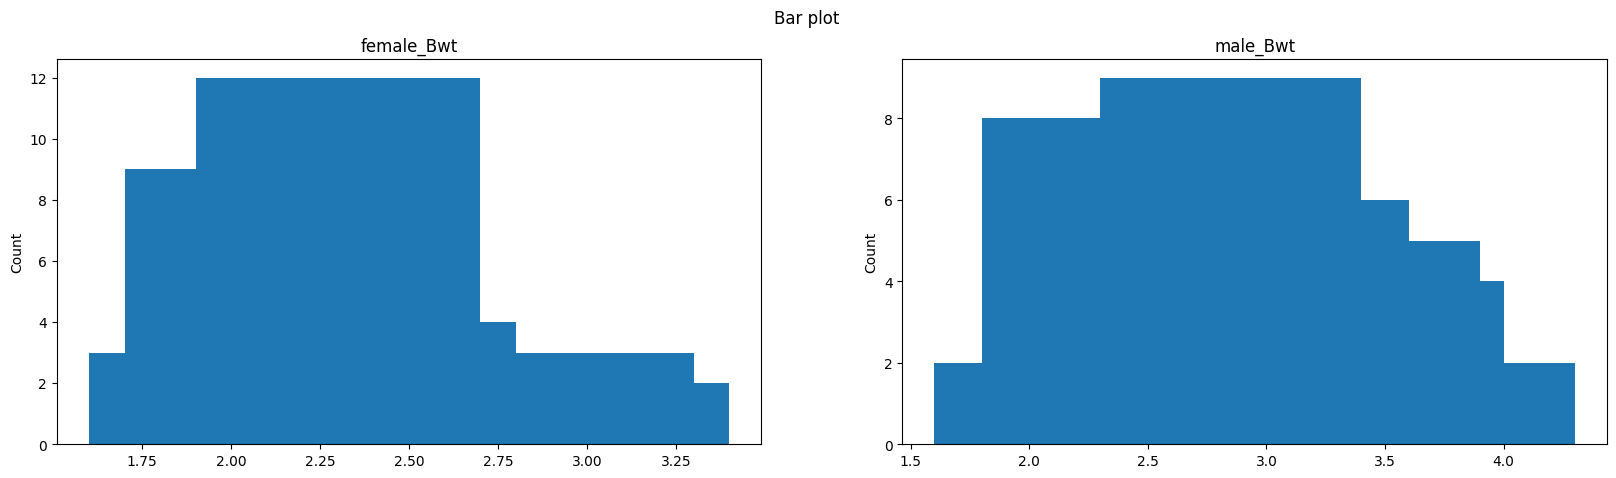

In [253]:
female_Bwt_cnt = pd.value_counts(female.values, sort=False)
male_Bwt_cnt = pd.value_counts(male.values, sort=False)

fig, axs = plt.subplots(1, 2,figsize=(20,5))
fig.suptitle('Bar plot')
width =0.4
axs[0].bar(female_Bwt_cnt.index, female_Bwt_cnt.values)
axs[0].set_title('female_Bwt')
axs[0].set_ylabel('Count')
axs[1].bar(male_Bwt_cnt.index, male_Bwt_cnt.values)
axs[1].set_title('male_Bwt')
axs[1].set_ylabel('Count')
plt.show()

In [254]:
### Proportion difference test (Z-statistic)
success_cnts = np.array([70, 80])
total_cnts = np.array([100, 120])

test_stat, pval = statsmodels.stats.proportion.proportions_ztest(count=success_cnts, nobs=total_cnts, alternative='two-sided')
print('Two sided z-test: z = {:.4f}, p value = {:.4f}'.format(test_stat, pval))

Two sided z-test: z = 0.5285, p value = 0.5971


In [255]:
### Variance difference test (F-test)
# 두 집단의 분산 차이 검정. 정규성에 민감
# 위에서 언급된 Equal Variance 검정 방법을 사용하는 것이 더 좋음
def f_var_test(x, y, direction="two-tailed"):
    df_1 = len(x)
    df_2 = len(y)
    f_stat = np.var(x, ddof=1) / np.var(y, ddof=1)
    
    tmp_p = stats.f.cdf(f_stat, df_1, df_2)
    if direction == "lower":
        p = tmp_p
    elif direction == "upper":
        p = 1 - tmp_p 
    else:
        p = 2*(1-tmp_p) if tmp_p > 0.5 else 2*tmp_p
    return f_stat, p

f_var_test(male, female)

(2.9111958307660704, 9.872708416591713e-05)

## ANOVA
- 두 개 이상의 다수 집단 간 평균 비교
- 종속변수는 연속형, 독립변수는 범주형
- 각 집단의 정규분포 가정과 집단 내 등분산 가정이 필요하며, 이 가정이 깨지면 Welch의 방법 또는 비모수적 방법 시행
- 사후 검정: 적어도 한 집단에서 평균 차이가 있음이 증명되었을 때, 어떤 집단에서 차이가 존재하는지를 알아보는 방법

### (1) One-way
- 종속변수에 대한 하나의 범주형 변수의 영향 파악
- 각 집단 간 표본의 수는 동일하지 않아도 됨
- ANOVA (F-test), Kruskal-Wallis test

In [256]:
### Simple data
weather = ["cloudy", "cloudy", "rainy", "rainy", "sunny", "sunny"]
beer = [6, 8, 2, 4, 10, 12]

weather_beer = pd.DataFrame({
    "beer"   : beer,
    "weather": weather
})

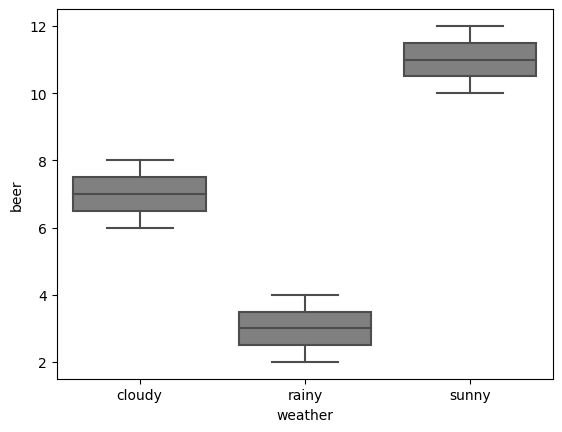

In [257]:
sns.boxplot(x="weather", y="beer", data=weather_beer, color='gray')
plt.show()

In [258]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [259]:
anova_model = ols("beer ~ weather", data=weather_beer).fit()
anova_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     16.00
Date:                Sun, 13 Aug 2023   Prob (F-statistic):             0.0251
Time:                        20:14:03   Log-Likelihood:                -8.5136
No. Observations:                   6   AIC:                             23.03
Df Residuals:                       3   BIC:                             22.40
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            7.0000      1.000      7.000      0.006       3.818      10.182
weather[T.rainy]    -4.0000      1.414     -2.828      0.066      -8.501       0.501
weather[T.sunny]     4.0000      1.414      2.828      0.066      -0.501       8.501
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.333
Prob(Omnibus):                    nan   Jarque-Bera (JB):                1.000
Skew:                          -0.000   Prob(JB):                        0.607
Kurtosis:                       1.000   Cond. No.                         3.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [260]:
sm.stats.anova_lm(anova_model, typ=2)

sum_sq   df     F    PR(>F)
weather     64.0  2.0  16.0  0.025095
Residual     6.0  3.0   NaN       NaN

In [261]:
# Predicted
anova_model.fittedvalues

0     7.0
1     7.0
2     3.0
3     3.0
4    11.0
5    11.0
dtype: float64

In [262]:
# Residuals
anova_model.resid

0   -1.0
1    1.0
2   -1.0
3    1.0
4   -1.0
5    1.0
dtype: float64

In [263]:
anova_model.params

Intercept           7.0
weather[T.rainy]   -4.0
weather[T.sunny]    4.0
dtype: float64

In [264]:
iris = pd.read_csv("./ADP_book_ver01/data/iris.csv")
iris.head(100)

sepal length  sepal width  petal length  petal width           target
0            5.1          3.5           1.4          0.2      Iris-setosa
1            4.9          3.0           1.4          0.2      Iris-setosa
2            4.7          3.2           1.3          0.2      Iris-setosa
3            4.6          3.1           1.5          0.2      Iris-setosa
4            5.0          3.6           1.4          0.2      Iris-setosa
..           ...          ...           ...          ...              ...
95           5.7          3.0           4.2          1.2  Iris-versicolor
96           5.7          2.9           4.2          1.3  Iris-versicolor
97           6.2          2.9           4.3          1.3  Iris-versicolor
98           5.1          2.5           3.0          1.1  Iris-versicolor
99           5.7          2.8           4.1          1.3  Iris-versicolor

[100 rows x 5 columns]

In [265]:
iris["target"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [266]:
iris.target.value_counts()

target
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [267]:
target_list = iris["target"].unique()
setosa = iris[iris["target"]==target_list[0]]["sepal width"]
versicolor = iris[iris["target"]==target_list[1]]["sepal width"]
virginica = iris[iris["target"]==target_list[2]]["sepal width"]
print(target_list)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


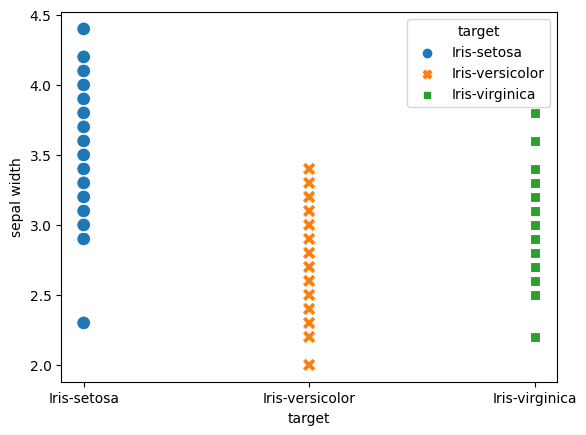

In [268]:
# Scatter plot by Groups
sns.scatterplot(x='target', 
                y='sepal width', 
                hue='target', # different colors by group
                style='target', # different shapes by group
                s=100, # marker size
                data=iris)
plt.show()

귀무가설(H0) <br>
세가지 종에 대해 sepal width의 평균 차이가 없다.<br>
대립가설(H1)<br>
적어도 하나의 종에 대한 sepal width의 평균 차이가 있다. <br>

In [269]:
### Normality test
print(stats.shapiro(setosa))
print(stats.shapiro(versicolor))
print(stats.shapiro(virginica))

ShapiroResult(statistic=0.968691885471344, pvalue=0.20465604960918427)
ShapiroResult(statistic=0.9741333723068237, pvalue=0.3379979133605957)
ShapiroResult(statistic=0.9673908352851868, pvalue=0.1809013932943344)


두 집단 다 정규성을 만족하므로, ANOVA를 진행한다.

In [270]:
### Equal variance test
# Levene test
stats.levene(setosa, versicolor, virginica)

LeveneResult(statistic=0.6475222363405327, pvalue=0.5248269975064537)

In [271]:
stats.f_oneway(setosa, versicolor, virginica)

F_onewayResult(statistic=47.36446140299382, pvalue=1.3279165184572242e-16)

[결과해석]
p-value가 유의수준보다 작으므로 '세가지 종의 꽃받침 폭의 평균은 차이가 있다'는 결론을 낼 수 있다.

In [272]:
### (참고) Kruskal-Wallis test
# 서열 척도 이상의 데이터에 사용
stats.kruskal(setosa, versicolor, virginica)

KruskalResult(statistic=62.49463010053111, pvalue=2.6882119006774528e-14)

In [273]:
### (참고) Mood's Median Test
# 세 개 이상의 독립 표본을 대상으로 이들이 추출된 모집단의 median 비교 test
stats.median_test(setosa, versicolor, virginica)

(50.22477971587844,
 1.2411596758086846e-11,
 3.0,
 array([[42,  8, 17],
        [ 8, 42, 33]]))

In [274]:
### if not equal variance
# Transformation / Scaling
# Welch's ANOVA

In [275]:
### (참고) Welch's ANOVA
pg.welch_anova(data=iris, dv='sepal width', between='target')

Source  ddof1      ddof2          F         p-unc       np2
0  target      2  97.369597  43.303381  3.519723e-14  0.391881

### (2) Two-way
- 하나의 종속변수 (연속형) 에 대한 두 개의 독립변수(범주형)의 영향을 알아보는 방법
- 교호작용 검증 필요. 교호작용이 있는 경우 주효과 검정은 의미가 없다
- ANOVA (F-test), Friedman test

In [276]:
mtcars = pd.read_csv('./ADP_book_ver01/data/mtcars.csv', index_col='Unnamed: 0')
mtcars.head()

mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
Mazda RX4          21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
Mazda RX4 Wag      21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
Datsun 710         22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
Hornet 4 Drive     21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

                   carb  
Mazda RX4             4  
Mazda RX4 Wag         4  
Datsun 710            1  
Hornet 4 Drive        1  
Hornet Sportabout     2

In [277]:
mtcars.describe()

mpg        cyl        disp          hp       drat         wt  \
count  32.000000  32.000000   32.000000   32.000000  32.000000  32.000000   
mean   20.090625   6.187500  230.721875  146.687500   3.596563   3.217250   
std     6.026948   1.785922  123.938694   68.562868   0.534679   0.978457   
min    10.400000   4.000000   71.100000   52.000000   2.760000   1.513000   
25%    15.425000   4.000000  120.825000   96.500000   3.080000   2.581250   
50%    19.200000   6.000000  196.300000  123.000000   3.695000   3.325000   
75%    22.800000   8.000000  326.000000  180.000000   3.920000   3.610000   
max    33.900000   8.000000  472.000000  335.000000   4.930000   5.424000   

            qsec         vs         am       gear     carb  
count  32.000000  32.000000  32.000000  32.000000  32.0000  
mean   17.848750   0.437500   0.406250   3.687500   2.8125  
std     1.786943   0.504016   0.498991   0.737804   1.6152  
min    14.500000   0.000000   0.000000   3.000000   1.0000  
25%    16.892500   0.000000   0.000000   3.000000   2.0000  
50%    17.710000   0.000000   0.000000   4.000000   2.0000  
75%    18.900000   1.000000   1.000000   4.000000   4.0000  
max    22.900000   1.000000   1.000000   5.000000   8.0000

In [278]:
am0 = mtcars[mtcars.am==0]
am1 = mtcars[mtcars.am==1]

cyl4 = mtcars[mtcars.cyl==4]
cyl6 = mtcars[mtcars.cyl==6]
cyl8 = mtcars[mtcars.cyl==8]

In [279]:
### Normality test
# mpg data is normal
print(stats.shapiro(am0['mpg']))
print(stats.shapiro(am1['mpg']))

print(stats.shapiro(cyl4['mpg']))
print(stats.shapiro(cyl6['mpg']))
print(stats.shapiro(cyl8['mpg']))

ShapiroResult(statistic=0.9767745137214661, pvalue=0.8987393379211426)
ShapiroResult(statistic=0.9458037614822388, pvalue=0.5362744927406311)
ShapiroResult(statistic=0.9124392867088318, pvalue=0.2605934739112854)
ShapiroResult(statistic=0.8990352153778076, pvalue=0.32517871260643005)
ShapiroResult(statistic=0.9317531585693359, pvalue=0.3228558897972107)


In [280]:
### Equal variance test
# not equal variance
stats.levene(am0['mpg'], am1['mpg'])

LeveneResult(statistic=4.1876255537753995, pvalue=0.04957067404156203)

In [281]:
stats.levene(cyl4['mpg'], cyl6['mpg'], cyl8['mpg'])

LeveneResult(statistic=5.507064861977649, pvalue=0.009390247105110484)

In [282]:
mtcars['mpg_sqrt'] = np.sqrt(mtcars.mpg)

In [283]:
am0 = mtcars[mtcars.am==0]
am1 = mtcars[mtcars.am==1]

cyl4 = mtcars[mtcars.cyl==4]
cyl6 = mtcars[mtcars.cyl==6]
cyl8 = mtcars[mtcars.cyl==8]

In [284]:
stats.levene(am0['mpg_sqrt'], am1['mpg_sqrt'])

LeveneResult(statistic=1.8507055090956186, pvalue=0.1838361585926835)

In [285]:
stats.levene(cyl4['mpg_sqrt'], cyl6['mpg_sqrt'], cyl8['mpg_sqrt'])

LeveneResult(statistic=2.8688891317752816, pvalue=0.07296950644913348)

가설은 총 3가지로 정의할 수 있고, 상호작용 효과를 가장 먼저 검증한다.<br> <br>
귀무가설(H0) <br>
변속기 종류와 실린더 개수 간에는 상호작용 효과가 없다.<br>
대립가설(H1)<br>
변속기 종류와 실린더 개수 간에는 상호작용 효과가 있다.<br><br>
귀무가설(H0) <br>
실린더 개수에 따른 주행거리의 차이는 없다.<br>
대립가설(H1)<br>
실린더 개수에 따른 주행거리의 차이가 있다.<br><br>
귀무가설(H0) <br>
변속기 종류에 따른 주행거리의 차이는 없다.<br>
대립가설(H1)<br>
변속기 종류에 따른 주행거리의 차이는 있다. <br>


In [286]:
### Two-way ANOVA
formula = 'mpg_sqrt ~ C(cyl) + C(am) + C(cyl):C(am)'
model = ols(formula, mtcars).fit()

aov_table = anova_lm(model, typ=2)
aov_table

sum_sq    df          F        PR(>F)
C(cyl)        5.634040   2.0  24.915357  9.050376e-07
C(am)         0.387832   1.0   3.430212  7.540130e-02
C(cyl):C(am)  0.209114   2.0   0.924763  4.092816e-01
Residual      2.939654  26.0        NaN           NaN

[결과해석]
교호작용의 p-value가 유의수준보다 크므로, 실린더 개수와 변속기 종류 간에는 교호작용이 존재하지 않는다. <br>
실린더 개수 변수에 대한 p-value는 유의수준보다 작으므로, 주효과 검정에서 귀무가설을 기각한다. 따라서 실린더 개수에 따른 주행거리 평균의 차이가 난다. <br>
변속기 종류 변수에 대한 p-value는 유의수준보다 크므로, 주효과 검정에서 귀무가설을 기각하지 않는다. 따라서 변속기 종류에 따른 주행거리 평균은 차이가 없다고 볼 수 있다.

In [287]:
from statsmodels.graphics.factorplots import interaction_plot

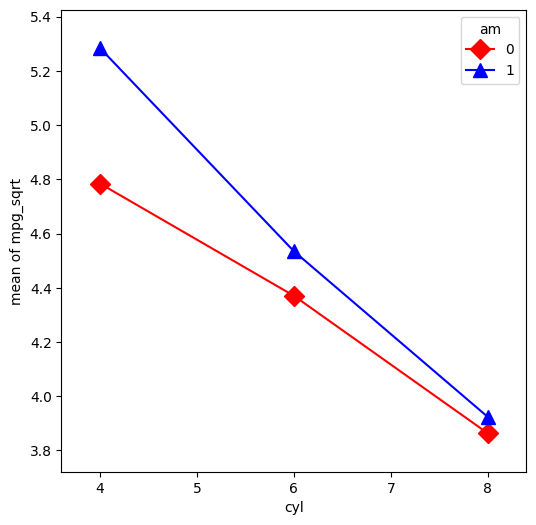

In [288]:
### interaction plot
# 교호작용 확인
# 독립변수 cyl,am와 종속변수 mpg을 Series로 변경 
cyl = mtcars["cyl"]
am = mtcars["am"]
mpg = mtcars["mpg_sqrt"]

fig, ax = plt.subplots(figsize=(6, 6))
fig = interaction_plot(cyl, am, mpg, colors=['red', 'blue'], markers=['D', '^'], ms=10, ax=ax) # 변수는 x1, x2 y 순

In [289]:
### (참고) Friedman test
# non-parametric ANOVA with blocked design
# 교호작용에 대한 검정은 Rank 특성 상 어려움
pg.friedman(data=mtcars, dv="mpg", within="am", subject="cyl")

Source    W  ddof1    Q     p-unc
Friedman     am  1.0      1  3.0  0.083265

In [290]:
pg.friedman(data=mtcars, dv="mpg", within="cyl", subject="am")

Source    W  ddof1    Q     p-unc
Friedman    cyl  1.0      2  4.0  0.135335

[결과해석]
실린더 개수 변수에 대한 p-value는 유의수준보다 작으므로 귀무가설을 기각한다. 따라서 실린더 개수에 따른 주행거리 차이는 없다고 볼 수 있다. <br>
변속기 종류 변수에 대한 p-value는 유의수준보다 크므로 귀무가설을 기각하지 않는다. 따라서 변속기 종류에 따른 주행거리는 차이가 난다.

### (3) ANCOVA
- 공변량의 영향을 고려한 분산분석
- 공변량은 연속형 변수
- ANOVA의 가정을 만족시켜야 함

In [291]:
### wt 변수를 공변량으로 설정하고, 실린더 개수 변수의 영향 측정
pg.ancova(data=mtcars, dv='mpg', covar='wt', between='cyl')

Source          SS  DF          F     p-unc       np2
0       cyl   95.263290   2   7.285567  0.002835  0.342277
1        wt  118.203950   1  18.080056  0.000213  0.392362
2  Residual  183.058648  28        NaN       NaN       NaN

### (4) MANOVA
- 다변량 분산분석
- 종속변수 여러 개를 한 번에 검정
- 가정: 종속변수들의 정규성, Equal covariance

In [292]:
from statsmodels.multivariate.manova import MANOVA

In [293]:
maov = MANOVA.from_formula('cyl + am ~ mpg + wt', data=mtcars)
print(maov.mv_test())

                 Multivariate linear model
                                                            
------------------------------------------------------------
       Intercept        Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.5871 2.0000 28.0000  9.8475 0.0006
         Pillai's trace 0.4129 2.0000 28.0000  9.8475 0.0006
 Hotelling-Lawley trace 0.7034 2.0000 28.0000  9.8475 0.0006
    Roy's greatest root 0.7034 2.0000 28.0000  9.8475 0.0006
------------------------------------------------------------
                                                            
------------------------------------------------------------
          mpg           Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.6864 2.0000 28.0000  6.3955 0.0052
         Pillai's trace 0.3136 2.0000 28.0000  6.3955 0.0052
 Hotelling-Lawley trace 0.4568 2.0000 28.0

### (5) Post-hoc test

In [294]:
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd

from statsmodels.sandbox.stats.multicomp import multipletests

In [295]:
### Fisher's LSD & Bonferroni adjustment
# T-test를 여러 번 수행하는 것
# 비교 대상이 많을수록 검정력이 떨어짐
# Tukey 보다 엄격함
mc = MultiComparison(data=iris["sepal width"], groups=iris["target"])

ret = mc.allpairtest(stats.ttest_ind, method='bonf', alpha=0.05)
ret[0] # 모든 집단의 평균이 다르다.

<class 'statsmodels.iolib.table.SimpleTable'>

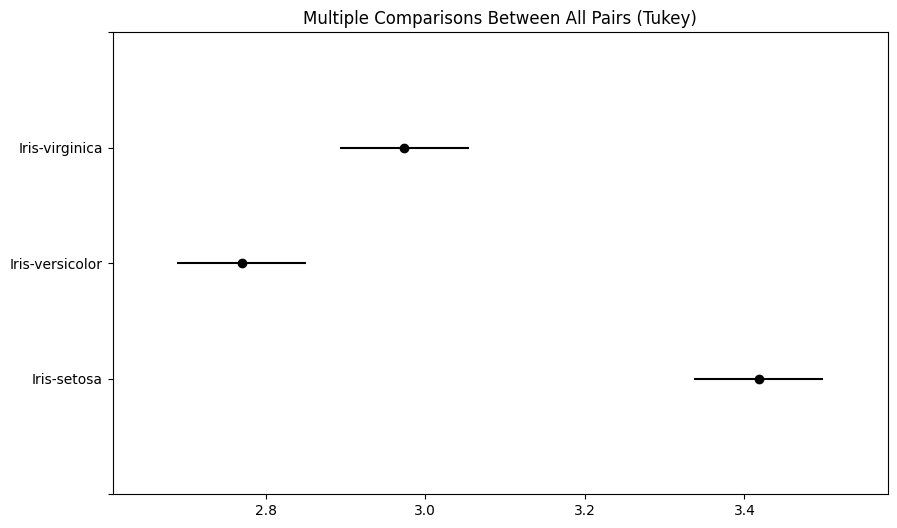

In [296]:
### Tukey's HSD
# Most powerful
# ANOVA 수행하지 않고도 결과를 볼 수 있음
# 집단별 sample 수가 동일해야 함
tukeyhsd = mc.tukeyhsd(alpha=0.05)
fig = tukeyhsd.plot_simultaneous()

In [297]:
tukeyhsd.summary() # 모든 집단의 평균이 다르다.

<class 'statsmodels.iolib.table.SimpleTable'>

In [298]:
### (참고) pingouin 패키지 사용
pg.pairwise_tukey(data=iris, dv='sepal width', between='target')

A                B  mean(A)  mean(B)   diff        se  \
0      Iris-setosa  Iris-versicolor    3.418    2.770  0.648  0.068084   
1      Iris-setosa   Iris-virginica    3.418    2.974  0.444  0.068084   
2  Iris-versicolor   Iris-virginica    2.770    2.974 -0.204  0.068084   

          T       p-tukey    hedges  
0  9.517713  2.153833e-14  1.842310  
1  6.521396  3.147409e-09  1.248226  
2 -2.996317  8.952134e-03 -0.636233

In [299]:
# ! pip install scikit-posthocs
import scikit_posthocs as sp

In [300]:
### Scheffe
# 가장 엄격한 Test
sp.posthoc_scheffe(iris, group_col='target', val_col='sepal width')

Iris-setosa  Iris-versicolor  Iris-virginica
Iris-setosa      1.000000e+00     4.730163e-16    7.739781e-09
Iris-versicolor  4.730163e-16     1.000000e+00    1.281402e-02
Iris-virginica   7.739781e-09     1.281402e-02    1.000000e+00

In [301]:
### Games Howell
# Equal variance가 아닌 경우 사용
# Welch's ANOVA의 사후검정 방법
pg.pairwise_gameshowell(data =iris, dv='sepal width', between='target')

A                B  mean(A)  mean(B)   diff        se  \
0      Iris-setosa  Iris-versicolor    3.418    2.770  0.648  0.069807   
1      Iris-setosa   Iris-virginica    3.418    2.974  0.444  0.070595   
2  Iris-versicolor   Iris-virginica    2.770    2.974 -0.204  0.063635   

          T         df          pval    hedges  
0  9.282773  94.525878  0.000000e+00  1.842310  
1  6.289385  95.395253  2.869266e-08  1.248226  
2 -3.205761  97.926827  5.129567e-03 -0.636233

In [302]:
### Duncan
# 일반적으로는 추천되지 않음
# 집단 개수가 같을 때 사용
# 비모수 검정에 사용 가능
sp.posthoc_dunn(iris, group_col='target', val_col='sepal width', p_adjust='holm')

Iris-setosa  Iris-versicolor  Iris-virginica
Iris-setosa      1.000000e+00     3.247311e-14    2.292201e-07
Iris-versicolor  3.247311e-14     1.000000e+00    1.521219e-02
Iris-virginica   2.292201e-07     1.521219e-02    1.000000e+00

In [303]:
### Mann-whitney
# Mann-whitney를 여러 번 수행하는 것
# 비모수적 검정
sp.posthoc_mannwhitney(iris, group_col='target', val_col='sepal width', alternative='two-sided') # 모든 집단의 평균이 다르다.

Iris-setosa  Iris-versicolor  Iris-virginica
Iris-setosa      1.000000e+00     2.983442e-13    1.180877e-08
Iris-versicolor  2.983442e-13     1.000000e+00    4.572142e-03
Iris-virginica   1.180877e-08     4.572142e-03    1.000000e+00

In [304]:
### Nemenyi test
# Tukey's HSD for non-parametric
sp.posthoc_conover(np.array([setosa, versicolor, virginica])) # 모든 집단의 평균이 다르다.

1             2             3
1  1.000000e+00  1.765695e-18  1.356705e-10
2  1.765695e-18  1.000000e+00  1.890443e-03
3  1.356705e-10  1.890443e-03  1.000000e+00

In [305]:
### Conover test
# 비모수적 검정
sp.posthoc_conover(np.array([setosa, versicolor, virginica])) # 모든 집단의 평균이 다르다.

1             2             3
1  1.000000e+00  1.765695e-18  1.356705e-10
2  1.765695e-18  1.000000e+00  1.890443e-03
3  1.356705e-10  1.890443e-03  1.000000e+00

In [306]:
### Two-way 사후 검정
# 1개 요인만 유의하므로, One-way와 동일한 사후 검정 가능
mc = MultiComparison(data=mtcars["mpg_sqrt"], groups=mtcars["cyl"])

ret = mc.allpairtest(stats.ttest_ind, method='bonf', alpha=0.05)
ret[0] # 모든 집단의 평균이 다르다.

<class 'statsmodels.iolib.table.SimpleTable'>

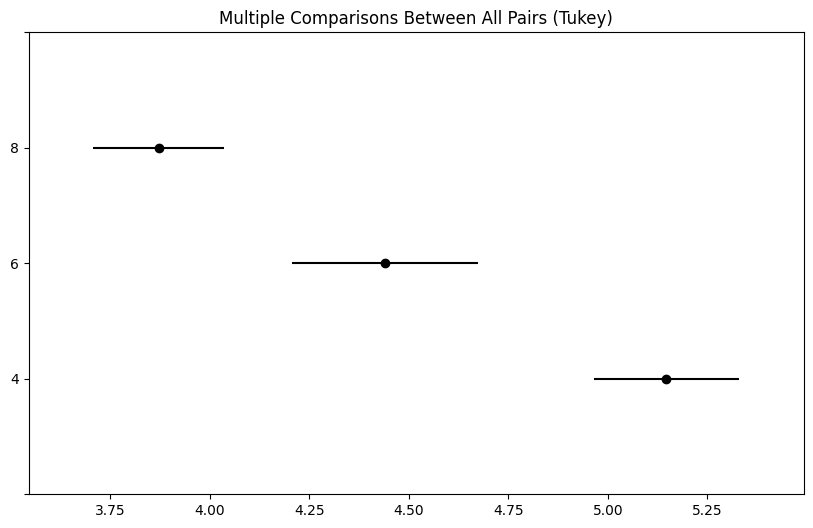

In [307]:
tukeyhsd = mc.tukeyhsd(alpha=0.05)
fig = tukeyhsd.plot_simultaneous()

In [308]:
tukeyhsd.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [309]:
# !pip install bioinfokit
from bioinfokit.analys import stat

In [310]:
### Tukey for two-way anova
result = stat()

result.tukey_hsd(df=mtcars, res_var='mpg_sqrt', xfac_var=['cyl', 'am'], anova_model=formula)
result.tukey_summary

group1  group2      Diff     Lower     Upper    q-value   p-value
0   (6, 1)  (6, 0)  0.164238 -0.624832  0.953308   0.904417  0.900000
1   (6, 1)  (4, 1)  0.748787  0.049352  1.448223   4.651803  0.030753
2   (6, 1)  (4, 0)  0.249253 -0.594298  1.092804   1.283926  0.900000
3   (6, 1)  (8, 1)  0.610588 -0.332531  1.553706   2.813145  0.376069
4   (6, 1)  (8, 0)  0.671048  0.004162  1.337934   4.372329  0.047942
5   (6, 0)  (4, 1)  0.913025  0.280362  1.545688   6.270767  0.001872
6   (6, 0)  (4, 0)  0.413491 -0.375579  1.202561   2.276991  0.587789
7   (6, 0)  (8, 1)  0.446350 -0.448371  1.341071   2.167695  0.629995
8   (6, 0)  (8, 0)  0.506810 -0.089671  1.103291   3.691981  0.130121
9   (4, 1)  (4, 0)  0.499534 -0.199902  1.198970   3.103330  0.274180
10  (4, 1)  (8, 1)  1.359375  0.542610  2.176140   7.231906  0.001000
11  (4, 1)  (8, 0)  1.419835  0.948276  1.891395  13.083145  0.001000
12  (4, 0)  (8, 1)  0.859841 -0.083278  1.802960   3.961524  0.088948
13  (4, 0)  (8, 0)  0.920301  0.253416  1.587187   5.996381  0.003063
14  (8, 1)  (8, 0)  0.060460 -0.728609  0.849530   0.332941  0.900000

In [311]:
### Two-way, Non-parametric 사후 검정
# Nemenyi
sp.posthoc_nemenyi_friedman(a=mtcars, y_col='mpg_sqrt', block_col='am', group_col='cyl', melted=True)

6         4        8
6  1.000000  0.036902  0.00331
4  0.036902  1.000000  0.00100
8  0.003310  0.001000  1.00000

In [312]:
# Conover
sp.posthoc_conover_friedman(a=mtcars, y_col='mpg_sqrt', block_col='am', group_col='cyl', melted=True)

6         4         8
6  1.000000  0.500349  0.823937
4  0.500349  1.000000  0.630247
8  0.823937  0.630247  1.000000

In [313]:
# Mann-Whitney
# block 지정 불가
sp.posthoc_mannwhitney(a=mtcars, val_col='mpg', group_col='cyl', alternative='two-sided')

4         6         8
4  1.000000  0.000666  0.000028
6  0.000666  1.000000  0.001013
8  0.000028  0.001013  1.000000

In [314]:
# Duncan
# block 지정 불가
sp.posthoc_dunn(a=mtcars, val_col='mpg_sqrt', group_col='cyl', p_adjust='holm')

4         6         8
4  1.000000  0.053687  0.000001
6  0.053687  1.000000  0.053687
8  0.000001  0.053687  1.000000

## Contingency table
- 범주형 변수들 간의 관계를 설명하기 위한 방법

### (1) Chi-Square tests
- 각 범주의 기대빈도는 5 이상이어야 함
- Goodness of fit: 각 범주에 따른 데이터의 빈도분포가 이론적으로 기대하는 분포는 따르는지 검정
- Independence: 두 개의 변수 A, B의 관계가 독립인지 검정
- Homogeneity: 모집단이 임의의 변수에 따라 R개로 범주화되었을 때, R 개의 부분 모집단에서 추출한 표본이 C개의 범주화된 집단의 분포가 동일한지 검정

#### Goodness of fit test

In [315]:
# 데이터 불러오기
df = pd.read_csv("./ADP_book_ver01/data/titanic.csv")
# titinic 데이터의 구조 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   adult_male   891 non-null    bool   
 10  embark_town  889 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 70.6+ KB


In [316]:
df_t = df[df['survived']==1]

table = df_t[['sex']].value_counts()
table

sex   
female    233
male      109
Name: count, dtype: int64

귀무가설(H0) <br>
타이타닉호 생존자 중 남자와 여자의 비율은 동일하다. (각 50%)<br>
대립가설(H1)<br>
타이타닉호 생존자 중 남자와 여자의 비율은 동일하지 않다. (각 50%)<br>

In [317]:
from scipy.stats import chisquare

In [318]:
expected = int(table.sum() / 2) # 50%
chi = chisquare(table, f_exp=[expected, expected]) # f_exp에 기대 빈도 입력
print('<적합도 검정>\n', chi)

<적합도 검정>
 Power_divergenceResult(statistic=44.95906432748538, pvalue=2.0119672574477235e-11)


In [319]:
clicks.values

array([[ 14,   8,  12],
       [986, 992, 988]])

[결과해석]
P-value가 유의수준 (0.05)보다 작으므로 귀무가설을 기각한다. 타이타닉호 생존자의 성별 비율은 동일하다고 볼 수 없다.

#### independence test / homogeneity test

In [320]:
table = pd.crosstab(df['class'], df['survived'])
table

survived    0    1
class             
First      80  136
Second     97   87
Third     372  119

- 독립성 검정 <br>
귀무가설(H0) <br>
class (좌석등급) 변수와 생존 여부는 독립이다.<br>
대립가설(H1)<br>
class (좌석등급) 변수와 생존 여부는 독립이 아니다.<br>

- 동질성 검정 <br>
귀무가설(H0) <br>
class 변수의 분포는 생존 여부와 관계없이 동일하다.<br>
대립가설(H1)<br>
class 변수의 분포는 생존 여부와 관계가 있다.<br>

In [321]:
from scipy.stats import chi2_contingency

In [322]:
chi, p, df, expect = chi2_contingency(table) 
print('Statistic:', chi)
print('p-value:', p)
print('df:', df)
print('expect: \n', expect)

Statistic: 102.88898875696056
p-value: 4.549251711298793e-23
df: 2
expect: 
 [[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]


[결과해석]
P-value가 유의수준 (0.05)보다 작으므로 귀무가설을 기각한다. class 변수와 생존여부 변수는 독립이 아니다. / class 변수의 분포는 생존 여부와 관계가 있다.

### (2) Fisher's exect test
- 사건 발생 가능성이 낮을 경우의 Chi-sq test
- 샘플이 적은 경우에 주로 사용
- Resampling 방법 사용하거나, 초기하분포를 이용한 계산

In [323]:
### scipy의 exact test는 2*2만 지원
stats.fisher_exact(clicks.iloc[:2, :2].values)

(1.7606490872210954, 0.2835969483984848)

In [324]:
### unconditional exact test 
stats.barnard_exact(clicks.iloc[:2, :2].values)

BarnardExactResult(statistic=1.286298502909844, pvalue=0.20245372969560074)

In [325]:
# !pip install fisher-test-python
from fisher import fisher_test

In [326]:
fisher_test(clicks.values)

0.48241413094304153

### (3) McNemar test
- paired 범주형 변수의 Chi-sq test

|| after:present| after:absent|
|---|---|---|
| before:present | a | b |
| before:abcent  | c | d |

- Marginal Probability가 같은지 검정 (b=c)
- Statictic: (b-c)**2/b + c ~ Chi-sq(1)
- H0: 전체에서 Before:present의 비율과, After:present의 비율이 같은가?" 또한 "Before:absent와 After:present의 비율이 같은가?"
- => 약 처방 후 환자의 상태는 변하지 않았다

In [327]:
from statsmodels.stats.contingency_tables import mcnemar

In [328]:
x = [[59, 6], [16, 80]]
x

[[59, 6], [16, 80]]

In [329]:
print(mcnemar(x, exact=True, correction=True))

pvalue      0.052478790283203125
statistic   6.0


### (4) Cochran's Q test
- 세 집단 이상 대응표본 변수의 차이 검정
- Two-way randomized block designs
- Response variable (y) can take only two possible outcomes (coded as 0 and 1)
- Test if k treatments have identical effects (identical binomial proportions) <br>
H0: the treatments are equally effective <br>
H1: there is a difference in effectiveness between treat

In [330]:
from statsmodels.stats.contingency_tables import cochrans_q

In [331]:
y_true = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 0, 0, 0])

y_model_1 = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0])

y_model_2 = np.array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0])

y_model_3 = np.array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      1, 1])

In [332]:
cochran_table = pd.DataFrame([y_true, y_model_1, y_model_2, y_model_3]).T
cochran_table.columns = ['y_true', 'y_model_1', 'y_model_2', 'y_model_3']
cochran_table

y_true  y_model_1  y_model_2  y_model_3
0        0          1          1          1
1        0          1          1          1
2        0          1          1          1
3        0          1          1          0
4        0          1          1          0
..     ...        ...        ...        ...
95       0          0          0          0
96       0          0          0          0
97       0          0          0          0
98       0          0          0          1
99       0          0          0          1

[100 rows x 4 columns]

In [333]:
print(cochrans_q(cochran_table))

df          3
pvalue      3.542742882493579e-05
statistic   23.272727272727273


### (5) Kendall's W test
- Tests for Kendall's W

In [334]:
import kendall_w.kendall_w as kw

In [335]:
annotations = [[1, 1, 1, 2], [2, 2, 2, 3], [3, 3, 3, 1]]
m = len(annotations)
n = len(annotations[0])
W = kw.compute_w(annotations)

statistic = m*(n-1)*W
stats.chi2.ppf(statistic, df=n-1)

nan

In [336]:
df_1 = n-1-(2/m)

# Fetching p-value from F-test
p = stats.f.cdf((W*(m-1))/(1-W), dfn=df_1, dfd=df_1*(m-1))

2*p if p<=0.5 else 2*(1-p) # two-sided

0.6179561091215751

## Linear Regression
- Regression: 하나 혹은 그 이상의 변수들이 또 다른 변수에 미치는 영향 추론
- 모형의 적합성 확인
    - 모형이 통계적으로 유의미한가?
    - 회귀계수들이 유의미한가?
    - 모형의 설명력은 어떤가?
    - 모형이 데이터를 잘 적합하고 있는가? (잔차 확인)
    - 모형의 가정 만족
        - 독립/종속변수 간 선형성, 잔차와 독립변수의 독립성, 오차 등분산성, 관측치와 잔차의 비상관성, 잔차의 정규성

### (1) Simple Regression
- 독립변수의 개수가 하나인 경우

In [337]:
house = pd.read_csv('./ADP_book_ver01/data/kc_house_data.csv')
house = house[["price", "sqft_living"]]

## 독립변수와 종속변수의 선형 가정 
house.corr()

price  sqft_living
price        1.000000     0.702035
sqft_living  0.702035     1.000000

<Axes: xlabel='sqft_living', ylabel='price'>

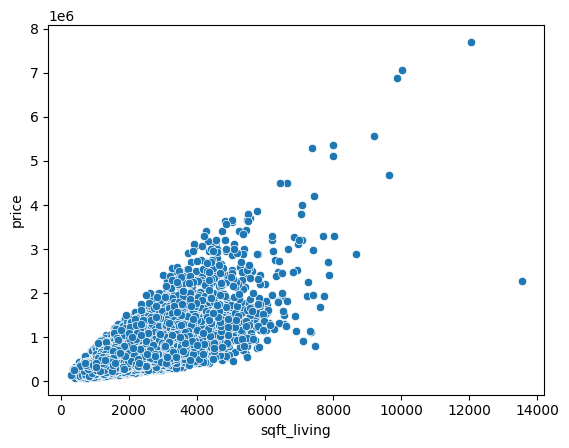

In [338]:
sns.scatterplot(x=house['sqft_living'], y=house['price']) # 회귀분석의 등분산 조건이 깨짐

In [339]:
from statsmodels.formula.api import ols

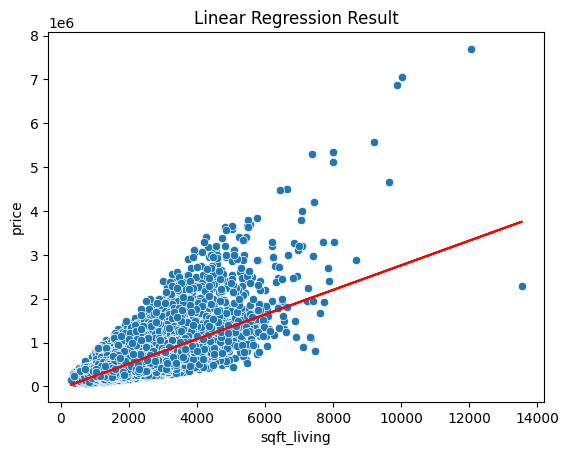

In [340]:
# 변수 할당 
y = house['price']
x = house[['sqft_living']]

# 단순선형회귀모형 적합
lr = ols('price ~ sqft_living', data=house).fit()
y_pred = lr.predict(x)

# 시각화 
sns.scatterplot(x=house['sqft_living'], y=house['price'])
plt.plot(x, y_pred, color='red') ## 회귀직선 추가 
plt.xlabel('sqft_living', fontsize=10)
plt.ylabel('price',fontsize=10)
plt.title('Linear Regression Result')
plt.show()

<Axes: xlabel='sqft_living', ylabel='price'>

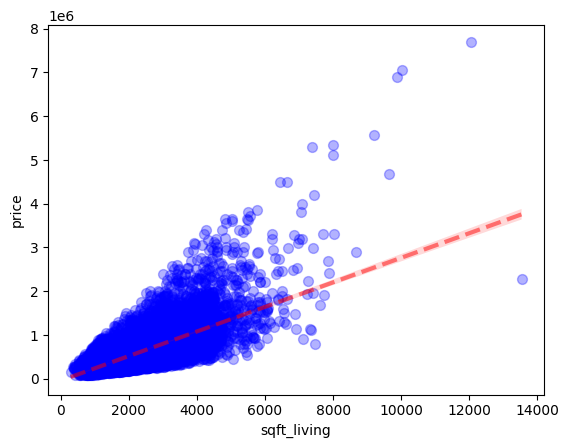

In [341]:
sns.regplot(x=house['sqft_living'], y=house['price'], scatter_kws={"fc":"b", "ec":"b", "s":50, "alpha":0.3}, color="r", line_kws={"lw":3, "ls":"--","alpha":0.5}) # regplot으로 한줄 실행

[결과해석]
- (1) 데이터가 모형 가정을 만족시키는가? <br>
sqrt_living 변수의 값이 커질수록 잔차의 범위가 넓어지고 있어 등분산성 가정에 위배된다.

<Axes: xlabel='sqft_living', ylabel='price'>

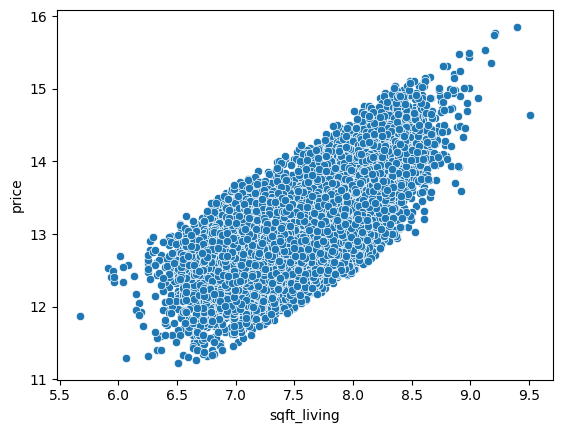

In [342]:
### 데이터를 변형해보자
sns.scatterplot(x=np.log(house['sqft_living']), y=np.log(house['price']))

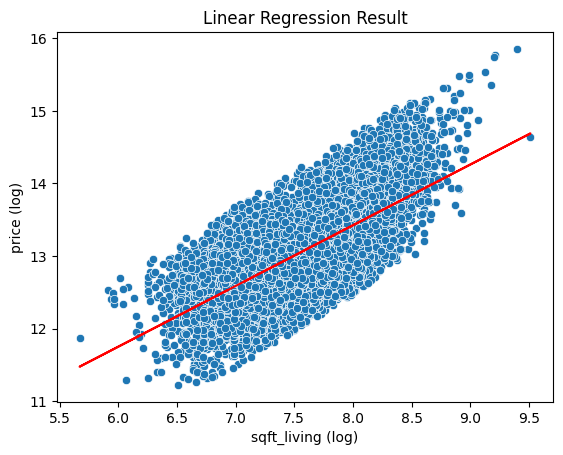

In [343]:
# 변수 할당 
house['log_price'] = np.log(house['price'])
house['log_sqft_living'] = np.log(house[['sqft_living']])

y = house['log_price']
x = house['log_sqft_living']

# 단순선형회귀모형 적합
lr = ols('log_price ~ log_sqft_living', data=house).fit()
y_pred = lr.predict(x)

# 시각화 
sns.scatterplot(x=house['log_sqft_living'], y=house['log_price'])
plt.plot(x, y_pred, color='red') ## 회귀직선 추가 
plt.xlabel('sqft_living (log)', fontsize=10)
plt.ylabel('price (log)',fontsize=10)
plt.title('Linear Regression Result')
plt.show()

<Axes: xlabel='log_sqft_living', ylabel='log_price'>

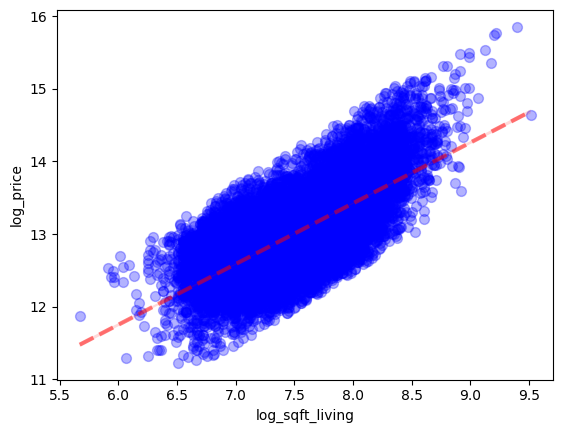

In [344]:
sns.regplot(x=house['log_sqft_living'], y=house['log_price'], scatter_kws={"fc":"b", "ec":"b", "s":50, "alpha":0.3}, color="r", line_kws={"lw":3, "ls":"--","alpha":0.5}) # regplot으로 한줄 실행

In [345]:
lr.summary() # 성능 차이는 별로 안나는듯? 다른 변수가 필요해 보임.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                 1.808e+04
Date:                Sun, 13 Aug 2023   Prob (F-statistic):               0.00
Time:                        20:14:09   Log-Likelihood:                -10240.
No. Observations:               21613   AIC:                         2.048e+04
Df Residuals:                   21611   BIC:                         2.050e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.7299      0.047    143.001      0.000       6.638       6.822
log_sqft_living     0.8368      0.006    134.459      0.000       0.825       0.849
==============================================================================
Omnibus:                      123.344   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.759
Skew:                           0.142   Prob(JB):                     1.98e-25
Kurtosis:                       2.787   Cond. No.                         137.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[결과해석] <br>
- (2) 회귀 모형이 통계적으로 유의한가?  <br>
F 검정의 p-value는 0.00으로, 유의수준 (0.05) 하에서 이 통계모델은 유의하다.
- (3) 모형은 데이터를 얼마나 설명할 수 있는가?  <br>
R-square 값은 0.456으로 데이터의 약 50%를 설명하고 있다.
- (4) 모형 내 회귀계수는 유의한가?  <br>
sqrt_living 변수의 T-test 결과는 p-value 0.000으로 유의한 변수이다.
- (5) 모형이 데이터를 잘 적합하고 있는가? <br>
단순 회귀분석으로는 충분히 데이터를 설명할 수 없어 보인다. 변수 추가를 고려해봐야 한다.

In [346]:
### 맥주 데이터
beer = pd.read_csv("./stats_for_python/5-1-1-beer.csv")
beer.head()

beer  temperature
0  45.3         20.5
1  59.3         25.0
2  40.4         10.0
3  38.0         26.9
4  37.0         15.8

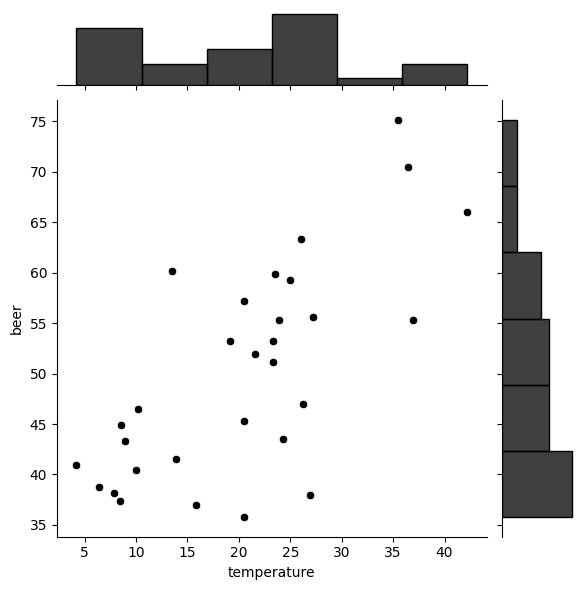

In [347]:
# 변수 확인
sns.jointplot(x="temperature", y="beer", data=beer, color='black')
plt.show()

In [348]:
# Model 생성
lm_model = ols(formula = "beer ~ temperature", data = beer).fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Sun, 13 Aug 2023   Prob (F-statistic):           1.11e-05
Time:                        20:14:10   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [349]:
# ANOVA on regression
sm.stats.anova_lm(lm_model, typ=2)

sum_sq    df          F    PR(>F)
temperature  1651.532489   1.0  28.446984  0.000011
Residual     1625.582178  28.0        NaN       NaN

In [350]:
### 모델 선택: 단순 회귀에서는 Null 모델과 비교
# NULL 모델
null_model = smf.ols("beer ~ 1", data = beer).fit()
null_model.aic

227.94194972563105

In [351]:
# 모델의 aic
lm_model.aic

208.90902935575437

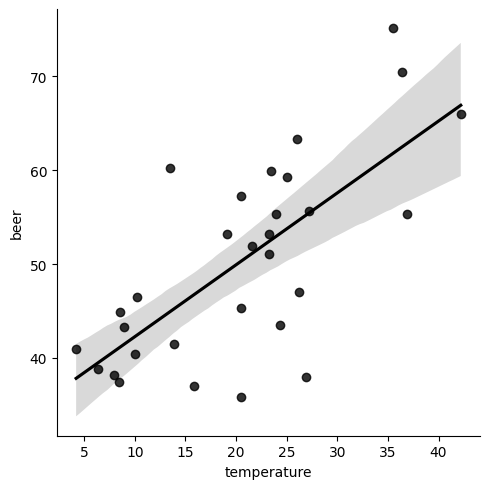

In [352]:
# 회귀직선 확인
sns.lmplot(x="temperature", y="beer", data=beer, scatter_kws={"color": "black"}, line_kws={"color": "black"})
plt.show()

In [353]:
### Prediction
lm_model.predict()

array([50.3014808 , 53.74590495, 42.26449113, 55.20021737, 46.70397114,
       37.82501112, 44.94348769, 54.51133254, 52.44467805, 41.11634975,
       54.66441806, 49.22988218, 53.21010564, 52.44467805, 41.03980699,
       52.59776357, 45.24965873, 61.78289462, 55.42984564, 50.3014808 ,
       42.41757665, 50.3014808 , 51.14345115, 40.6570932 , 66.91125946,
       52.9039346 , 62.85449324, 41.42252079, 62.47177945, 39.50895182])

In [354]:
# 특정 기온에 따른 매상 예측
lm_model.predict(pd.DataFrame({"temperature": [0]})) # Intercept와 일치

0    34.610215
dtype: float64

In [355]:
lm_model.params

Intercept      34.610215
temperature     0.765428
dtype: float64

In [356]:
lm_model.predict(pd.DataFrame({"temperature":[20]}))

0    49.918767
dtype: float64

In [357]:
# Residuals
resid = lm_model.resid
resid.head(3)

0   -5.001481
1    5.554095
2   -1.864491
dtype: float64

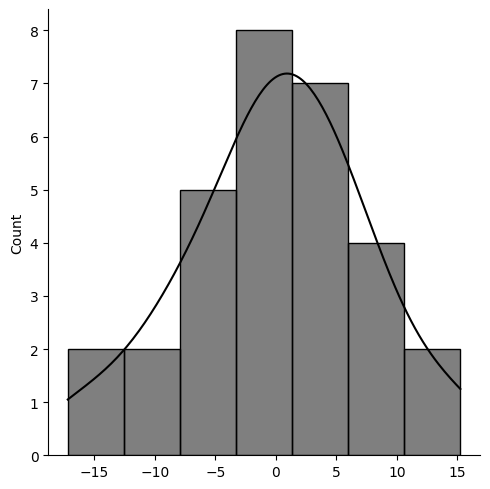

In [358]:
sns.displot(resid, color='black', kde=True)

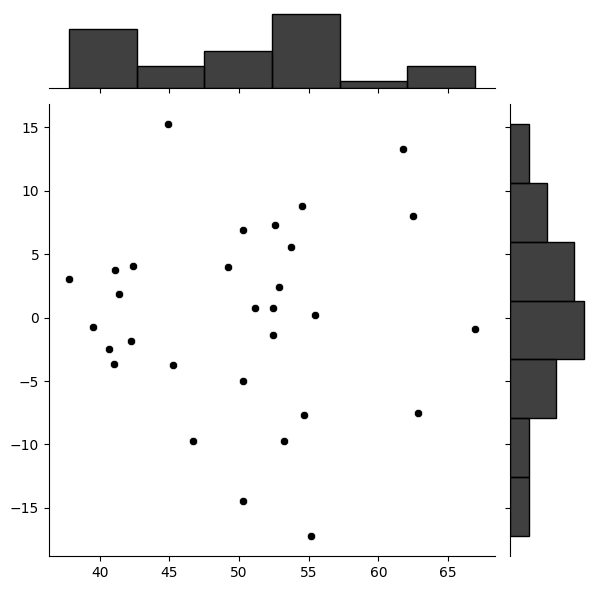

In [359]:
sns.jointplot(x=lm_model.fittedvalues, y=resid, joint_kws={"color": "black"}, marginal_kws={"color": "black"})

In [360]:
# R-square
lm_model.rsquared

0.5039593230611858

In [361]:
# Adj R-square
lm_model.rsquared_adj

0.48624358459908534

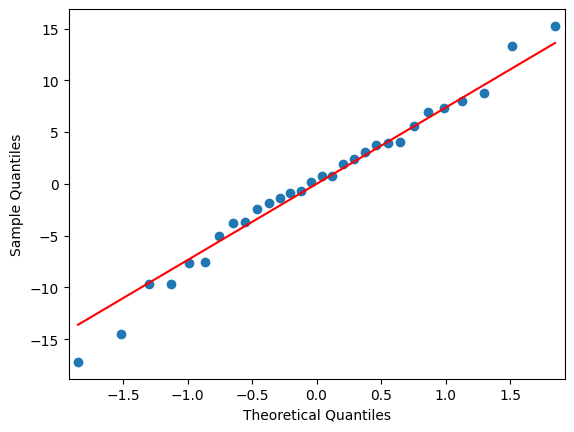

In [362]:
# Q-Q plot
fig = sm.qqplot(resid, line="s")

In [363]:
### Chick diet dataset
chick = pd.read_csv('./r_csv/datasets/ChickWeight.csv')
chick = chick.drop('Unnamed: 0', axis=1)
chick.head()

weight  Time  Chick  Diet
0      42     0      1     1
1      51     2      1     1
2      59     4      1     1
3      64     6      1     1
4      76     8      1     1

In [364]:
diet_1 = chick[chick.Diet==1]

In [365]:
chick_1 = diet_1[diet_1.Chick==1]
chick_1

weight  Time  Chick  Diet
0       42     0      1     1
1       51     2      1     1
2       59     4      1     1
3       64     6      1     1
4       76     8      1     1
5       93    10      1     1
6      106    12      1     1
7      125    14      1     1
8      149    16      1     1
9      171    18      1     1
10     199    20      1     1
11     205    21      1     1

In [366]:
x = chick_1['Time']
y = chick_1['weight']

<Axes: xlabel='Time', ylabel='weight'>

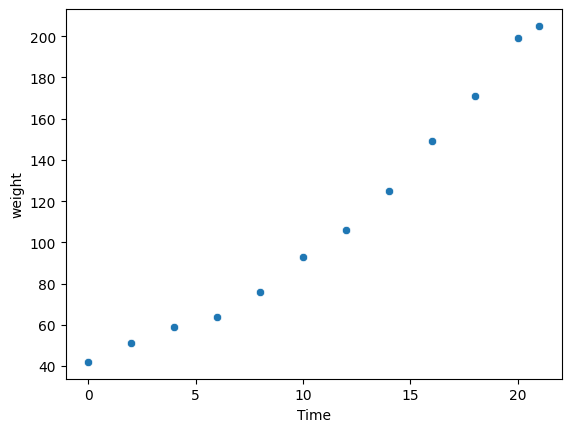

In [367]:
sns.scatterplot(x=x, y=y) # 사실은 시계열분석을 해야되는거 아닌가..

In [368]:
lr = ols('weight ~ Time', data=chick_1).fit()
y_pred = lr.predict(x)

In [369]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     232.7
Date:                Sun, 13 Aug 2023   Prob (F-statistic):           2.97e-08
Time:                        20:14:11   Log-Likelihood:                -46.039
No. Observations:                  12   AIC:                             96.08
Df Residuals:                      10   BIC:                             97.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.4654      6.728      3.636      0.005       9.475      39.456
Time           7.9879      0.524     15.255      0.000       6.821       9.155
==============================================================================
Omnibus:                        3.840   Durbin-Watson:                   0.342
Prob(Omnibus):                  0.147   Jarque-Bera (JB):                1.217
Skew:                           0.211   Prob(JB):                        0.544
Kurtosis:                       1.498   Cond. No.                         24.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

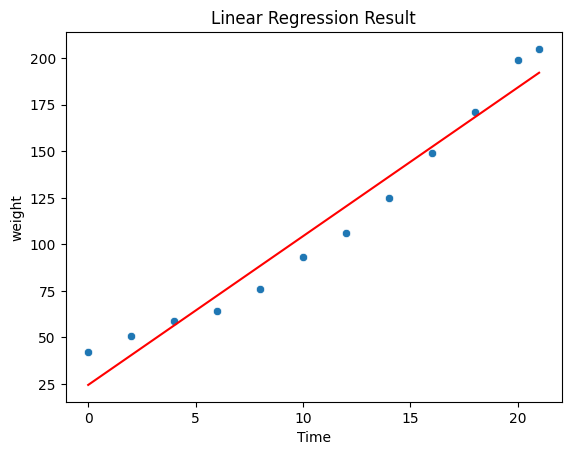

In [370]:
sns.scatterplot(x=x, y=y)
plt.plot(x, y_pred, color='red') ## 회귀직선 추가 
plt.xlabel('Time', fontsize=10)
plt.ylabel('weight',fontsize=10)
plt.title('Linear Regression Result')
plt.show()

<Axes: xlabel='Time', ylabel='weight'>

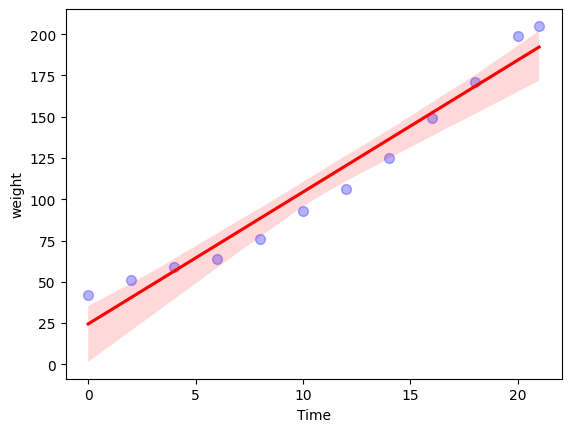

In [371]:
sns.regplot(x=x, y=y, scatter_kws={"fc":"b", "ec":"b", "s":50, "alpha":0.3}, color="r") # regplot으로 한줄 실행

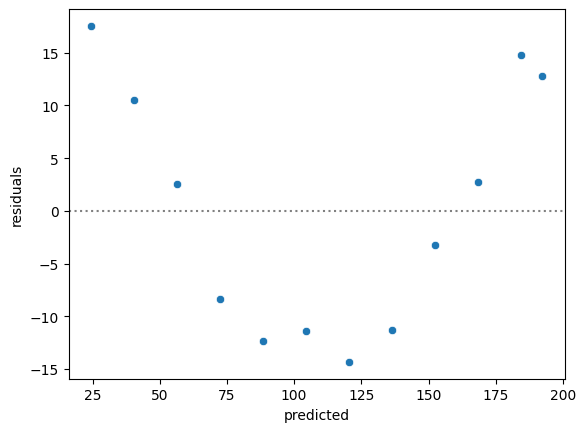

In [372]:
### Manual residual plot
# create a DataFrame of predicted values and residuals
plot_df = pd.DataFrame()
plot_df["predicted"] = y_pred
plot_df["residuals"] = lr.resid

sns.scatterplot(data=plot_df, x="predicted", y="residuals")
plt.axhline(y=0, color='gray', linestyle='dotted')

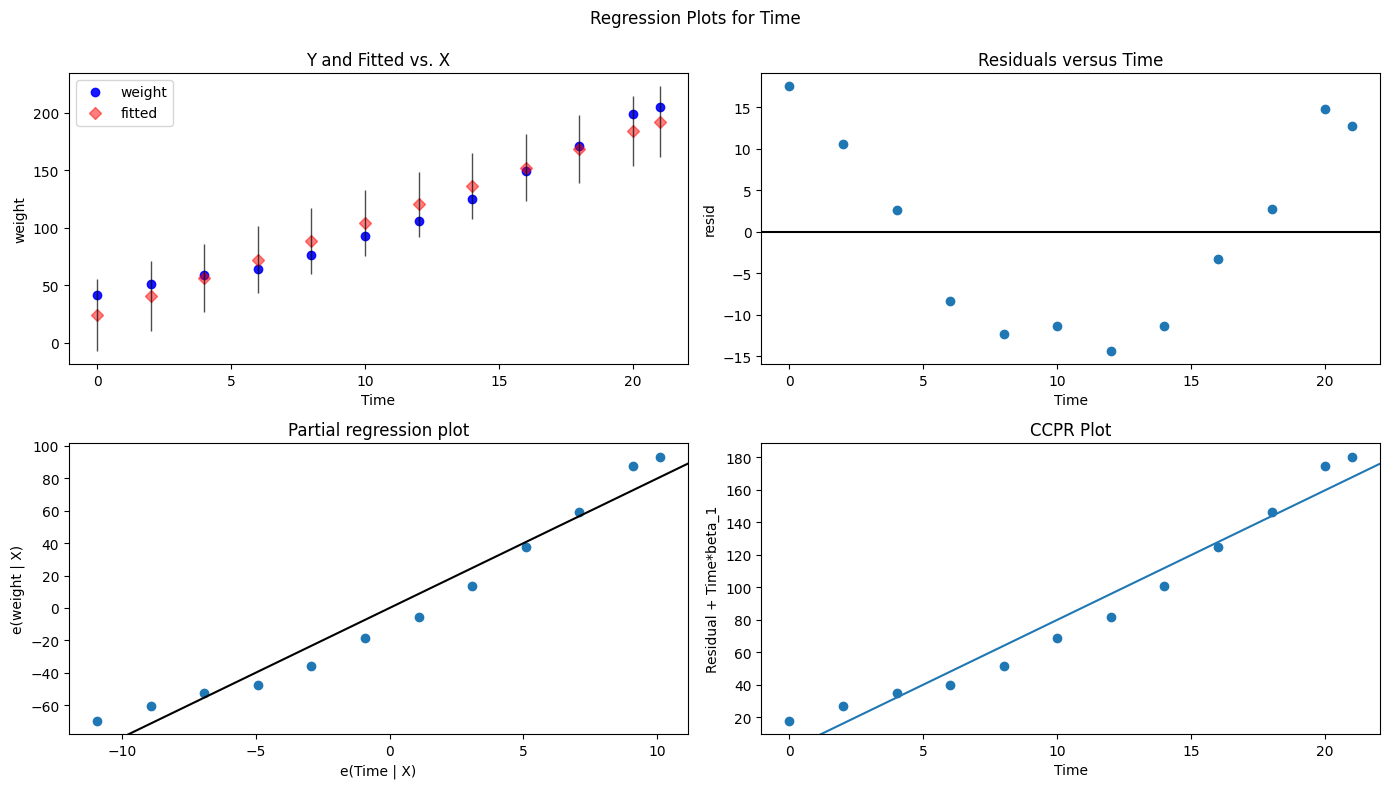

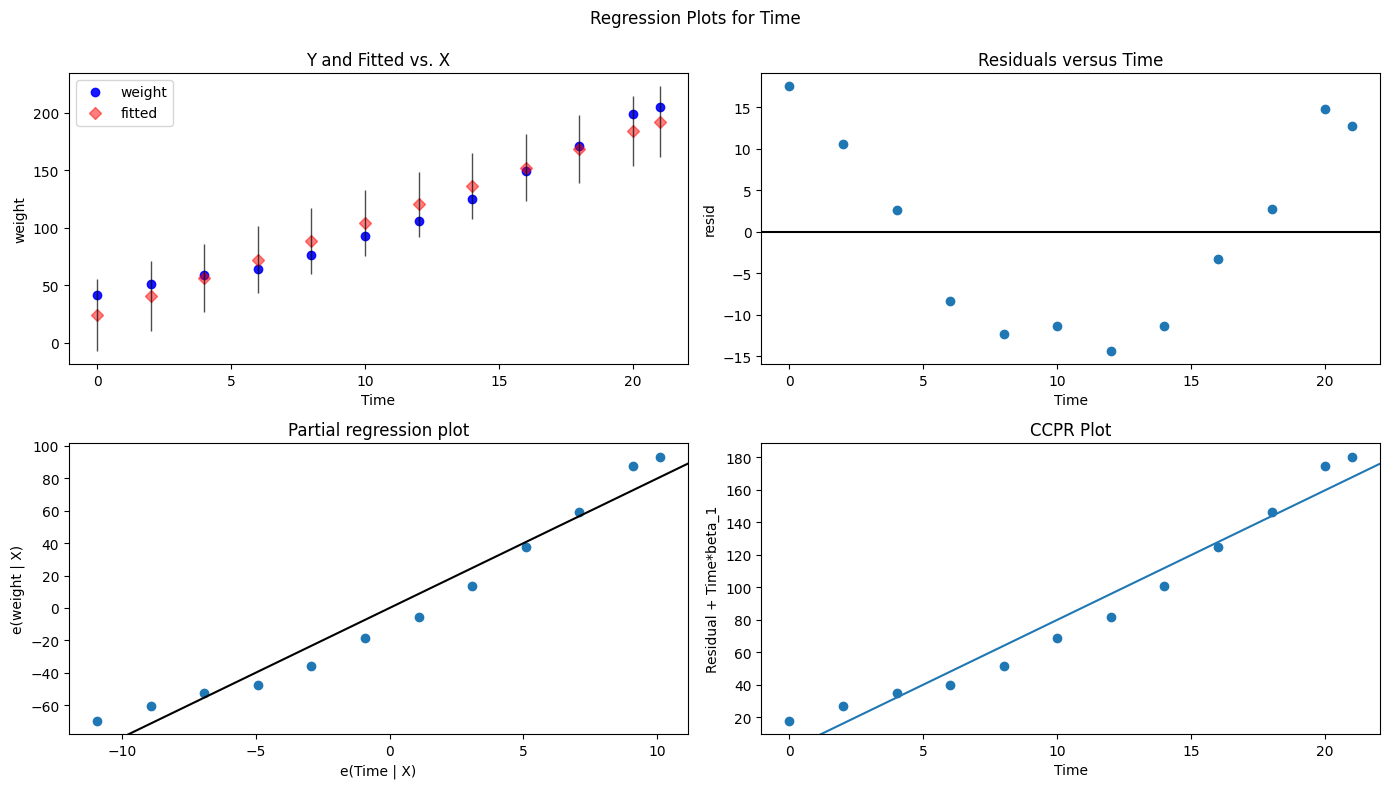

In [373]:
### Residual plot
fig = plt.figure(figsize=(14, 8))
sm.graphics.plot_regress_exog(lr, 'Time', fig=fig)

### (2) Multiple Regression
- 독립변수 개수가 여러 개인 경우
- 독립변수 개수가 늘면 R-square 값은 항상 증가하므로, Adjusted R-square (변수 개수 고려)로 설명력 측정
- 다중공선성 확인
    - VIF 10 이상
    - 독립변수 간 상관계수 0.9 이상
    - 독립변수 간 회귀분석의 허용오차(1-Rsquare) 0.1 이하
- 오차항의 독립성
    - 더빈 왓슨 통계랑: 0~4의 값을 가지며, 0이면 양의 상관, 4면 음의 상관. 2=상관 없음
- 독립변수 선택: 최적의 회귀식 도출
    - 모든 가능한 조합
    - 단계적 변수선택: Forward, Backward, Stepwise
    - AIC, BIC, F-statistic 등이 기준이 됨

In [374]:
### Sales data
sales = pd.read_csv("./stats_for_python/5-3-1-lm-model.csv")
sales.head(3)

humidity  price  sales  temperature weather
0      29.5    290  229.7         17.8   rainy
1      38.1    290  206.1         26.1   rainy
2      31.5    290  202.5         22.0   rainy

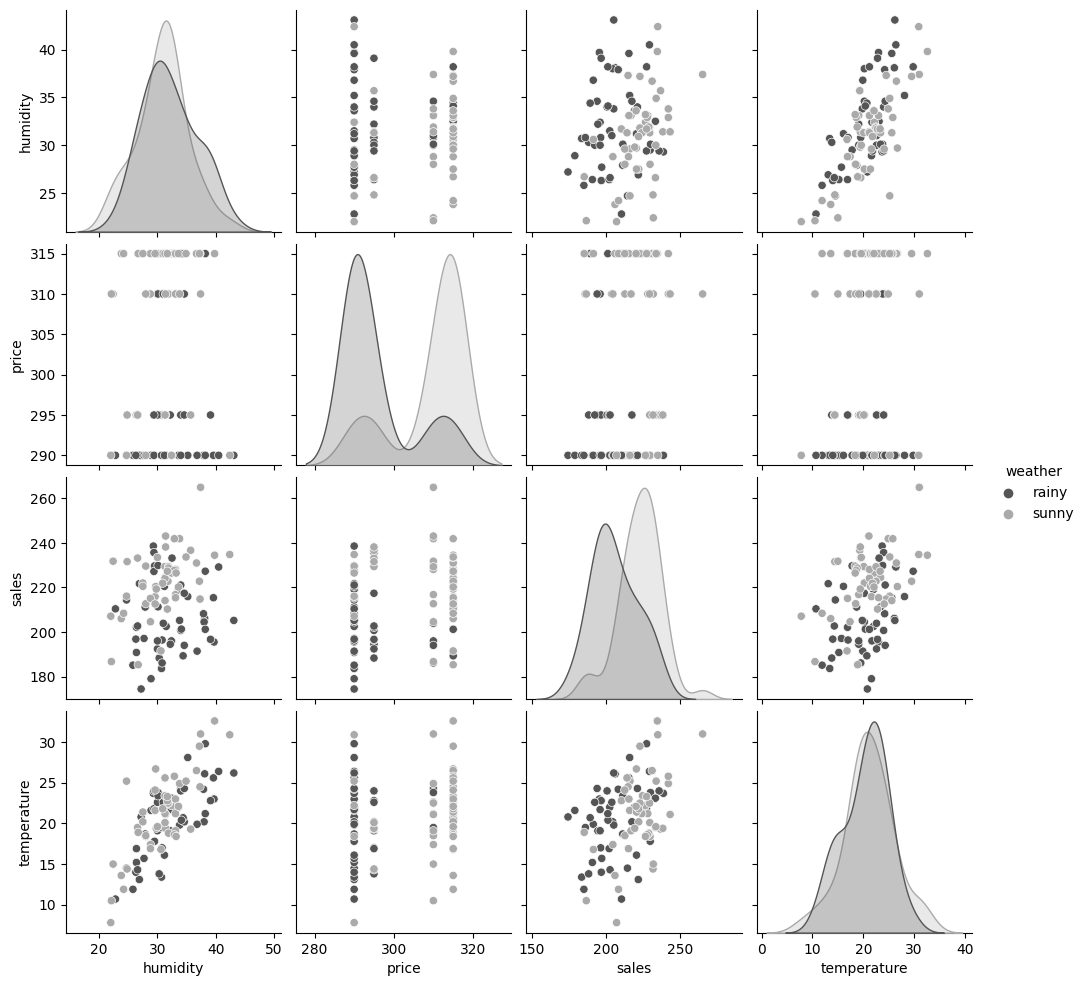

In [375]:
sns.pairplot(data=sales, hue="weather", palette="gray")
plt.show()

In [376]:
# 날씨 별 평균
sales.groupby("weather").mean()

humidity  price    sales  temperature
weather                                       
rainy      32.126  295.5  205.924       20.422
sunny      30.852  309.5  222.718       21.102

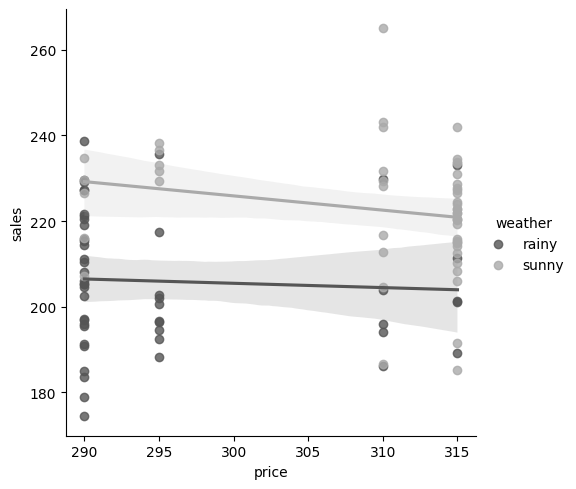

In [377]:
# 날씨 별 매상과 상품 가격
sns.lmplot(x="price", y="sales", data=sales, hue="weather", palette='gray')
plt.show()

In [378]:
# Multiple X
lm_sales = smf.ols("sales ~ weather + humidity + temperature + price", data=sales).fit()
lm_sales.params

Intercept           278.627722
weather[T.sunny]     19.989119
humidity             -0.254055
temperature           1.603115
price                -0.329207
dtype: float64

In [379]:
# Regression 계수 검정 (T-test) -> Type 2 ANOVA
lm_sales.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

In [380]:
# Null Model에서 시작하여 변수 선택
mod_null = smf.ols("sales ~ 1", sales).fit()
resid_sq_null = np.sum(mod_null.resid ** 2)
resid_sq_null

28968.525899999993

In [381]:
# 날씨가 들어간 모델
mod_1 = smf.ols("sales ~ weather", sales).fit()
sm.stats.anova_lm(mod_1).round(3)

df     sum_sq   mean_sq       F  PR(>F)
weather    1.0   7050.961  7050.961  31.527     0.0
Residual  98.0  21917.565   223.649     NaN     NaN

In [382]:
# 날씨 + 습도 모델
mod_2 = smf.ols("sales ~ weather + humidity", sales).fit()
sm.stats.anova_lm(mod_2).round(3)

df     sum_sq   mean_sq       F  PR(>F)
weather    1.0   7050.961  7050.961  33.963   0.000
humidity   1.0   1779.601  1779.601   8.572   0.004
Residual  97.0  20137.964   207.608     NaN     NaN

In [383]:
# 날씨 + 기온 모델
mod_2_2 = smf.ols("sales ~ weather + temperature", sales).fit()
sm.stats.anova_lm(mod_2_2).round(3)

df     sum_sq   mean_sq       F  PR(>F)
weather       1.0   7050.961  7050.961  37.781     0.0
temperature   1.0   3814.779  3814.779  20.441     0.0
Residual     97.0  18102.786   186.627     NaN     NaN

In [384]:
# 날씨 + 기온 + 습도 모델
# 습도의 효과가 높지 않음 (유의하지 않음)
mod_3_2 = smf.ols("sales ~ weather + temperature + humidity", sales).fit()
sm.stats.anova_lm(mod_3_2).round(3)

df     sum_sq   mean_sq       F  PR(>F)
weather       1.0   7050.961  7050.961  37.478   0.000
temperature   1.0   3814.779  3814.779  20.277   0.000
humidity      1.0     41.667    41.667   0.221   0.639
Residual     96.0  18061.119   188.137     NaN     NaN

In [385]:
# 전체 변수 모델
mod_full = smf.ols("sales ~ weather + humidity + temperature + price", sales).fit()
sm.stats.anova_lm(mod_full, typ=2).round(3)

sum_sq    df       F  PR(>F)
weather       5845.878   1.0  32.208   0.000
humidity        56.425   1.0   0.311   0.578
temperature   2378.017   1.0  13.102   0.000
price          818.402   1.0   4.509   0.036
Residual     17242.717  95.0     NaN     NaN

In [386]:
# 습도 제외 모델
mod_non_humi = smf.ols("sales ~ weather + temperature + price", sales).fit()
sm.stats.anova_lm(mod_non_humi, typ=2).round(3)

sum_sq    df       F  PR(>F)
weather       6354.966   1.0  35.266   0.000
temperature   4254.736   1.0  23.611   0.000
price          803.644   1.0   4.460   0.037
Residual     17299.142  96.0     NaN     NaN

In [387]:
# 2개 모델 비교
mod_full.compare_f_test(mod_non_humi)

(0.31087803756963617, 0.578453342712073, 1.0)

In [388]:
# AIC 비교
print("Full:", mod_full.aic.round(3))
print("습도 제외:", mod_non_humi.aic.round(3))

Full: 808.785
습도 제외: 807.112


In [389]:
from scipy.stats import linregress

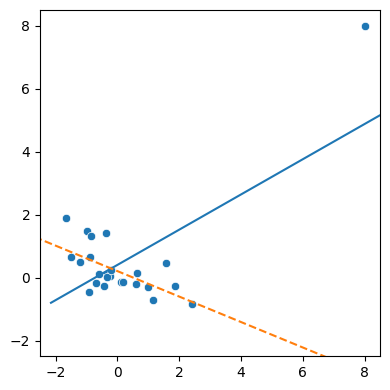

In [390]:
### Outlier 영향 - sample
np.random.seed(5)
x = np.random.normal(size=25)
y = -x / 5 + np.random.normal(size=25)
x[0] = 8
y[0] = 8

def abline(slope, intercept):
    """Calculate coordinates of a line based on slope and intercept"""
    x_vals = np.array(plt.xlim())
    return (x_vals, intercept + slope * x_vals)

fig, ax = plt.subplots(figsize=(4, 4))
sns.scatterplot(x=x, y=y)
slope, intercept, _, _, _ = linregress(x, y)
plt.plot(*abline(slope, intercept))
slope, intercept, _, _, _ = linregress(x[1:], y[1:])
plt.plot(*abline(slope, intercept), '--')
plt.xlim(-2.5, 8.5)
plt.ylim(-2.5, 8.5)

plt.tight_layout()
plt.show()

In [391]:
house = pd.read_csv('./Practical_Statictics/data/house_sales.csv', sep='\t')
house_98105 = house.loc[house['ZipCode'] == 98105, ]

In [392]:
### Regression 진단
house_outlier = smf.ols('AdjSalePrice ~ SqFtTotLiving + SqFtLot + Bathrooms + Bedrooms + BldgGrade', data=house_98105)
result_98105 = house_outlier.fit()
result_98105.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     238.7
Date:                Sun, 13 Aug 2023   Prob (F-statistic):          1.69e-103
Time:                        20:14:14   Log-Likelihood:                -4226.0
No. Observations:                 313   AIC:                             8464.
Df Residuals:                     307   BIC:                             8486.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -7.725e+05   9.83e+04     -7.861      0.000   -9.66e+05   -5.79e+05
SqFtTotLiving   209.6023     24.408      8.587      0.000     161.574     257.631
SqFtLot          38.9333      5.330      7.305      0.000      28.445      49.421
Bathrooms      2282.2641      2e+04      0.114      0.909    -3.7e+04    4.16e+04
Bedrooms      -2.632e+04   1.29e+04     -2.043      0.042   -5.17e+04    -973.867
BldgGrade        1.3e+05   1.52e+04      8.533      0.000       1e+05     1.6e+05
==============================================================================
Omnibus:                       82.127   Durbin-Watson:                   1.508
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              586.561
Skew:                           0.859   Prob(JB):                    4.26e-128
Kurtosis:                       9.483   Cond. No.                     5.63e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [393]:
from statsmodels.stats.outliers_influence import OLSInfluence

In [394]:
### 잔차 분석
influence = OLSInfluence(result_98105)
sresiduals = influence.resid_studentized_internal

print(sresiduals.idxmin(), sresiduals.min())

24333 -4.3267318040785705


In [395]:
result_98105.resid.loc[sresiduals.idxmin()]

-757753.6192115839

In [396]:
### Outlier 확인
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

outlier = house_98105.loc[sresiduals.idxmin(), :]
print('AdjSalePrice', outlier[outcome], '\n')
print(outlier[predictors])

AdjSalePrice 119748.0 

SqFtTotLiving    2900
SqFtLot          7276
Bathrooms         3.0
Bedrooms            6
BldgGrade           7
Name: 24333, dtype: object


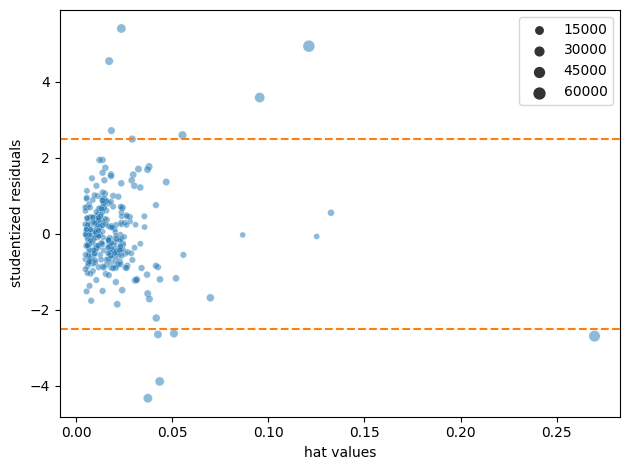

In [397]:
### Cook's distance
influence = OLSInfluence(result_98105)
sns.scatterplot(x=influence.hat_matrix_diag, y=influence.resid_studentized_internal, 
           size=100000 * np.sqrt(influence.cooks_distance[0]), alpha=0.5)

plt.axhline(-2.5, linestyle='--', color='C1')
plt.axhline(2.5, linestyle='--', color='C1')
plt.xlabel('hat values')
plt.ylabel('studentized residuals')

plt.tight_layout()
plt.show()

In [398]:
### 쿡 거리가 0.08 이상인 것 제외
mask = [dist < .08 for dist in influence.cooks_distance[0]]
house_infl = house_98105.loc[mask]

ols_infl = smf.ols('AdjSalePrice ~ SqFtTotLiving + SqFtLot + Bathrooms + Bedrooms + BldgGrade', data=house_infl)
result_infl = ols_infl.fit()

pd.DataFrame({
    'Original': result_98105.params,
    'Influential removed': result_infl.params,
})

Original  Influential removed
Intercept     -772549.862447       -647137.096716
SqFtTotLiving     209.602346           230.052569
SqFtLot            38.933315            33.141600
Bathrooms        2282.264145        -16131.879785
Bedrooms       -26320.268796        -22887.865318
BldgGrade      130000.099737        114870.559737

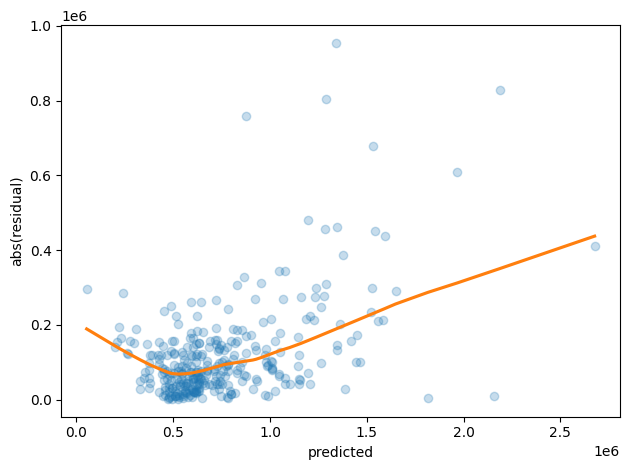

In [399]:
### 이분산 오차 확인
sns.regplot(x=result_98105.fittedvalues, y=np.abs(result_98105.resid), 
            scatter_kws={'alpha': 0.25},
            line_kws={'color': 'C1'},
            lowess=True)
plt.xlabel('predicted')
plt.ylabel('abs(residual)')
plt.tight_layout()
plt.show()

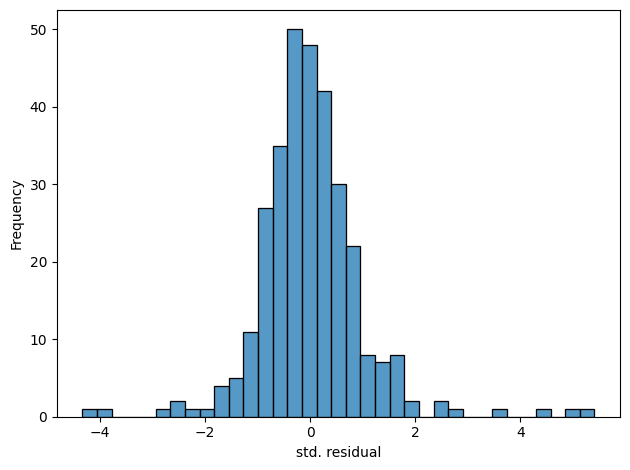

In [400]:
sns.histplot(x=pd.Series(influence.resid_studentized_internal))
plt.xlabel('std. residual')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

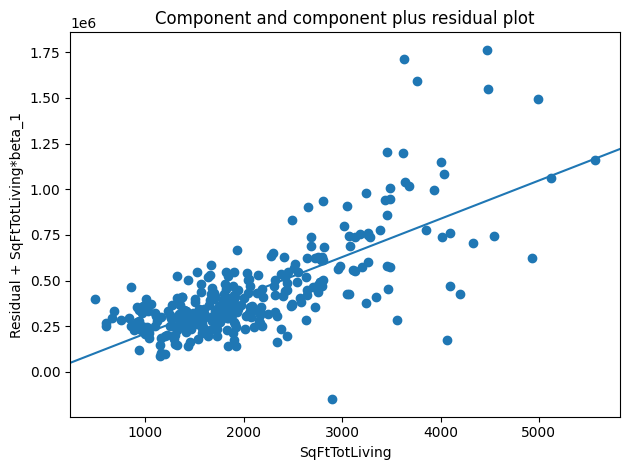

In [401]:
### Partial Residual plots
# partial residual = residual + biXi
# 예측값과 잔차 결합
# 비선형 회귀 고려
sm.graphics.plot_ccpr(result_98105, 'SqFtTotLiving')

plt.tight_layout()
plt.show()

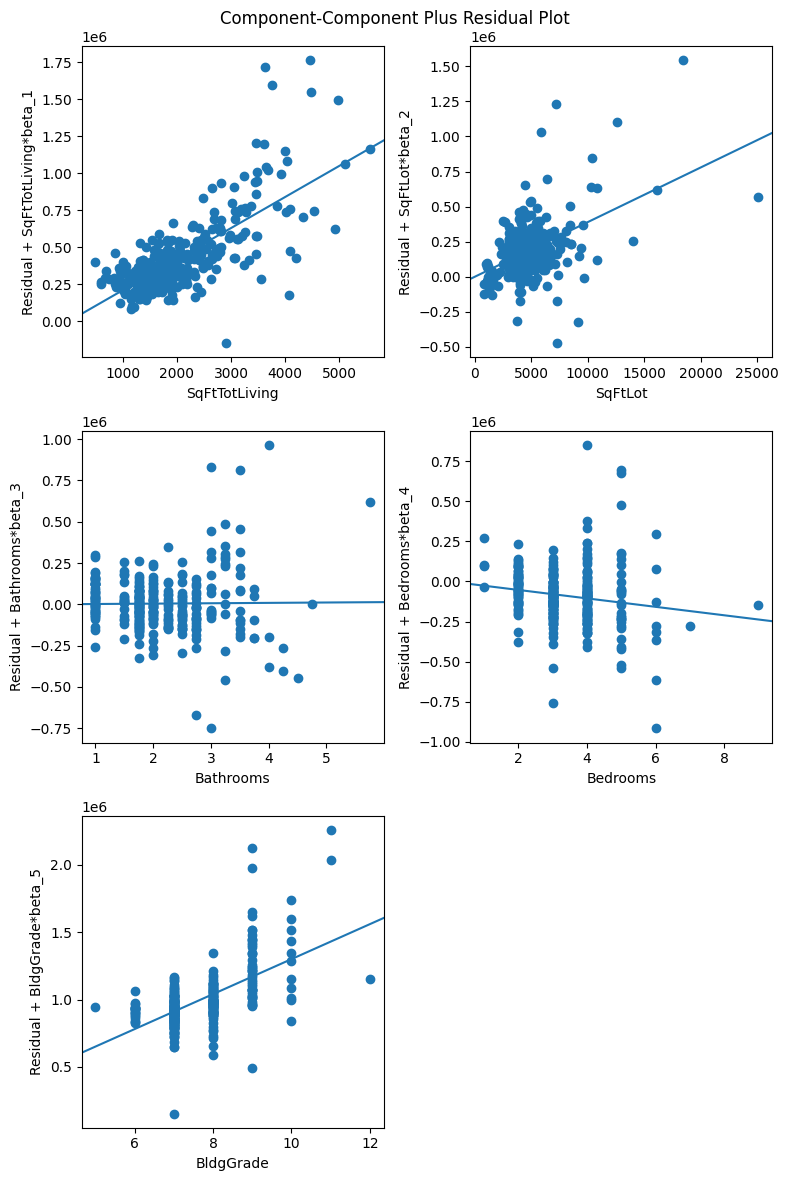

In [402]:
fig = plt.figure(figsize=(8, 12))
fig = sm.graphics.plot_ccpr_grid(result_98105, fig=fig)

In [403]:
### Dummy data
df = pd.DataFrame({'X1': [7, 1, 11, 11, 7, 11, 3, 1, 2, 21, 1, 11, 10],
                   'X2': [26, 29, 56, 31, 52, 55, 71, 31, 54, 47, 40, 66, 68],
                   'X3': [6, 15, 8, 8, 6, 9, 17, 22, 18, 4, 23, 9, 8],
                   'X4': [60, 52, 20, 47, 33, 22, 6, 44, 22, 26, 34, 12, 12],
                   'Y': [78.5, 74.3, 104.3, 87.6, 95.9, 109.2, 102.7, 72.5, 93.1, 115.9, 83.8, 113.3, 109.4]})
df

X1  X2  X3  X4      Y
0    7  26   6  60   78.5
1    1  29  15  52   74.3
2   11  56   8  20  104.3
3   11  31   8  47   87.6
4    7  52   6  33   95.9
5   11  55   9  22  109.2
6    3  71  17   6  102.7
7    1  31  22  44   72.5
8    2  54  18  22   93.1
9   21  47   4  26  115.9
10   1  40  23  34   83.8
11  11  66   9  12  113.3
12  10  68   8  12  109.4

In [404]:
### 변수 간 상관성 확인
df.corr()

X1        X2        X3        X4         Y
X1  1.000000  0.228579 -0.824134 -0.245445  0.730717
X2  0.228579  1.000000 -0.139242 -0.972955  0.816253
X3 -0.824134 -0.139242  1.000000  0.029537 -0.534671
X4 -0.245445 -0.972955  0.029537  1.000000 -0.821305
Y   0.730717  0.816253 -0.534671 -0.821305  1.000000

In [405]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [406]:
### VIF 계산
# 독립변수와 종속변수를 데이터프레임으로 나누어 저장하는 함수
# Intercept가 포함됨
y, x = dmatrices("Y ~ X1 + X2 + X3 + X4", data=df, return_type="dataframe")

# 독립변수끼리의 VIF값을 계산하여 데이터프레임으로 만드는 과정 
vif_list = []
for i in range(1, len(x.columns)): 
    vif_list.append([variance_inflation_factor(x.values, i), x.columns[i]])
pd.DataFrame(vif_list, columns=['vif', 'variable'])

vif variable
0   38.496211       X1
1  254.423166       X2
2   46.868386       X3
3  282.512865       X4

In [407]:
### VIF 10 이상인 변수를 지우는 함수
def apply_vif(data, target_col):
    vif_df = pd.DataFrame()
    x_columns = list(data.columns.difference([target_col]))
    for j in range(len(x_columns)):
        x_str = ''
        for i, column in enumerate(x_columns):
            if i == len(x_columns) -1:
                x_str += column
            else:
                x_str += column + ' + '
    
        y, x = dmatrices(f"{target_col} ~ {x_str}", data=data, return_type="dataframe")
    
        vif_list = []
        for i in range(1, len(x.columns)): 
            vif_list.append([variance_inflation_factor(x.values, i), x.columns[i]])
        vif_df = pd.DataFrame(vif_list, columns=['vif', 'variable'])
        
        if vif_df['vif'].max() > 10:
            del_column = vif_df['variable'][vif_df['vif']==vif_df['vif'].max()].values[0]
            x_columns.remove(del_column)
        else:
            break
    
    return y, x, vif_df

In [408]:
y, x, vif_df = apply_vif(df, 'Y')
vif_df

vif variable
0  3.251068       X1
1  1.063575       X2
2  3.142125       X3

In [409]:
### Model fit
model = ols(formula="Y ~ X1 + X2 + X3", data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     166.3
Date:                Sun, 13 Aug 2023   Prob (F-statistic):           3.37e-08
Time:                        20:14:15   Log-Likelihood:                -26.952
No. Observations:                  13   AIC:                             61.90
Df Residuals:                       9   BIC:                             64.16
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     48.1936      3.913     12.315      0.000      39.341      57.046
X1             1.6959      0.205      8.290      0.000       1.233       2.159
X2             0.6569      0.044     14.851      0.000       0.557       0.757
X3             0.2500      0.185      1.354      0.209      -0.168       0.668
==============================================================================
Omnibus:                        0.164   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.921   Jarque-Bera (JB):                0.261
Skew:                           0.208   Prob(JB):                        0.878
Kurtosis:                       2.445   Cond. No.                         319.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [410]:
### 모델 선택 함수
import time
import itertools
import statsmodels.api as sm

def process_subset(x, y, feature_set):
    model = sm.OLS(y, x[list(feature_set)]) # Modeling
    regr = model.fit() # 모델 학습
    criteria = regr.aic # 모델의 AIC 이 부분을 변경하면 기준을 바꿀 수 있음
    # regr.bic
    # regr.rsquared_adj
    
    return {"model": regr, "criteria": criteria}
        
# 전진선택법
def forward(x, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in x.columns.difference(['Intercept']) if p not in predictors]
    results = []
    for p in remaining_predictors:
        results.append(process_subset(x=x, y=y, feature_set=predictors + [p] + ['Intercept']))
        
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)
    # AIC가 가장 낮은 것을 선택. 기준에 따라 변경 필요
    best_model = models.loc[models['criteria'].argmin()] # index
    print("Processed ", models.shape[0], "models on", len(predictors) + 1, "predictors in")
    print('Selected predictors:', best_model['model'].model.exog_names,' Criteria: ', best_model[0])
    
    return best_model

# 후진소거법
def backward(x, y, predictors):
    tic = time.time()
    results = []
    
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(process_subset(x=x, y=y, feature_set=list(combo) + ['Intercept']))
    models = pd.DataFrame(results)
    
    # 가장 낮은 AIC를 가진 모델을 선택. 기준에 따라 변경 필요
    best_model = models.loc[models['criteria'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors) -1, "predictors in", (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names, 'Criteria: ',best_model[0] )

    return best_model

# 단계적 선택법
def stepwise_model(x, y):
    stepmodels = pd.DataFrame(columns=["criteria", "model"])
    tic = time.time()
    predictors = []
    s_model_before = process_subset(x, y, predictors + ['Intercept'])['criteria']
    print("Criteria, Before selection:", s_model_before)

    for i in range(1, len(x.columns.difference(['Intercept'])) +1):
        forward_result = forward(x=x, y=y, predictors=predictors) 
        print('forward')
        stepmodels.loc[i] = forward_result
        predictors = stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k !='Intercept']
        backward_result = backward(x=x, y=y, predictors=predictors)

        if backward_result['criteria'] < forward_result['criteria']:
            stepmodels.loc[i] = backward_result
            predictors = stepmodels.loc[i]["model"].model.exog_names
            s_model_before = stepmodels.loc[i]["criteria"]
            predictors = [k for k in predictors if k !='Intercept']
            print('backward')
            
        print("Criteria: ", stepmodels.loc[i]['criteria'])
        if stepmodels.loc[i]['criteria'] > s_model_before: # 기준에 따라 멈춤 기준 변경 필요
            break
        else:
            s_model_before = stepmodels.loc[i]["criteria"]
            
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return (stepmodels['model'][len(stepmodels['model'])])

In [411]:
### 전진선택법 구현
def forward_model(x, y):
    formodels = pd.DataFrame(columns=["criteria", "model"])
    tic = time.time()
    predictors = []
    model_result_before = process_subset(x, y, predictors + ['Intercept'])
    s_model_before = model_result_before['criteria']
    print("Criteria, Before selection:", s_model_before)

    for i in range(1, len(x.columns.difference(['Intercept'])) + 1):
        forward_result = forward(x=x, y=y, predictors=predictors) 
        print('forward')
        formodels.loc[i] = forward_result
        predictors = formodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k !='Intercept']
        print("Criteria: ", formodels.loc[i]['criteria'])
        if formodels.loc[i]['criteria'] > s_model_before:
            break
        else:
            s_model_before = formodels.loc[i]["criteria"]
            
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    
    if len(predictors)==len(x.columns.difference(['Intercept'])):
        return (formodels['model'][len(formodels['model'])])
    elif len(predictors)==1:
        return model_result_before['model']
    else:
        return (formodels['model'][len(formodels['model'])-1])

### 후진선택법 구현
def backward_model(x, y):
    backmodels = pd.DataFrame(columns=["criteria", "model"])
    tic = time.time()
    predictors = list(x.columns.difference(['Intercept']))
    model_result_before = process_subset(x, y, predictors)
    s_model_before = model_result_before['criteria']
    print("Criteria, Before selection:", s_model_before)

    for i in range(1, len(x.columns.difference(['Intercept'])) + 1):
        backward_result = backward(x=x, y=y, predictors=predictors) 
        print('backward')
        backmodels.loc[i] = backward_result
        predictors = backmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k !='Intercept']
        print("Criteria: ", backmodels.loc[i]['criteria'])
        if backmodels.loc[i]['criteria'] > s_model_before:
            break
        else:
            s_model_before = backmodels.loc[i]["criteria"]
            
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    
    if len(predictors)==0:
        return (backmodels['model'][len(backmodels['model'])])
    elif len(predictors)==len(x.columns.difference(['Intercept']))-1:
        return model_result_before['model']
    else:
        return (backmodels['model'][len(backmodels['model'])-1])


In [412]:
forward_model(x, y).summary()

Criteria, Before selection: 108.33682749906006
Processed  3 models on 1 predictors in
Selected predictors: ['X2', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x2cf5629d0>
forward
Criteria:  96.0703964203777
Processed  2 models on 2 predictors in
Selected predictors: ['X2', 'X1', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x2cf513490>
forward
Criteria:  62.31239276219058
Processed  1 models on 3 predictors in
Selected predictors: ['X2', 'X1', 'X3', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x2cf5624f0>
forward
Criteria:  61.90359687059504
Total elapsed time: 0.00846099853515625 seconds.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     166.3
Date:                Sun, 13 Aug 2023   Prob (F-statistic):           3.37e-08
Time:                        20:14:15   Log-Likelihood:                -26.952
No. Observations:                  13   AIC:                             61.90
Df Residuals:                       9   BIC:                             64.16
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X2             0.6569      0.044     14.851      0.000       0.557       0.757
X1             1.6959      0.205      8.290      0.000       1.233       2.159
X3             0.2500      0.185      1.354      0.209      -0.168       0.668
Intercept     48.1936      3.913     12.315      0.000      39.341      57.046
==============================================================================
Omnibus:                        0.164   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.921   Jarque-Bera (JB):                0.261
Skew:                           0.208   Prob(JB):                        0.878
Kurtosis:                       2.445   Cond. No.                         319.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [413]:
stepwise_model(x, y).summary()

Criteria, Before selection: 108.33682749906006
Processed  3 models on 1 predictors in
Selected predictors: ['X2', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x2cf5a1550>
forward
Processed  1 models on 0 predictors in 0.0011878013610839844
Selected predictors: ['Intercept'] Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x2cf5a1340>
Criteria:  96.0703964203777
Processed  2 models on 2 predictors in
Selected predictors: ['X2', 'X1', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x2cf558280>
forward
Processed  2 models on 1 predictors in 0.0013229846954345703
Selected predictors: ['X2', 'Intercept'] Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x2cf5a1430>
Criteria:  62.31239276219058
Processed  1 models on 3 predictors in
Selected predictors: ['X2', 'X1', 'X3', 'Intercept']  Criteria:  <statsmodels.regression.li

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     166.3
Date:                Sun, 13 Aug 2023   Prob (F-statistic):           3.37e-08
Time:                        20:14:15   Log-Likelihood:                -26.952
No. Observations:                  13   AIC:                             61.90
Df Residuals:                       9   BIC:                             64.16
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X2             0.6569      0.044     14.851      0.000       0.557       0.757
X1             1.6959      0.205      8.290      0.000       1.233       2.159
X3             0.2500      0.185      1.354      0.209      -0.168       0.668
Intercept     48.1936      3.913     12.315      0.000      39.341      57.046
==============================================================================
Omnibus:                        0.164   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.921   Jarque-Bera (JB):                0.261
Skew:                           0.208   Prob(JB):                        0.878
Kurtosis:                       2.445   Cond. No.                         319.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [414]:
### hills data
hills = pd.read_csv('./r_csv/MASS/hills.csv', index_col='Unnamed: 0')
hills.head()

dist  climb    time
Greenmantle    2.5    650  16.083
Carnethy       6.0   2500  48.350
Craig Dunain   6.0    900  33.650
Ben Rha        7.5    800  45.600
Ben Lomond     8.0   3070  62.267

In [415]:
### VIF 계산
# 독립변수와 종속변수를 데이터프레임으로 나누어 저장하는 함수
# Intercept가 포함됨
y, x = dmatrices("time ~ dist + climb", data=hills, return_type="dataframe")

# 독립변수끼리의 VIF값을 계산하여 데이터프레임으로 만드는 과정 
vif_list = []
for i in range(1, len(x.columns)): 
    vif_list.append([variance_inflation_factor(x.values, i), x.columns[i]])
pd.DataFrame(vif_list, columns=['vif', 'variable'])

vif variable
0  1.740812     dist
1  1.740812    climb

In [416]:
### Forward selection
forward_model(x, y).summary()

Criteria, Before selection: 374.2097234346728
Processed  2 models on 1 predictors in
Selected predictors: ['dist', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x2cf5c11c0>
forward
Criteria:  310.81236070267767
Processed  1 models on 2 predictors in
Selected predictors: ['dist', 'climb', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x2cf5c1a90>
forward
Criteria:  290.22192241420146
Total elapsed time: 0.004453182220458984 seconds.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     181.7
Date:                Sun, 13 Aug 2023   Prob (F-statistic):           3.40e-18
Time:                        20:14:15   Log-Likelihood:                -142.11
No. Observations:                  35   AIC:                             290.2
Df Residuals:                      32   BIC:                             294.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
dist           6.2180      0.601     10.343      0.000       4.993       7.442
climb          0.0110      0.002      5.387      0.000       0.007       0.015
Intercept     -8.9920      4.303     -2.090      0.045     -17.756      -0.228
==============================================================================
Omnibus:                       47.910   Durbin-Watson:                   2.249
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.976
Skew:                           3.026   Prob(JB):                     1.56e-51
Kurtosis:                      14.127   Cond. No.                     4.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [417]:
### Premax data
premax = pd.DataFrame({"나이": [7, 7, 8, 8, 8, 9, 11, 12, 12, 13, 13, 14, 14, 15, 16, 17, 17, 17, 17, 19, 19, 20, 23, 23, 23],
                       "키": [109, 112, 124, 125, 127, 130, 139, 150, 146, 155, 156, 153, 160, 158, 160, 153, 174, 176, 171, 156, 174, 178, 180, 175, 179],
                       "체중": [13.1, 12.9, 14.1, 16.2, 21.5, 17.5, 30.7, 28.4, 25.1, 31.5, 39.9, 42.1, 45.6, 51.2, 35.9, 34.8, 44.7, 60.1, 42.6, 37.2, 54.6, 64, 73.8, 51.1, 71.5],
                       "BMP": [68, 65, 64, 67, 93, 68, 89, 69, 67, 68, 89, 90, 93, 93, 66, 70, 70, 92, 69, 72, 86, 86, 97, 71, 95], 
                       "FEV": [32, 19, 22, 41, 52, 44, 28, 18, 24, 23, 39, 26, 45, 45, 31, 29, 49, 29, 38, 21, 37, 34, 57, 33, 52], 
                       "RV": [258, 449, 441, 234, 202, 308, 305, 369, 312, 413, 206, 253, 174, 158, 302, 204, 187, 188, 172, 216, 184, 225, 171, 224, 225],
                       "FRC": [183, 245, 268, 146, 131, 155, 179, 198, 194, 225, 142, 191, 139, 124, 133, 118, 104, 129, 130, 119, 118, 148, 108, 131, 127], 
                       "TLC": [137, 134, 147, 124, 104, 118, 119, 103, 128, 136, 95, 121, 108, 90, 101, 120, 103, 130, 103, 81, 101, 135, 98, 113, 101],
                       "Premax": [95, 85, 100, 85, 95, 80, 65, 110, 70, 95, 110, 90, 100, 80, 134, 134, 165, 120, 130, 85, 85, 160, 165, 95, 195]})
premax.head()

나이    키    체중  BMP  FEV   RV  FRC  TLC  Premax
0   7  109  13.1   68   32  258  183  137      95
1   7  112  12.9   65   19  449  245  134      85
2   8  124  14.1   64   22  441  268  147     100
3   8  125  16.2   67   41  234  146  124      85
4   8  127  21.5   93   52  202  131  104      95

In [418]:
### VIF 계산
# 독립변수와 종속변수를 데이터프레임으로 나누어 저장하는 함수
# Intercept가 포함됨
y, x = dmatrices("Premax ~ 나이 + 키 + 체중 + BMP + FEV + RV + FRC + TLC", data=premax, return_type="dataframe")

# 독립변수끼리의 VIF값을 계산하여 데이터프레임으로 만드는 과정 
vif_list = []
for i in range(1, len(x.columns)): 
    vif_list.append([variance_inflation_factor(x.values, i), x.columns[i]])
pd.DataFrame(vif_list, columns=['vif', 'variable'])

vif variable
0  18.868867       나이
1  13.181053        키
2  42.723481       체중
3   7.114754      BMP
4   2.720191      FEV
5   8.834720       RV
6  12.770155      FRC
7   2.588500      TLC

In [419]:
y, x, vif_df = apply_vif(premax, 'Premax')
vif_df

vif variable
0  1.718029      BMP
1  1.997898      FEV
2  2.835665       RV
3  1.626538      TLC
4  7.314046       나이
5  7.590237        키

In [420]:
### Forward selection
forward_model(x, y).summary()

Criteria, Before selection: 247.40938943591382
Processed  6 models on 1 predictors in
Selected predictors: ['나이', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x2cf5edd00>
forward
Criteria:  237.6052195128863
Processed  5 models on 2 predictors in
Selected predictors: ['나이', 'FEV', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x2cf5d6760>
forward
Criteria:  236.10701068248488
Processed  4 models on 3 predictors in
Selected predictors: ['나이', 'FEV', 'RV', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x2cf5d6850>
forward
Criteria:  234.55083519747006
Processed  3 models on 4 predictors in
Selected predictors: ['나이', 'FEV', 'RV', 'TLC', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x2cf5d6580>
forward
Criteria:  235.04343582285284
Total elapsed time: 0.016681909561157227 seconds.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Premax   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     7.883
Date:                Sun, 13 Aug 2023   Prob (F-statistic):            0.00104
Time:                        20:14:15   Log-Likelihood:                -113.28
No. Observations:                  25   AIC:                             234.6
Df Residuals:                      21   BIC:                             239.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
나이             4.5416      1.194      3.802      0.001       2.058       7.026
FEV            1.5742      0.603      2.610      0.016       0.320       2.829
RV             0.1612      0.090      1.792      0.088      -0.026       0.348
Intercept    -52.4425     48.764     -1.075      0.294    -153.853      48.968
==============================================================================
Omnibus:                        2.467   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.291   Jarque-Bera (JB):                1.397
Skew:                          -0.268   Prob(JB):                        0.497
Kurtosis:                       1.974   Cond. No.                     2.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [421]:
### Backward selection
backward_model(x, y).summary()

Criteria, Before selection: 237.6394499557527
Processed  6 models on 5 predictors in 0.00586390495300293
Selected predictors: ['BMP', 'FEV', 'RV', 'TLC', '나이', 'Intercept'] Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x2cf5db7c0>
backward
Criteria:  236.46947223411823
Processed  5 models on 4 predictors in 0.0021948814392089844
Selected predictors: ['FEV', 'RV', 'TLC', '나이', 'Intercept'] Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x2cf6017c0>
backward
Criteria:  235.04343582285284
Processed  4 models on 3 predictors in 0.0018131732940673828
Selected predictors: ['FEV', 'RV', '나이', 'Intercept'] Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x2cf601910>
backward
Criteria:  234.55083519747006
Processed  3 models on 2 predictors in 0.0014910697937011719
Selected predictors: ['FEV', '나이', 'Intercept'] Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper obj

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Premax   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     7.883
Date:                Sun, 13 Aug 2023   Prob (F-statistic):            0.00104
Time:                        20:14:15   Log-Likelihood:                -113.28
No. Observations:                  25   AIC:                             234.6
Df Residuals:                      21   BIC:                             239.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
FEV            1.5742      0.603      2.610      0.016       0.320       2.829
RV             0.1612      0.090      1.792      0.088      -0.026       0.348
나이             4.5416      1.194      3.802      0.001       2.058       7.026
Intercept    -52.4425     48.764     -1.075      0.294    -153.853      48.968
==============================================================================
Omnibus:                        2.467   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.291   Jarque-Bera (JB):                1.397
Skew:                          -0.268   Prob(JB):                        0.497
Kurtosis:                       1.974   Cond. No.                     2.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [422]:
### Stepwise selection
stepwise_model(x, y).summary()

Criteria, Before selection: 247.40938943591382
Processed  6 models on 1 predictors in
Selected predictors: ['나이', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x2cf616d00>
forward
Processed  1 models on 0 predictors in 0.0006721019744873047
Selected predictors: ['Intercept'] Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x2cf5dba90>
Criteria:  237.6052195128863
Processed  5 models on 2 predictors in
Selected predictors: ['나이', 'FEV', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x2cf616a30>
forward
Processed  2 models on 1 predictors in 0.0009701251983642578
Selected predictors: ['나이', 'Intercept'] Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x2cf616a60>
Criteria:  236.10701068248488
Processed  4 models on 3 predictors in
Selected predictors: ['나이', 'FEV', 'RV', 'Intercept']  Criteria:  <statsmodels.regressio

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Premax   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     7.883
Date:                Sun, 13 Aug 2023   Prob (F-statistic):            0.00104
Time:                        20:14:15   Log-Likelihood:                -113.28
No. Observations:                  25   AIC:                             234.6
Df Residuals:                      21   BIC:                             239.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
나이             4.5416      1.194      3.802      0.001       2.058       7.026
FEV            1.5742      0.603      2.610      0.016       0.320       2.829
RV             0.1612      0.090      1.792      0.088      -0.026       0.348
Intercept    -52.4425     48.764     -1.075      0.294    -153.853      48.968
==============================================================================
Omnibus:                        2.467   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.291   Jarque-Bera (JB):                1.397
Skew:                          -0.268   Prob(JB):                        0.497
Kurtosis:                       1.974   Cond. No.                     2.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [423]:
### Salary data
salary = pd.DataFrame({"salary": [3030, 6050, 3571, 3300, 0, 9375, 9525, 5000, 999, 3300, 3500, 2493, 1911, 2130, 1185, 5236, 1990, 6000, 6229, 1523],
                       "tenure": [7, 0, 11, 6, 18, 6, 15, 5 ,3, 2, 16, 5, 7, 4, 0, 2, 4, 32, 5, 3],
                       "age": [61, 51, 63, 60, 63, 57, 60, 61, 57, 60, 63, 61, 58, 59, 56, 60, 60, 74, 63, 56],
                       "sales": [161315, 144416, 139208, 100697, 100469, 81667, 76431, 57813, 56154, 53588, 50777, 47678, 47061, 41322, 37154, 35853, 33674, 33296, 32379, 31707],
                       "profits": [2956, 22071, 4430, 6370, 9296, 6328, 5807, 5372, 1120, 6398, 5165, 1704, 2945, 1048, 3780, 1259, 568, 3765, 3782, 578],
                       "assets": [257389, 237545, 49271, 92630, 355935, 86100, 668641, 59920, 36672, 59550, 617679, 42754, 33673, 37675, 30966, 299804, 14166, 19166, 194398, 3665875]})

In [424]:
salary.head()

salary  tenure  age   sales  profits  assets
0    3030       7   61  161315     2956  257389
1    6050       0   51  144416    22071  237545
2    3571      11   63  139208     4430   49271
3    3300       6   60  100697     6370   92630
4       0      18   63  100469     9296  355935

In [425]:
salary.describe()

salary     tenure        age          sales       profits  \
count    20.000000  20.000000  20.000000      20.000000     20.000000   
mean   3817.350000   7.550000  60.150000   68132.950000   4737.100000   
std    2616.147555   7.653517   4.416178   40564.233925   4717.577399   
min       0.000000   0.000000  51.000000   31707.000000    568.000000   
25%    1970.250000   3.000000  57.750000   36828.750000   1592.750000   
50%    3300.000000   5.000000  60.000000   52182.500000   3781.000000   
75%    5427.000000   8.000000  61.500000   86367.500000   5937.250000   
max    9525.000000  32.000000  74.000000  161315.000000  22071.000000   

             assets  
count  2.000000e+01  
mean   3.429905e+05  
std    8.053848e+05  
min    1.416600e+04  
25%    3.742425e+04  
50%    7.301000e+04  
75%    2.679928e+05  
max    3.665875e+06

<Axes: xlabel='profits', ylabel='salary'>

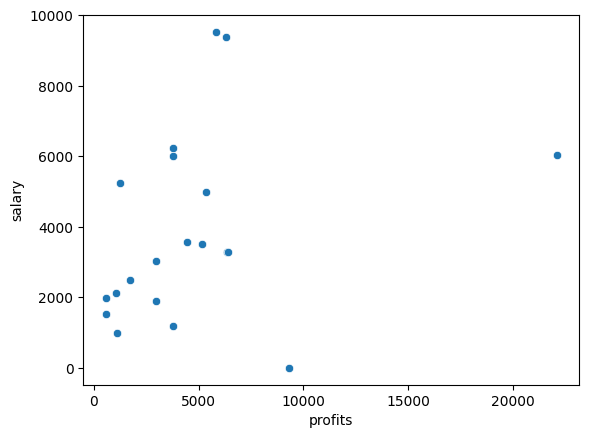

In [426]:
sns.scatterplot(x='profits', y='salary', data=salary)

In [427]:
salary.loc[:, ['profits', 'salary']].corr()

profits    salary
profits  1.000000  0.301959
salary   0.301959  1.000000

In [428]:
### Simple Model fit
model = ols(formula="salary ~ profits", data=salary)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     1.806
Date:                Sun, 13 Aug 2023   Prob (F-statistic):              0.196
Time:                        20:14:15   Log-Likelihood:                -184.30
No. Observations:                  20   AIC:                             372.6
Df Residuals:                      18   BIC:                             374.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3024.1107    822.629      3.676      0.002    1295.832    4752.390
profits        0.1675      0.125      1.344      0.196      -0.094       0.429
==============================================================================
Omnibus:                        3.644   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.162   Jarque-Bera (JB):                2.071
Skew:                           0.770   Prob(JB):                        0.355
Kurtosis:                       3.334   Cond. No.                     9.48e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [429]:
### Multiple Model fit
model = ols(formula="salary ~ age + sales", data=salary)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                 -0.088
Method:                 Least Squares   F-statistic:                    0.2316
Date:                Sun, 13 Aug 2023   Prob (F-statistic):              0.796
Time:                        20:14:15   Log-Likelihood:                -184.99
No. Observations:                  20   AIC:                             376.0
Df Residuals:                      17   BIC:                             379.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1012.7782   8955.327     -0.113      0.911   -1.99e+04    1.79e+04
age           70.4102    144.228      0.488      0.632    -233.885     374.705
sales          0.0087      0.016      0.556      0.585      -0.024       0.042
==============================================================================
Omnibus:                        3.919   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.141   Jarque-Bera (JB):                2.458
Skew:                           0.853   Prob(JB):                        0.293
Kurtosis:                       3.191   Cond. No.                     1.16e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [430]:
### Multiple Model fit
model = ols(formula="salary ~ profits + age + sales + tenure + assets", data=salary)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                 -0.164
Method:                 Least Squares   F-statistic:                    0.4658
Date:                Sun, 13 Aug 2023   Prob (F-statistic):              0.795
Time:                        20:14:15   Log-Likelihood:                -183.72
No. Observations:                  20   AIC:                             379.4
Df Residuals:                      14   BIC:                             385.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    629.5358   2.13e+04      0.030      0.977    -4.5e+04    4.62e+04
profits        0.2069      0.199      1.040      0.316      -0.220       0.633
age           38.8728    361.115      0.108      0.916    -735.641     813.387
sales         -0.0063      0.020     -0.324      0.751      -0.048       0.036
tenure        48.8144    189.934      0.257      0.801    -358.553     456.182
assets        -0.0002      0.001     -0.212      0.835      -0.002       0.002
==============================================================================
Omnibus:                        4.237   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.120   Jarque-Bera (JB):                2.144
Skew:                           0.641   Prob(JB):                        0.342
Kurtosis:                       3.965   Cond. No.                     2.89e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.89e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [431]:
y, x = dmatrices("salary ~ profits + age + sales + tenure + assets", data=salary, return_type="dataframe")

In [432]:
### Backward selection
backward_model(x, y).summary()

Criteria, Before selection: 377.43326978089874
Processed  5 models on 4 predictors in 0.002599000930786133
Selected predictors: ['assets', 'profits', 'sales', 'tenure', 'Intercept'] Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x2cf5729a0>
backward
Criteria:  377.4485646428145
Total elapsed time: 0.0044591426849365234 seconds.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 salary   R-squared (uncentered):                   0.735
Model:                            OLS   Adj. R-squared (uncentered):              0.647
Method:                 Least Squares   F-statistic:                              8.341
Date:                Sun, 13 Aug 2023   Prob (F-statistic):                    0.000609
Time:                        20:14:15   Log-Likelihood:                         -183.72
No. Observations:                  20   AIC:                                      377.4
Df Residuals:                      15   BIC:                                      382.4
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age           49.5384     24.511      2.021      0.061      -2.706     101.783
assets        -0.0002      0.001     -0.232      0.820      -0.002       0.001
profits        0.2101      0.162      1.300      0.213      -0.134       0.554
sales         -0.0063      0.019     -0.334      0.743      -0.046       0.034
tenure        43.8730     87.604      0.501      0.624    -142.850     230.597
==============================================================================
Omnibus:                        4.436   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.109   Jarque-Bera (JB):                2.291
Skew:                           0.659   Prob(JB):                        0.318
Kurtosis:                       4.006   Cond. No.                     1.25e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [433]:
### Forward selection
forward_model(x, y).summary()

Criteria, Before selection: 372.5100000708426
Processed  5 models on 1 predictors in
Selected predictors: ['profits', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x2cf6e31c0>
forward
Criteria:  372.59784786557896
Total elapsed time: 0.003821134567260742 seconds.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 13 Aug 2023   Prob (F-statistic):                nan
Time:                        20:14:15   Log-Likelihood:                -185.26
No. Observations:                  20   AIC:                             372.5
Df Residuals:                      19   BIC:                             373.5
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3817.3500    584.988      6.526      0.000    2592.955    5041.745
==============================================================================
Omnibus:                        3.238   Durbin-Watson:                   1.719
Prob(Omnibus):                  0.198   Jarque-Bera (JB):                2.186
Skew:                           0.809   Prob(JB):                        0.335
Kurtosis:                       2.945   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [434]:
### Stepwise selection
stepwise_model(x, y).summary()

Criteria, Before selection: 372.5100000708426
Processed  5 models on 1 predictors in
Selected predictors: ['profits', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x2cf65e820>
forward
Processed  1 models on 0 predictors in 0.0005030632019042969
Selected predictors: ['Intercept'] Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x2cf5db8e0>
backward
Criteria:  372.5100000708426
Processed  5 models on 1 predictors in
Selected predictors: ['profits', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x2cf6c6550>
forward
Processed  1 models on 0 predictors in 0.0004627704620361328
Selected predictors: ['Intercept'] Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x2cf600eb0>
backward
Criteria:  372.5100000708426
Processed  5 models on 1 predictors in
Selected predictors: ['profits', 'Intercept']  Criteria:  <statsmodels.regr

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 13 Aug 2023   Prob (F-statistic):                nan
Time:                        20:14:15   Log-Likelihood:                -185.26
No. Observations:                  20   AIC:                             372.5
Df Residuals:                      19   BIC:                             373.5
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3817.3500    584.988      6.526      0.000    2592.955    5041.745
==============================================================================
Omnibus:                        3.238   Durbin-Watson:                   1.719
Prob(Omnibus):                  0.198   Jarque-Bera (JB):                2.186
Skew:                           0.809   Prob(JB):                        0.335
Kurtosis:                       2.945   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [435]:
### Cars data
# 데이터 불러오기
cars = pd.read_csv('./ADP_book_ver01/data/Cars93.csv')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     int64  
 7   MPG.highway         93 non-null     int64  
 8   AirBags             59 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     object 
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     int64  
 13  RPM                 93 non-null     int64  
 14  Rev.per.mile        93 non-null     int64  
 15  Man.trans.avail     93 non-null     object 
 16  Fuel.tank.

In [436]:
# ols 모델의 formula을 정의할 때, 일부 특수문자는 쓸 수 없기에, 컬럼 특수문자 제거 
cars.columns = cars.columns.str.replace(".","")

In [437]:
model = ols(formula="Price ~ EngineSize + RPM + Weight + Length + MPGcity + MPGhighway", data=cars)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     19.14
Date:                Sun, 13 Aug 2023   Prob (F-statistic):           4.88e-14
Time:                        20:14:15   Log-Likelihood:                -302.94
No. Observations:                  93   AIC:                             619.9
Df Residuals:                      86   BIC:                             637.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -32.2157     17.812     -1.809      0.074     -67.625       3.193
EngineSize     4.4732      1.410      3.172      0.002       1.670       7.276
RPM            0.0071      0.001      5.138      0.000       0.004       0.010
Weight         0.0056      0.003      1.634      0.106      -0.001       0.012
Length        -0.0464      0.094     -0.496      0.621      -0.232       0.139
MPGcity       -0.3478      0.448     -0.776      0.440      -1.239       0.544
MPGhighway     0.0582      0.460      0.126      0.900      -0.856       0.973
==============================================================================
Omnibus:                       62.984   Durbin-Watson:                   1.446
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              383.289
Skew:                           2.074   Prob(JB):                     5.89e-84
Kurtosis:                      12.039   Cond. No.                     1.61e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [438]:
### correlation 확인
cars[['EngineSize', 'RPM', 'Weight', 'Length', 'MPGcity', 'MPGhighway']].corr()

EngineSize       RPM    Weight    Length   MPGcity  MPGhighway
EngineSize    1.000000 -0.547898  0.845075  0.780283 -0.710003   -0.626795
RPM          -0.547898  1.000000 -0.427931 -0.441249  0.363045    0.313469
Weight        0.845075 -0.427931  1.000000  0.806274 -0.843139   -0.810658
Length        0.780283 -0.441249  0.806274  1.000000 -0.666239   -0.542897
MPGcity      -0.710003  0.363045 -0.843139 -0.666239  1.000000    0.943936
MPGhighway   -0.626795  0.313469 -0.810658 -0.542897  0.943936    1.000000

In [439]:
### VIF 계산
y, x = dmatrices("Price ~ EngineSize + RPM + Weight + Length + MPGcity + MPGhighway", data=cars, return_type="dataframe")

# 독립변수끼리의 VIF값을 계산하여 데이터프레임으로 만드는 과정 
vif_list = []
for i in range(1, len(x.columns)): 
    vif_list.append([variance_inflation_factor(x.values, i), x.columns[i]])
pd.DataFrame(vif_list, columns=['vif', 'variable'])

vif    variable
0   4.605118  EngineSize
1   1.446859         RPM
2   8.685973      Weight
3   4.013002      Length
4  13.668288     MPGcity
5  12.943133  MPGhighway

In [440]:
### MPGcity 변수 제거
model = ols(formula="Price ~ EngineSize + RPM + Weight + MPGhighway", data=cars)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     28.98
Date:                Sun, 13 Aug 2023   Prob (F-statistic):           2.26e-15
Time:                        20:14:16   Log-Likelihood:                -303.29
No. Observations:                  93   AIC:                             616.6
Df Residuals:                      88   BIC:                             629.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -37.7063     14.846     -2.540      0.013     -67.210      -8.203
EngineSize     4.5884      1.343      3.418      0.001       1.920       7.256
RPM            0.0071      0.001      5.232      0.000       0.004       0.010
Weight         0.0049      0.003      1.690      0.095      -0.001       0.011
MPGhighway    -0.2646      0.221     -1.200      0.234      -0.703       0.174
==============================================================================
Omnibus:                       62.072   Durbin-Watson:                   1.398
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              368.013
Skew:                           2.047   Prob(JB):                     1.22e-80
Kurtosis:                      11.843   Cond. No.                     1.35e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [441]:
y, x, vif_df = apply_vif(cars[['EngineSize', 'RPM', 'Weight', 'Length', 'MPGcity', 'MPGhighway', 'Price']], "Price")
vif_df

vif    variable
0  4.471987  EngineSize
1  3.456037      Length
2  3.281779  MPGhighway
3  1.445721         RPM
4  8.597026      Weight

다중공선성 변수(MPGcity) 제거 후 MPGhighway의 유의성이 올라갔음.

In [442]:
### Stepwise selection
stepwise_model(x=x, y=y).summary()

Criteria, Before selection: 686.7529864151061
Processed  5 models on 1 predictors in
Selected predictors: ['Weight', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x2cf72d820>
forward
Processed  1 models on 0 predictors in 0.0007379055023193359
Selected predictors: ['Intercept'] Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x2cf71ccd0>
Criteria:  638.2790669305498
Processed  4 models on 2 predictors in
Selected predictors: ['Weight', 'RPM', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x2cf73f970>
forward
Processed  2 models on 1 predictors in 0.0008330345153808594
Selected predictors: ['Weight', 'Intercept'] Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x2cf7241c0>
Criteria:  624.5241529342444
Processed  3 models on 3 predictors in
Selected predictors: ['Weight', 'RPM', 'EngineSize', 'Intercept']  Criteria:  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     37.98
Date:                Sun, 13 Aug 2023   Prob (F-statistic):           6.75e-16
Time:                        20:14:16   Log-Likelihood:                -304.05
No. Observations:                  93   AIC:                             616.1
Df Residuals:                      89   BIC:                             626.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Weight         0.0073      0.002      3.372      0.001       0.003       0.012
RPM            0.0071      0.001      5.208      0.000       0.004       0.010
EngineSize     4.3054      1.325      3.249      0.002       1.673       6.938
Intercept    -51.7933      9.106     -5.688      0.000     -69.887     -33.699
==============================================================================
Omnibus:                       62.441   Durbin-Watson:                   1.406
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              361.880
Skew:                           2.076   Prob(JB):                     2.62e-79
Kurtosis:                      11.726   Cond. No.                     8.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [443]:
### Backward selection
backward_model(x=x, y=y).summary()

Criteria, Before selection: 621.0794757132377
Processed  5 models on 4 predictors in 0.0020148754119873047
Selected predictors: ['EngineSize', 'MPGhighway', 'RPM', 'Weight', 'Intercept'] Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x2cf764640>
backward
Criteria:  616.5890684898023
Processed  4 models on 3 predictors in 0.0011191368103027344
Selected predictors: ['EngineSize', 'RPM', 'Weight', 'Intercept'] Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x2cf7649a0>
backward
Criteria:  616.0976497740975
Processed  3 models on 2 predictors in 0.0008671283721923828
Selected predictors: ['RPM', 'Weight', 'Intercept'] Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x2cf764430>
backward
Criteria:  624.5241529342444
Total elapsed time: 0.00652313232421875 seconds.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     37.98
Date:                Sun, 13 Aug 2023   Prob (F-statistic):           6.75e-16
Time:                        20:14:16   Log-Likelihood:                -304.05
No. Observations:                  93   AIC:                             616.1
Df Residuals:                      89   BIC:                             626.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
EngineSize     4.3054      1.325      3.249      0.002       1.673       6.938
RPM            0.0071      0.001      5.208      0.000       0.004       0.010
Weight         0.0073      0.002      3.372      0.001       0.003       0.012
Intercept    -51.7933      9.106     -5.688      0.000     -69.887     -33.699
==============================================================================
Omnibus:                       62.441   Durbin-Watson:                   1.406
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              361.880
Skew:                           2.076   Prob(JB):                     2.62e-79
Kurtosis:                      11.726   Cond. No.                     8.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [444]:
### Forward selection
forward_model(x=x, y=y).summary()

Criteria, Before selection: 686.7529864151061
Processed  5 models on 1 predictors in
Selected predictors: ['Weight', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x2cf771e50>
forward
Criteria:  638.2790669305498
Processed  4 models on 2 predictors in
Selected predictors: ['Weight', 'RPM', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x2cf771940>
forward
Criteria:  624.5241529342444
Processed  3 models on 3 predictors in
Selected predictors: ['Weight', 'RPM', 'EngineSize', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x2cf7713a0>
forward
Criteria:  616.0976497740975
Processed  2 models on 4 predictors in
Selected predictors: ['Weight', 'RPM', 'EngineSize', 'MPGhighway', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x2cf771b50>
forward
Criteria:  616.5890684898023
Total elapsed time:

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     37.98
Date:                Sun, 13 Aug 2023   Prob (F-statistic):           6.75e-16
Time:                        20:14:16   Log-Likelihood:                -304.05
No. Observations:                  93   AIC:                             616.1
Df Residuals:                      89   BIC:                             626.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Weight         0.0073      0.002      3.372      0.001       0.003       0.012
RPM            0.0071      0.001      5.208      0.000       0.004       0.010
EngineSize     4.3054      1.325      3.249      0.002       1.673       6.938
Intercept    -51.7933      9.106     -5.688      0.000     -69.887     -33.699
==============================================================================
Omnibus:                       62.441   Durbin-Watson:                   1.406
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              361.880
Skew:                           2.076   Prob(JB):                     2.62e-79
Kurtosis:                      11.726   Cond. No.                     8.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

[결과해석]
- (1) 모델 설명 <br>
Stepwise selection을 통해 Weight, RPM, EngineSize가 포함된 다중 선형 회귀 모델을 채택하였다. 이 모델은  Adj.R-square 값이 0.547로 전체 데이터의 약 54.7%를 설명한다. <br>
설명력이 높은 모델은 아니므로 추가적인 변수를 찾아 데이터를 보완해야 할 필요성이 있다.
- (2) 회귀식  <br>
y = 0.0073Weight + 0.0071RPM + 4.3054EngineSize - 51.7933
- (3) 회귀계수 설명  <br>
모델의 성능이 좋지 않아 회귀계수의 값이 정확하다고 말할 수는 없지만, 회귀식에서 차량의 가격에 가장 큰 영향을 주는 변수는 EngineSize라고 할 수 있다. <br>
반면 Weight, RPM은 유의한 변수이지만, 회귀계수가 너무 작아 영향력이 거의 없다.

## Robust-linear Regression

### (1) Huber Regression
- Huber loss fuction 사용

In [445]:
boston = pd.read_csv('./data/housing.csv')

In [446]:
boston

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90   5.33  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[506 rows x 14 columns]

In [447]:
x = boston.drop('MEDV', axis=1)
y = boston['MEDV']

In [448]:
# The predictor variables should include a constant term.
x = sm.add_constant(x)

# Fit the robust regression model
robust_model = sm.RLM(y, x, M=sm.robust.norms.HuberT())
robust_results = robust_model.fit()
robust_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                   MEDV   No. Observations:                  506
Model:                            RLM   Df Residuals:                      492
Method:                          IRLS   Df Model:                           13
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 13 Aug 2023                                         
Time:                        20:14:16                                         
No. Iterations:                    30                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.9275      3.744      5.056      0.000      11.590      26.265
CRIM          -0.1058      0.024     -4.390      0.000      -0.153      -0.059
ZN             0.0352      0.010      3.496      0.000       0.015       0.055
INDUS      -3.553e-05      0.045     -0.001      0.999      -0.088       0.088
CHAS           1.6097      0.632      2.547      0.011       0.371       2.848
NOX          -10.3676      2.802     -3.700      0.000     -15.860      -4.876
RM             5.0559      0.307     16.491      0.000       4.455       5.657
AGE           -0.0234      0.010     -2.412      0.016      -0.042      -0.004
DIS           -1.1057      0.146     -7.557      0.000      -1.392      -0.819
RAD            0.1957      0.049      4.021      0.000       0.100       0.291
TAX           -0.0112      0.003     -4.058      0.000      -0.017      -0.006
PTRATIO       -0.7722      0.096     -8.046      0.000      -0.960      -0.584
B              0.0110      0.002      5.585      0.000       0.007       0.015
LSTAT         -0.3418      0.037     -9.187      0.000      -0.415      -0.269
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

### (2) Quantile Regression
- 선형 회귀 조건이 충족되지 않을 때 사용되는 선형 회귀의 확장 버전
- 이상치가 많아 이에 대한 영향을 줄인 선형 회귀선을 구할 수 있음
- 점 추정이 아닌 구간추정을 통해 결과의 정확도를 높일 수 있음

In [449]:
# Constructing Distance column
rows = 20
Distance = np.random.uniform(1, 10, rows)
 
# Constructing Emission column
Emission = 40 + Distance + np.random.normal(loc=0, scale=.25*Distance,size=20)
 
# Creating the data set
df = pd.DataFrame({'Distance': Distance,
                   'Emission': Emission})

In [450]:
qreg = smf.quantreg('Emission ~ Distance', df).fit(q=0.5)
qreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:               Emission   Pseudo R-squared:               0.5394
Model:                       QuantReg   Bandwidth:                       4.392
Method:                 Least Squares   Sparsity:                        7.129
Date:                Sun, 13 Aug 2023   No. Observations:                   20
Time:                        20:14:16   Df Residuals:                       18
                                        Df Model:                            1
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.1763      1.887     20.757      0.000      35.211      43.142
Distance       1.3499      0.306      4.409      0.000       0.707       1.993
==============================================================================
"""

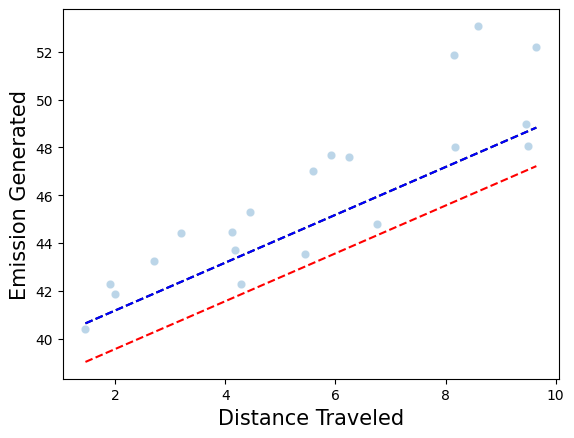

In [451]:
color_dict = {0.1: 'red', 0.5: 'black', 0.9: 'blue'}
for quantile in [0.1, 0.5, 0.9]:
    quantile_reg = smf.quantreg('Emission ~ Distance', df).fit(q = quantile)

    # get y values
    y_line = lambda a, b: a + Distance
    y = y_line(quantile_reg.params['Intercept'], quantile_reg.params['Distance'])
 
    # Plotting data points with the help
    # pf quantile regression equation
    sns.lineplot(x=Distance, y=y, color=color_dict[quantile], linestyle='dashed')

sns.scatterplot(x=Distance, y=Emission, alpha=.3)
plt.xlabel('Distance Traveled', fontsize=15)
plt.ylabel('Emission Generated', fontsize=15)
plt.show()

## Non-linear Regression

### (1) Polymonial Regression

In [452]:
df = pd.DataFrame({'x': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'y': [5, 3, 2, 3, 4, 6, 10, 12, 18]})
df

x   y
0  1   5
1  2   3
2  3   2
3  4   3
4  5   4
5  6   6
6  7  10
7  8  12
8  9  18

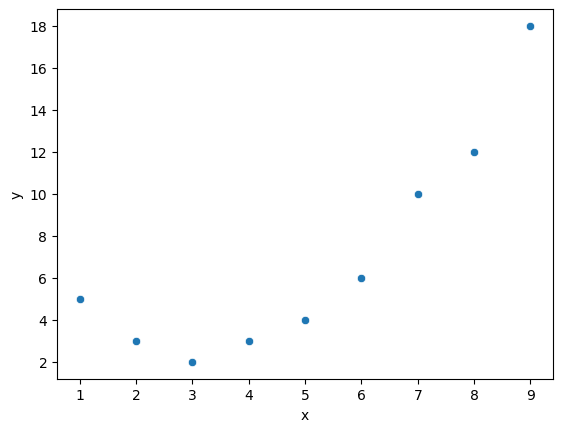

In [453]:
x = df['x']
y = df['y']

sns.scatterplot(x=x, y=y)
plt.show()

In [454]:
model = ols(formula="y ~ x", data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     16.99
Date:                Sun, 13 Aug 2023   Prob (F-statistic):            0.00445
Time:                        20:14:16   Log-Likelihood:                -21.732
No. Observations:                   9   AIC:                             47.46
Df Residuals:                       7   BIC:                             47.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1667      2.230     -0.523      0.617      -6.439       4.106
x              1.6333      0.396      4.122      0.004       0.696       2.570
==============================================================================
Omnibus:                        1.451   Durbin-Watson:                   0.696
Prob(Omnibus):                  0.484   Jarque-Bera (JB):                1.008
Skew:                           0.668   Prob(JB):                        0.604
Kurtosis:                       2.051   Cond. No.                         12.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

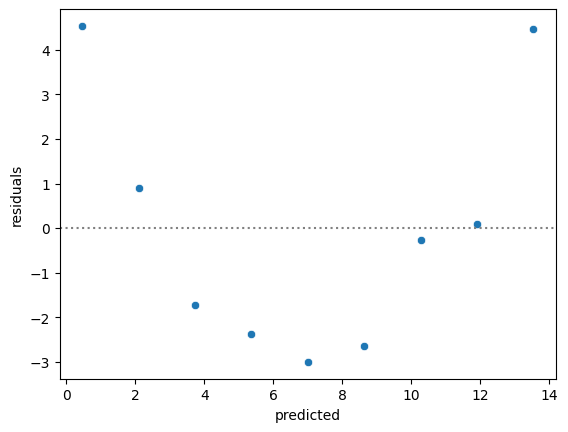

In [455]:
### Manual residual plot
# create a DataFrame of predicted values and residuals
plot_df = pd.DataFrame()
plot_df["predicted"] = result.predict(x)
plot_df["residuals"] = result.resid

sns.scatterplot(data=plot_df, x="predicted", y="residuals") # 2차식이 필요해 보인다.
plt.axhline(y=0, color='gray', linestyle='dotted')

<Axes: xlabel='x'>

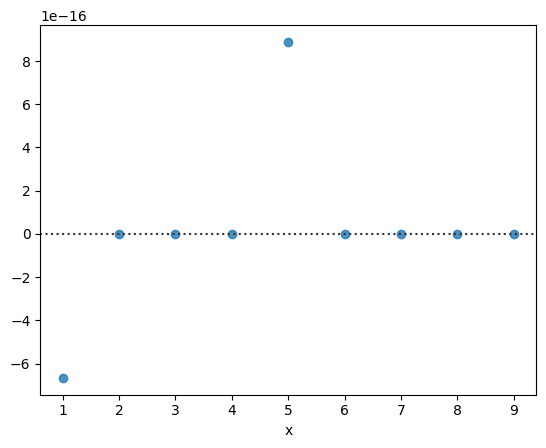

In [456]:
### x값에 따른 residuals
sns.residplot(x=x, y=result.predict(x), data=df)

In [457]:
x_sq = x**2
df['x_sq'] = x_sq

In [458]:
model = ols(formula="y ~ x + x_sq", data=df)
result = model.fit()

y_pred = result.predict(x)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     292.2
Date:                Sun, 13 Aug 2023   Prob (F-statistic):           1.05e-06
Time:                        20:14:16   Log-Likelihood:                -6.6251
No. Observations:                   9   AIC:                             19.25
Df Residuals:                       6   BIC:                             19.84
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.1667      0.787      9.103      0.000       5.240       9.093
x             -2.9121      0.361     -8.056      0.000      -3.797      -2.028
x_sq           0.4545      0.035     12.893      0.000       0.368       0.541
==============================================================================
Omnibus:                        0.843   Durbin-Watson:                   3.026
Prob(Omnibus):                  0.656   Jarque-Bera (JB):                0.023
Skew:                          -0.122   Prob(JB):                        0.989
Kurtosis:                       2.962   Cond. No.                         173.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

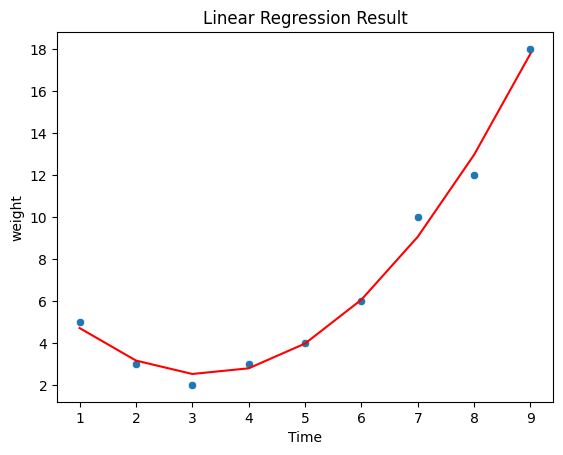

In [459]:
sns.scatterplot(x=x, y=y)
plt.plot(x, y_pred, color='red') ## 회귀직선 추가 
plt.xlabel('Time', fontsize=10)
plt.ylabel('weight',fontsize=10)
plt.title('Linear Regression Result')
plt.show()

<Axes: xlabel='x', ylabel='y'>

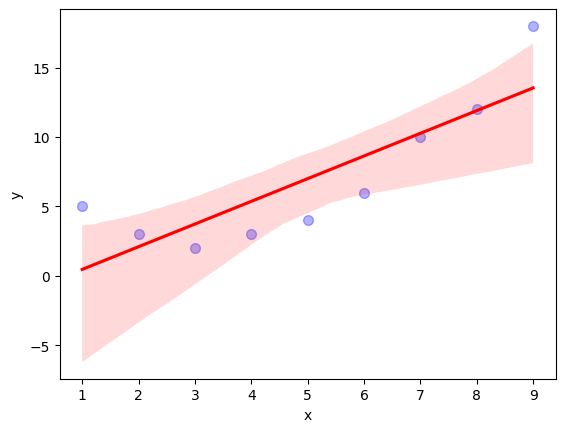

In [460]:
sns.regplot(x=x, y=y, scatter_kws={"fc":"b", "ec":"b", "s":50, "alpha":0.3}, color="r") # regplot으로 한줄 실행

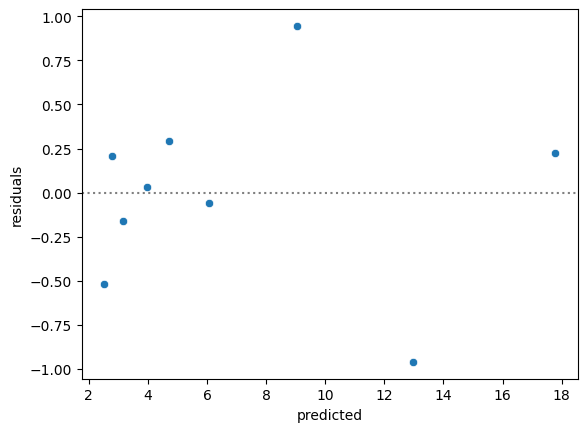

In [461]:
### Manual residual plot
# create a DataFrame of predicted values and residuals
plot_df = pd.DataFrame()
plot_df["predicted"] = result.predict(x)
plot_df["residuals"] = result.resid

sns.scatterplot(data=plot_df, x="predicted", y="residuals")
plt.axhline(y=0, color='gray', linestyle='dotted')

In [462]:
### house data before
# 2차항 추가
model_poly = smf.ols(formula='AdjSalePrice ~ SqFtTotLiving + np.power(SqFtTotLiving, 2) + ' + 
                'SqFtLot + Bathrooms + Bedrooms + BldgGrade', data=house_98105)
result_poly = model_poly.fit()
result_poly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     211.6
Date:                Sun, 13 Aug 2023   Prob (F-statistic):          9.95e-106
Time:                        20:14:17   Log-Likelihood:                -4217.9
No. Observations:                 313   AIC:                             8450.
Df Residuals:                     306   BIC:                             8476.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                  -6.159e+05   1.03e+05     -5.953      0.000   -8.19e+05   -4.12e+05
SqFtTotLiving                  7.4521     55.418      0.134      0.893    -101.597     116.501
np.power(SqFtTotLiving, 2)     0.0388      0.010      4.040      0.000       0.020       0.058
SqFtLot                       32.5594      5.436      5.990      0.000      21.863      43.256
Bathrooms                  -1435.1231   1.95e+04     -0.074      0.941   -3.99e+04     3.7e+04
Bedrooms                   -9191.9441   1.33e+04     -0.693      0.489   -3.53e+04    1.69e+04
BldgGrade                   1.357e+05   1.49e+04      9.087      0.000    1.06e+05    1.65e+05
==============================================================================
Omnibus:                       75.161   Durbin-Watson:                   1.625
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              637.978
Skew:                           0.699   Prob(JB):                    2.92e-139
Kurtosis:                       9.853   Cond. No.                     7.37e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.37e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

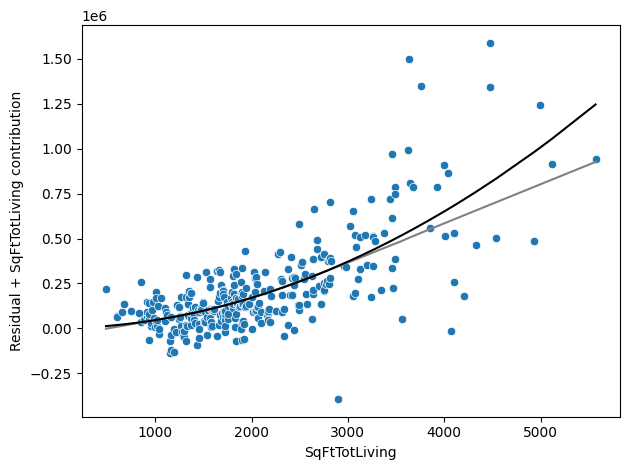

0.03879128168230191


In [463]:
def partialResidualPlot(model, df, outcome, feature):
    y_pred = model.predict(df)
    copy_df = df.copy()
    for c in copy_df.columns:
        if c == feature:
            continue
        copy_df[c] = 0.0
    feature_prediction = model.predict(copy_df)
    results = pd.DataFrame({
        'feature': df[feature],
        'residual': df[outcome] - y_pred,
        'ypartial': feature_prediction - model.params[0],
    })
    results = results.sort_values(by=['feature'])
    smoothed = sm.nonparametric.lowess(results.ypartial, results.feature, frac=1/3)
    
    sns.scatterplot(x=results.feature, y = results.ypartial + results.residual)
    sns.lineplot(x=smoothed[:, 0], y=smoothed[:, 1], color='gray') # spline line
    sns.lineplot(x=results.feature, y=results.ypartial, color='black')
    plt.xlabel(feature)
    plt.ylabel(f'Residual + {feature} contribution')

partialResidualPlot(result_poly, house_98105, 'AdjSalePrice', 'SqFtTotLiving')

plt.tight_layout()
plt.show()
print(result_poly.params[2])

### (2) Spline Regression

In [464]:
### house data - continued
formula = ('AdjSalePrice ~ bs(SqFtTotLiving, df=6, degree=3) + ' + # b-spline addec
           'SqFtLot + Bathrooms + Bedrooms + BldgGrade')
model_spline = smf.ols(formula=formula, data=house_98105)
result_spline = model_spline.fit()
result_spline.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     131.8
Date:                Sun, 13 Aug 2023   Prob (F-statistic):          7.10e-104
Time:                        20:14:18   Log-Likelihood:                -4211.4
No. Observations:                 313   AIC:                             8445.
Df Residuals:                     302   BIC:                             8486.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                            -4.142e+05   1.43e+05     -2.899      0.004   -6.95e+05   -1.33e+05
bs(SqFtTotLiving, df=6, degree=3)[0] -1.995e+05   1.86e+05     -1.076      0.283   -5.65e+05    1.66e+05
bs(SqFtTotLiving, df=6, degree=3)[1] -1.206e+05   1.23e+05     -0.983      0.326   -3.62e+05    1.21e+05
bs(SqFtTotLiving, df=6, degree=3)[2] -7.164e+04   1.36e+05     -0.525      0.600    -3.4e+05    1.97e+05
bs(SqFtTotLiving, df=6, degree=3)[3]  1.957e+05   1.62e+05      1.212      0.227   -1.22e+05    5.14e+05
bs(SqFtTotLiving, df=6, degree=3)[4]  8.452e+05   2.18e+05      3.878      0.000    4.16e+05    1.27e+06
bs(SqFtTotLiving, df=6, degree=3)[5]  6.955e+05   2.14e+05      3.255      0.001    2.75e+05    1.12e+06
SqFtLot                                 33.3258      5.454      6.110      0.000      22.592      44.059
Bathrooms                            -4778.2080   1.94e+04     -0.246      0.806    -4.3e+04    3.34e+04
Bedrooms                             -5778.7045   1.32e+04     -0.437      0.663   -3.18e+04    2.03e+04
BldgGrade                             1.345e+05   1.52e+04      8.842      0.000    1.05e+05    1.64e+05
==============================================================================
Omnibus:                       58.816   Durbin-Watson:                   1.633
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              622.021
Skew:                           0.330   Prob(JB):                    8.51e-136
Kurtosis:                       9.874   Cond. No.                     1.97e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

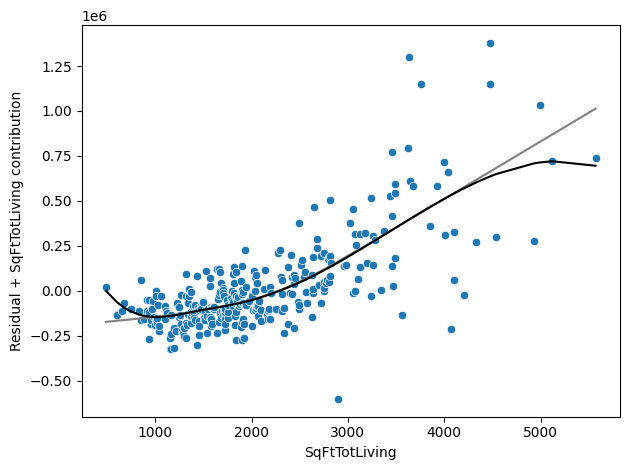

In [465]:
partialResidualPlot(result_spline, house_98105, 'AdjSalePrice', 'SqFtTotLiving')
plt.tight_layout()
plt.show()

In [466]:
from statsmodels.gam.api import GLMGam, BSplines

In [467]:
### Generalized Additive Models
# Spline 회귀를 찾는 데 사용가능
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

x_spline = house_98105[predictors]
bs = BSplines(x_spline, df=[10] + [3] * 4, degree=[3] + [2] * 4)

# penalization weight
alpha = np.array([0] * 5)

formula = ('AdjSalePrice ~ SqFtTotLiving + ' + 
           'SqFtLot + Bathrooms + Bedrooms + BldgGrade')

gam_sm = GLMGam.from_formula(formula, data=house_98105, smoother=bs, alpha=alpha)
res_sm = gam_sm.fit()
print(res_sm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           AdjSalePrice   No. Observations:                  313
Model:                         GLMGam   Df Residuals:                   295.00
Model Family:                Gaussian   Df Model:                        17.00
Link Function:               Identity   Scale:                      2.7471e+10
Method:                         PIRLS   Log-Likelihood:                -4196.6
Date:                Sun, 13 Aug 2023   Deviance:                   8.1039e+12
Time:                        20:14:19   Pearson chi2:                 8.10e+12
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9901
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -3.481e+05   1.18e+05  

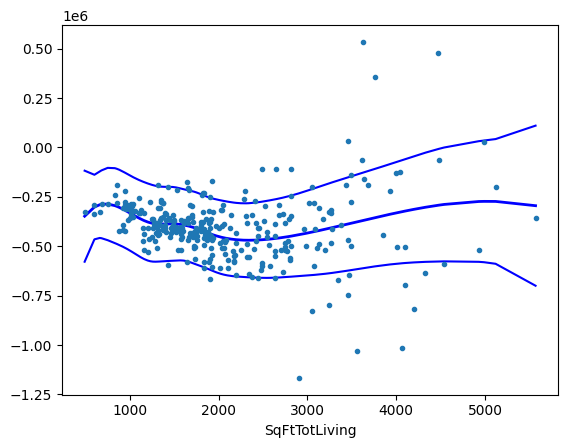

In [468]:
res_sm.plot_partial(0, cpr=True);

### (3) Logistic Regression
- Statistics version

In [469]:
test_result = pd.read_csv("./stats_for_python/6-3-1-logistic-regression.csv")
test_result.head(3)

hours  result
0      0       0
1      0       0
2      0       0

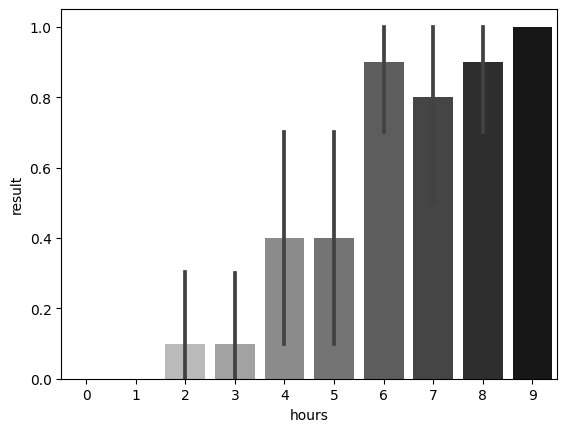

In [470]:
# 공부시간 별 시험 합격률
sns.barplot(x="hours", y="result", data=test_result, palette='gray_r')
plt.show()

In [471]:
# 공부 시간 당 합격률
test_result.groupby("hours").mean()

result
hours        
0         0.0
1         0.0
2         0.1
3         0.1
4         0.4
5         0.4
6         0.9
7         0.8
8         0.9
9         1.0

In [472]:
# Modeling
mod_glm = smf.glm(formula = "result ~ hours", data = test_result, family=sm.families.Binomial()).fit()
mod_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 result   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -34.014
Date:                Sun, 13 Aug 2023   Deviance:                       68.028
Time:                        20:14:19   Pearson chi2:                     84.9
No. Iterations:                     6   Pseudo R-squ. (CS):             0.5032
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5587      0.901     -5.061      0.000      -6.324      -2.793
hours          0.9289      0.174      5.345      0.000       0.588       1.270
==============================================================================
"""

In [473]:
### Null과 AIC 비교
# Null Model
mod_glm_null = smf.glm("result ~ 1", data = test_result, family=sm.families.Binomial()).fit()
print("Null 모델:", mod_glm_null.aic.round(3))
print("변수가 있는 모델:", mod_glm.aic.round(3))

Null 모델: 139.989
변수가 있는 모델: 72.028


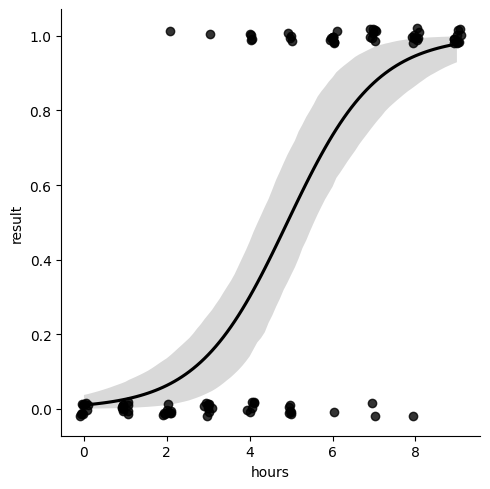

In [474]:
# lmplot 회귀 곡선
sns.lmplot(x="hours", y="result",
           data=test_result, 
           logistic=True,
           scatter_kws={"color": "black"},
           line_kws={"color": "black"},
           x_jitter=0.1, y_jitter=0.02)

In [475]:
exp_val = pd.DataFrame({
    "hours": np.arange(0, 10, 1)
})

# 합격 확률 예측
pred = mod_glm.predict(exp_val)
pred

0    0.010367
1    0.025836
2    0.062920
3    0.145291
4    0.300876
5    0.521427
6    0.733929
7    0.874741
8    0.946467
9    0.978147
dtype: float64

In [476]:
### Odds ratio 계산
# 공부시간 1시간일 때의 합격률
exp_val_1 = pd.DataFrame({"hours": [1]})
pred_1 = mod_glm.predict(exp_val_1)

# 공부시간 2시간일 때의 합격률
exp_val_2 = pd.DataFrame({"hours": [2]})
pred_2 = mod_glm.predict(exp_val_2)

# Odds
odds_1 = pred_1 / (1 - pred_1)
odds_2 = pred_2 / (1 - pred_2)

# Log Odds ratio -> Parameter
np.log(odds_2 / odds_1)

0    0.92889
dtype: float64

In [477]:
mod_glm.params["hours"]

0.9288901756284967

In [478]:
# Pearson Residual
mod_glm.resid_pearson.head(3)

0   -0.102351
1   -0.102351
2   -0.102351
dtype: float64

In [479]:
# Pearson chi-square statistic
mod_glm.pearson_chi2

84.91138782569999

In [480]:
np.sum(mod_glm.resid_pearson**2)

84.91138782569999

In [481]:
# Deviance Residual
mod_glm.resid_deviance.head(3)

0   -0.144369
1   -0.144369
2   -0.144369
dtype: float64

In [482]:
# Deviance statistic
np.sum(mod_glm.resid_deviance ** 2)

68.02788118117269

In [483]:
from sklearn.datasets import load_iris

In [484]:
### Iris data
iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0: 'Setosa', 1: 'Versicolour', 2: 'Virginica'})

In [485]:
iris

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

         Class  
0       Setosa  
1       Setosa  
2       Setosa  
3       Setosa  
4       Setosa  
..         ...  
145  Virginica  
146  Virginica  
147  Virginica  
148  Virginica  
149  Virginica  

[150 rows x 5 columns]

In [486]:
# Binary class & 숫자 label로 변경 -> ROC, AUC를 구해보기 위함
iris = iris[iris.Class != 'Setosa']
iris['Class'] = np.where(iris.Class=='Virginica', 1, 0) 

In [487]:
### sepal length 별 Class 확률
iris.groupby('sepal length (cm)')['Class'].mean()

sepal length (cm)
4.9    0.500000
5.0    0.000000
5.1    0.000000
5.2    0.000000
5.4    0.000000
5.5    0.000000
5.6    0.166667
5.7    0.166667
5.8    0.500000
5.9    0.333333
6.0    0.333333
6.1    0.333333
6.2    0.500000
6.3    0.666667
6.4    0.714286
6.5    0.800000
6.6    0.000000
6.7    0.625000
6.8    0.666667
6.9    0.750000
7.0    0.000000
7.1    1.000000
7.2    1.000000
7.3    1.000000
7.4    1.000000
7.6    1.000000
7.7    1.000000
7.9    1.000000
Name: Class, dtype: float64

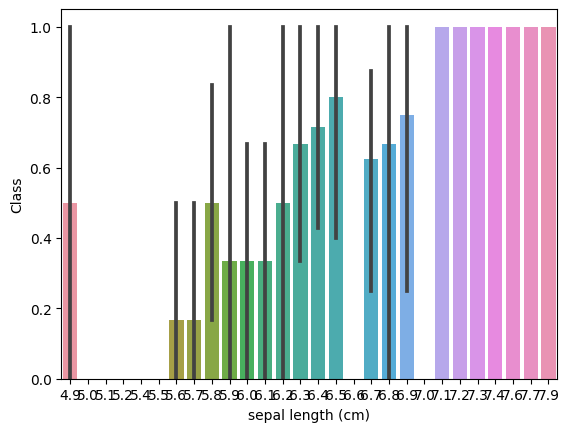

In [488]:
sns.barplot(x="sepal length (cm)", y="Class", data=iris)
plt.show()

In [489]:
iris['sepal_length'] = iris['sepal length (cm)'] # formula 에러 방지

In [490]:
model = smf.glm(formula="Class ~ sepal_length", data=iris, family=sm.families.Binomial())
results = model.fit()

print(results.summary()) # coef에 대해서는 wald test 결과를 보여줌

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Class   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -55.273
Date:                Sun, 13 Aug 2023   Deviance:                       110.55
Time:                        20:14:21   Pearson chi2:                     100.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.2448
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -12.5708      2.907     -4.325   

In [491]:
results.predict(iris['sepal_length'])

50     0.820495
51     0.577361
52     0.788918
53     0.182473
54     0.625566
         ...   
145    0.714191
146    0.527636
147    0.625566
148    0.477357
149    0.333030
Length: 100, dtype: float64

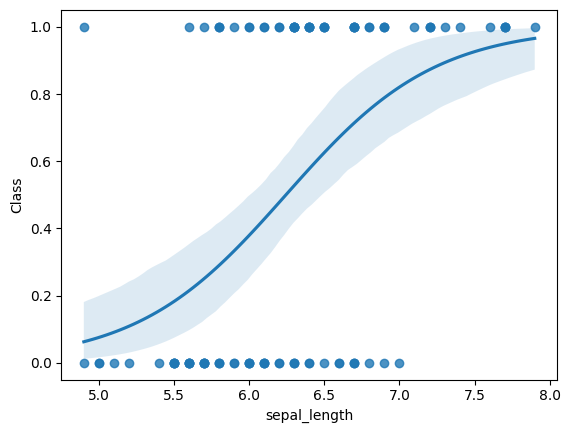

In [492]:
# plot logistic regression curve
sns.regplot(x='sepal_length', y='Class', data=iris, logistic=True, ci=95)
plt.show()

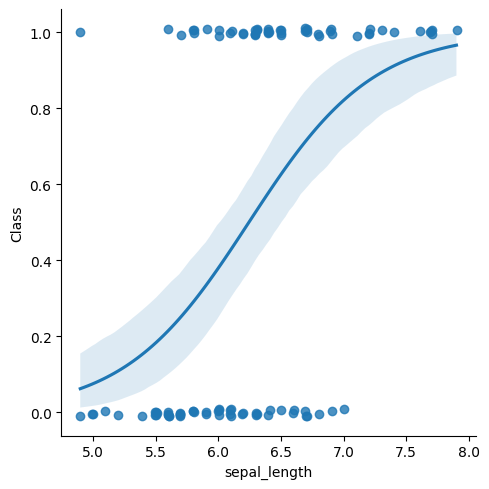

In [493]:
sns.lmplot(x='sepal_length', y='Class', data=iris, logistic=True, ci=95, x_jitter=0.01, y_jitter=0.01) # jitter: data를 흐트리는 옵션
plt.show()

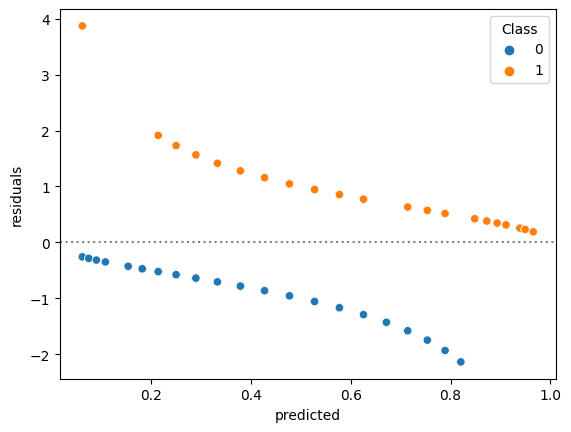

In [494]:
plot_df = pd.DataFrame()
plot_df["predicted"] = results.predict(iris['sepal_length'])
plot_df["residuals"] = results.resid_pearson

sns.scatterplot(data=plot_df, x="predicted", y="residuals", hue=iris['Class'])
plt.axhline(y=0, color='gray', linestyle='dotted')
plt.show()

In [495]:
# pearson chi-sq
print(results.pearson_chi2)
print(np.sum(results.resid_pearson**2))

100.14283284175464
100.14283284175464


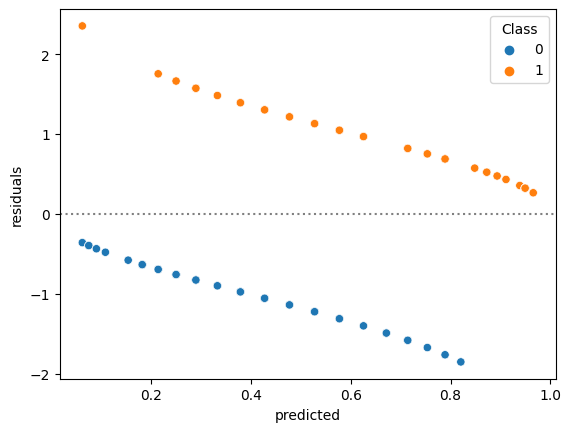

In [496]:
plot_df["residuals"] = results.resid_deviance

sns.scatterplot(data=plot_df, x="predicted", y="residuals", hue=iris['Class'])
plt.axhline(y=0, color='gray', linestyle='dotted')
plt.show()

In [497]:
# summary의 Deviance 값과 일치
# logistic에서는 cross-entropy 개념과 동일
np.sum(results.resid_deviance**2) 

110.54652398942653

In [498]:
### Multiple Logistic
mtcars.head()

mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
Mazda RX4          21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
Mazda RX4 Wag      21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
Datsun 710         22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
Hornet 4 Drive     21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

                   carb  mpg_sqrt  
Mazda RX4             4  4.582576  
Mazda RX4 Wag         4  4.582576  
Datsun 710            1  4.774935  
Hornet 4 Drive        1  4.626013  
Hornet Sportabout     2  4.324350

In [499]:
model = smf.glm(formula="vs ~ mpg + am", data=mtcars, family=sm.families.Binomial())
results = model.fit()

print(results.summary()) # coef에 대해서는 wald test 결과를 보여줌

                 Generalized Linear Model Regression Results                  
Dep. Variable:                     vs   No. Observations:                   32
Model:                            GLM   Df Residuals:                       29
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10.323
Date:                Sun, 13 Aug 2023   Deviance:                       20.646
Time:                        20:14:23   Pearson chi2:                     20.2
No. Iterations:                     6   Pseudo R-squ. (CS):             0.5159
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.7051      4.625     -2.747      0.0

In [500]:
results.aic

26.64629286928622

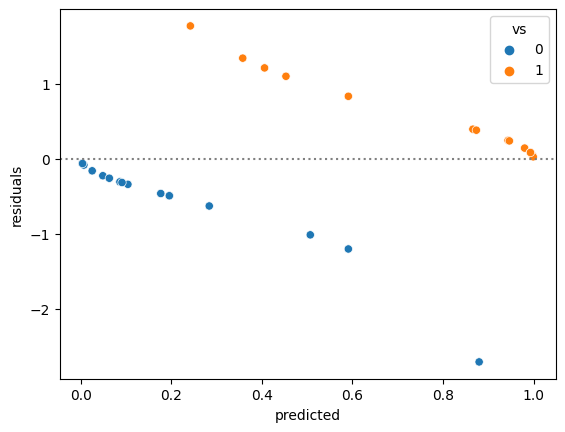

In [501]:
plot_df = pd.DataFrame()
plot_df["predicted"] = results.predict(mtcars.loc[:, ['mpg', 'am']])
plot_df["residuals"] = results.resid_pearson

sns.scatterplot(data=plot_df, x="predicted", y="residuals", hue=mtcars['vs'])
plt.axhline(y=0, color='gray', linestyle='dotted')
plt.show()

In [502]:
results.cov_params()

Intercept       mpg        am
Intercept  21.392589 -1.155050  4.406337
mpg        -1.155050  0.063693 -0.267584
am          4.406337 -0.267584  2.558336

### (4) Poisson Regression
- 연속형 변수가 카운트 변수에 미치는 영향 파악

In [503]:
# 맥주 판매 개수 예측
beer = pd.read_csv("./stats_for_python/6-5-1-poisson-regression.csv")
beer.head(3)

beer_number  temperature
0            6         17.5
1           11         26.6
2            2          5.0

In [504]:
# Modeling
mod_pois = smf.glm("beer_number ~ temperature", beer, family=sm.families.Poisson()).fit()
mod_pois.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            beer_number   No. Observations:                   30
Model:                            GLM   Df Residuals:                       28
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -57.672
Date:                Sun, 13 Aug 2023   Deviance:                       5.1373
Time:                        20:14:23   Pearson chi2:                     5.40
No. Iterations:                     4   Pseudo R-squ. (CS):             0.9708
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.4476      0.199      2.253      0.024       0.058       0.837
temperature     0.0761      0.008      9.784      0.000       0.061       0.091
===============================================================================
"""

In [505]:
### Null과 AIC 비교
# Null Model
mod_pois_null = smf.glm("beer_number ~ 1", data=beer, family=sm.families.Poisson()).fit()
print("Null 모델:", mod_pois_null.aic.round(3))
print("변수가 있는 모델:", mod_pois.aic.round(3))

Null 모델: 223.363
변수가 있는 모델: 119.343


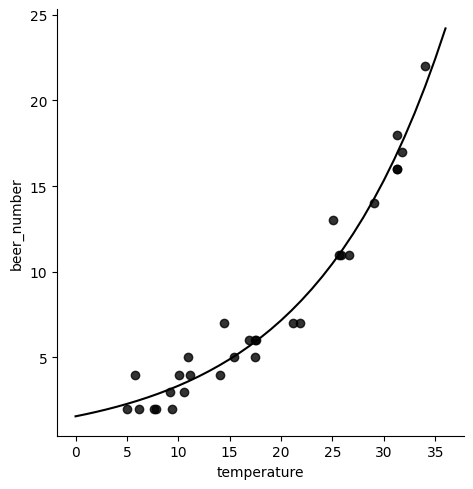

In [506]:
x_plot = np.arange(0, 37)
pred = mod_pois.predict(pd.DataFrame({"temperature": x_plot}))

sns.lmplot(y="beer_number", x="temperature", data=beer, fit_reg = False,
          scatter_kws = {"color":"black"})
sns.lineplot(x=x_plot, y=pred, color="black")
plt.show()

In [507]:
# 기온이 1도일 때 판매 개수 기댓값
exp_val_1 = pd.DataFrame({"temperature": [1]})
pred_1 = mod_pois.predict(exp_val_1)

# 기온이 2도일 때 판매 개수 기댓값
exp_val_2 = pd.DataFrame({"temperature": [2]})
pred_2 = mod_pois.predict(exp_val_2)

# 비율 확인
pred_2 / pred_1

0    1.079045
dtype: float64

In [508]:
np.exp(mod_pois.params["temperature"])

1.079045054586893

### (5) Bayesian Regression
- Likeilhood (관측값에서 모델이 가지는 가능도)를 최소화하는 회귀식 도출
- Automatic Relevance Determination Regression (ARD)

In [509]:
from sklearn.datasets import make_regression

In [510]:
x, y_data, coef = make_regression(n_samples=100, n_features=1, bias=0, noise=20, coef=True, random_state=1)
x = x.flatten()
coef

array(80.71051956)

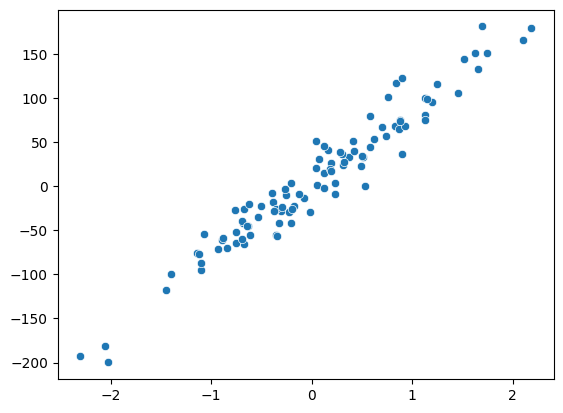

In [511]:
sns.scatterplot(x=x, y=y_data)
plt.show()

In [512]:
import pymc3 as pm

In [513]:
### Normal dist를 가정한 1차원 Regression
with pm.Model() as m:
    w = pm.Normal('w', mu=0, sd=50)
    b = pm.Normal('b', mu=0, sd=50)
    esd = pm.HalfCauchy('esd', 5)
    y = pm.Normal('y', mu=w * x + b, sd=esd, observed=y_data)

    start = pm.find_MAP()
    step = pm.NUTS()
    trace1 = pm.sample(10000, step=step, start=start)

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [esd, b, w]


/Users/hyunjoong/Library/Python/3.9/lib/python/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/hyunjoong/Library/Python/3.9/lib/python/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/hyunjoong/Library/Python/3.9/lib/python/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/hyunjoong/Library/Python/3.9/lib/python/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 8 seconds.


Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


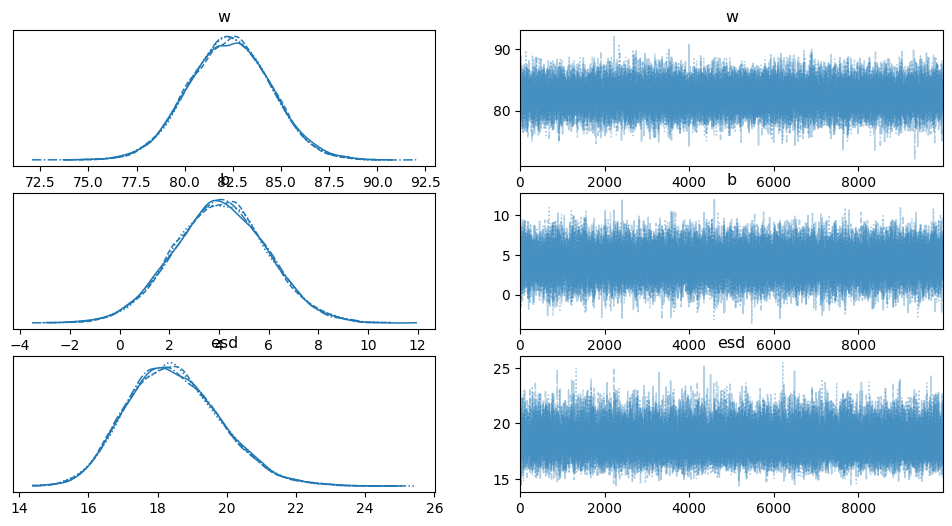

In [514]:
pm.traceplot(trace1)
plt.show()

In [515]:
pm.summary(trace1)

Got error No model on context stack. trying to find log_likelihood in translation.


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
w    82.335  2.117  78.469   86.374      0.010    0.007   47622.0   29681.0   
b     4.056  1.875   0.521    7.558      0.008    0.006   50647.0   29424.0   
esd  18.478  1.352  16.098   21.068      0.006    0.004   49204.0   28218.0   

     r_hat  
w      1.0  
b      1.0  
esd    1.0

In [516]:
data = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/26_problem7.csv")
data.head()

height  weight  waistline
0  174.396  72.102    79.3787
1  179.656  81.255    80.6649
2  175.079  76.207    80.3166
3  180.804  81.354    80.8794
4  177.448  78.768    80.3499

In [517]:
x = data[["height", "weight"]]
y = data["waistline"]

In [518]:
from sklearn.linear_model import ARDRegression

In [519]:
# 1000번의 burn-in 이후 10,000의 MCMC를 수행
# 회귀계수의 사전분포는 부적절한 균일분포(inproper uniform prior distribution),
# 오차항의 분산의 사전분포는 역감마 분포로 지정. 형상(Shape)모수와 척도(Scale)모수는 각각 0.005로 지정.
ard = ARDRegression(max_iter=1000, threshold_lambda=10000, alpha_2=0.005, lambda_2=0.005, fit_intercept=False) ## 부적절한 균일분포, inverse gamma를 0.005로 지정
ard.fit(x, y)

ARDRegression(alpha_2=0.005, fit_intercept=False, lambda_2=0.005, max_iter=1000,
              threshold_lambda=10000)

In [520]:
ard.coef_

array([ 0.54450434, -0.20484747])

In [521]:
ard.predict([[180, 85]])

array([80.59874677])

## Survival Analysis
- 관심 있는 사건이 발생할 때까지 예상되는 기간 조사
    - Event: 관심 경험 (생존/사망 또는 체류/사퇴)
    - Survival time: event가 발생할 때 까지의 기간
- Survival Function: T는 사건이 발생하고 t가 관측 중인 임의의 시점일 때 생존 S(t)는 T가 t보다 클 확률
- Censorship Problem(절단 문제): 관측 중단 관측치(Censored observations)는 사건이 일부 개인에 대해 기록되지 않은 경우 사건 발생 시간 데이터에서 발생함
    - 이벤트가 아직 발생하지 않은 경우(즉, 생존 시간을 알 수 없음/아직 사임하지 않은 사람의 경우 오해의 소지가 있음)
    - 데이터가 누락되거나(즉, 드롭아웃) contact 하는 포인트를 잃게 된 것 경우
- Censorship Problem Type
    - 좌측 관측 중단(Left-Censored): 생존 기간이 관찰된 기간보다 작음
    - 우측 관측 중단(Right-Censored): 생존 기간이 관찰된 기간보다 큼
    - 구간 관측 중단됨(Interval-Censored): 생존 기간을 정확히 정의할 수 없음
- Hazard Function
    - 위험 함수 또는 위험률 h(t)는 개인이 시간 t까지 생존하고 정확히 시간 t에 관심 있는 사건을 경험할 확률
    - 조위험함수는 조건부 확률로 정의되어 있다. 즉, 모든 개체에 대한 사건이 아니라 시간 t까지 살아있는 개체들에 대한 위험율
    - 위험함수는 아주 짧은 시간에 일아날 사건의 확률로서 순간적인(instantaneous)인 의미를 가지며, 아주 짧은 시간에 일어나는 극한의 의미임
    - 위험함수는 확률로서 정의되지만 발생률(rate)로 이해할 수 있음 분모는 확률이고 분자는 시간으로 표시되기 때문에 단위 시간당 일어나는 발생률로 이해할 수 있음

### (1) Kaplan-Meier Estimator
- 우측 관측 중단 관측치 처리
- 비모수적 방법으로 분포 가정이 필요하지 않음

In [522]:
df = pd.read_csv('./data/HR-Employee-Attrition.csv')
df[['YearsAtCompany', 'Attrition']].head()

YearsAtCompany Attrition
0               6       Yes
1              10        No
2               0       Yes
3               8        No
4               2        No

In [523]:
# !pip install lifelines
from sklearn.preprocessing import LabelEncoder
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

In [524]:
# Convert the Attrition into binary variable
encoder = LabelEncoder()
df['Attrition'] = encoder.fit_transform(df['Attrition'])

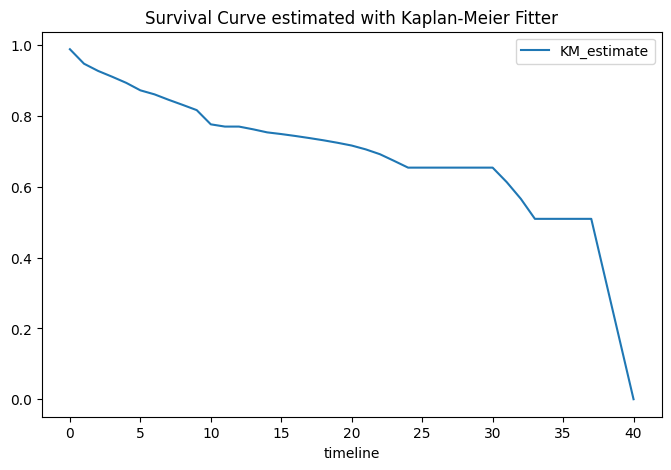

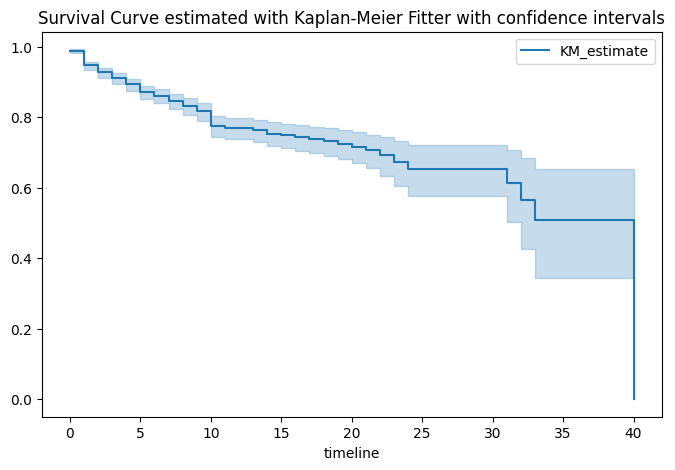

In [525]:


kmf = KaplanMeierFitter()
kmf.fit(durations=df['YearsAtCompany'], event_observed=df['Attrition'])

kmf.survival_function_.plot(figsize=(8,5))
plt.title('Survival Curve estimated with Kaplan-Meier Fitter')
plt.show()

kmf.plot_survival_function(figsize=(8,5))
plt.title('Survival Curve estimated with Kaplan-Meier Fitter with confidence intervals')
plt.show()

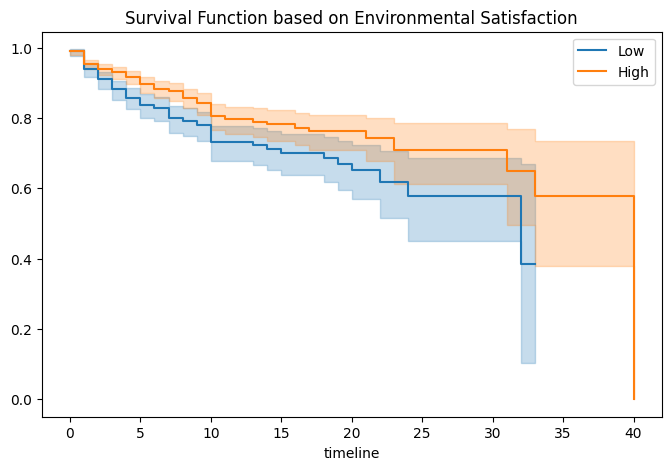

In [526]:
EnvironmentalLow = ((df['EnvironmentSatisfaction'] == 1) | (df['EnvironmentSatisfaction'] == 2))
EnvironmentalHigh = ((df['EnvironmentSatisfaction'] == 3) | (df['EnvironmentSatisfaction'] == 4))

ax = plt.subplot()
kmf = KaplanMeierFitter()

kmf.fit(durations=df[EnvironmentalLow]['YearsAtCompany'], 
        event_observed=df[EnvironmentalLow]['Attrition'], 
        label='Low')
kmf.plot_survival_function(figsize=(8,5), ax=ax)

kmf.fit(durations=df[EnvironmentalHigh]['YearsAtCompany'], 
        event_observed=df[EnvironmentalHigh]['Attrition'], 
        label='High')
kmf.plot_survival_function(figsize=(8,5), ax=ax)
plt.title('Survival Function based on Environmental Satisfaction')
plt.show();

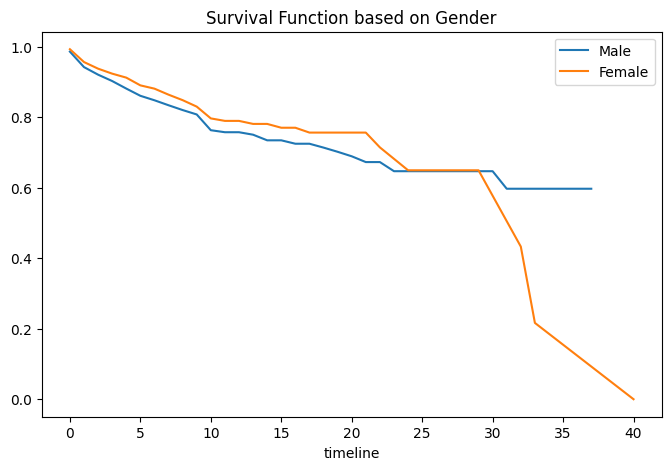

In [527]:
male = (df['Gender'] == 'Male')
female = (df['Gender'] == 'Female')

ax = plt.subplot()
kmf = KaplanMeierFitter()

kmf.fit(durations=df[male]['YearsAtCompany'], event_observed=df[male]['Attrition'], label='Male')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)
kmf.fit(durations=df[female]['YearsAtCompany'], event_observed=df[female]['Attrition'], label='Female')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)
plt.title('Survival Function based on Gender')
plt.show();

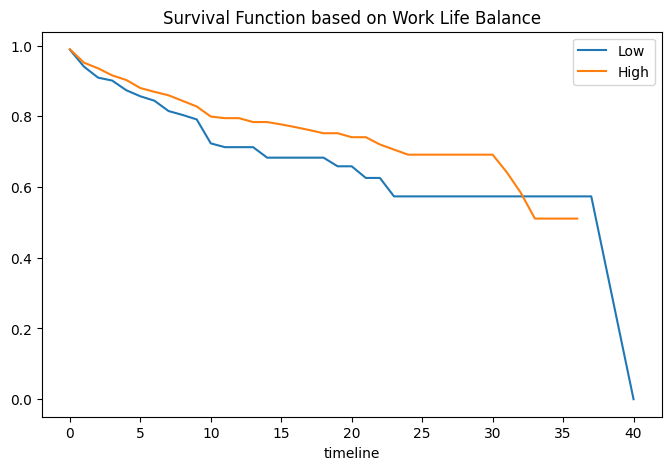

In [528]:
worklifelow = ((df['WorkLifeBalance'] == 1) | (df['WorkLifeBalance'] == 2))
worklifehigh = ((df['WorkLifeBalance'] == 3) | (df['WorkLifeBalance'] == 4))

ax = plt.subplot()
kmf = KaplanMeierFitter()

kmf.fit(durations=df[worklifelow]['YearsAtCompany'], 
        event_observed=df[worklifelow]['Attrition'], 
        label='Low')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)

kmf.fit(durations=df[worklifehigh]['YearsAtCompany'], 
        event_observed=df[worklifehigh]['Attrition'], 
        label='High')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)
plt.title('Survival Function based on Work Life Balance')
plt.show();

In [529]:
### Log rank test
output = logrank_test(durations_A = df[worklifelow]['YearsAtCompany'],
                      durations_B = df[worklifehigh]['YearsAtCompany'],
                      event_observed_A = df[worklifelow]['Attrition'],
                      event_observed_B = df[worklifehigh]['Attrition'])
output.print_summary

<bound method StatisticalResult.print_summary of <lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           4.40 0.04      4.80>

In [530]:
from itertools import combinations

BusinessTravel ['Travel_Rarely', 'Travel_Frequently', 'Non-Travel']
Department ['Sales', 'Research & Development', 'Human Resources']
EducationField ['Life Sciences', 'Other', 'Medical', 'Marketing', 'Technical Degree', 'Human Resources']
Gender ['Female', 'Male']
JobRole ['Sales Executive', 'Research Scientist', 'Laboratory Technician', 'Manufacturing Director', 'Healthcare Representative', 'Manager', 'Sales Representative', 'Research Director', 'Human Resources']
MaritalStatus ['Single', 'Married', 'Divorced']
Over18 ['Y']
OverTime ['Yes', 'No']


<Axes: xlabel='p_value', ylabel='Count'>

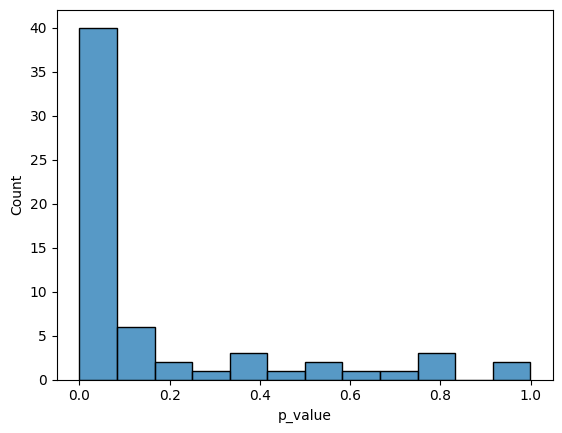

In [531]:
group_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
results = []
for col in group_cols :
    choices = list(df[col].unique())
    print(col,choices)
    candidates = list(combinations(choices, 2))
    for a_group, b_group in candidates :
        A_GROUP = df.query(f"{col}=='{a_group}'")
        B_GROUP = df.query(f"{col}=='{b_group}'")

        output = logrank_test(durations_A = A_GROUP['YearsAtCompany'],
                            durations_B = B_GROUP['YearsAtCompany'],
                            event_observed_A = A_GROUP['Attrition'],
                            event_observed_B = B_GROUP['Attrition'])
        p_value = output.p_value
        results.append([col,a_group,b_group,p_value])
result_table = pd.DataFrame(results,columns=['column', "a_group", "b_group", "p_value"])
sns.histplot(result_table['p_value'])

### (2) Cox Proportional-Hazards Model
- 생존 기간과 영향을 미치는 여러 가지 요인들을 알아보는 분석 방법
- hazrad assumption이 유지된다는 가정
    - 샘플 간 생존 시간은 독립적
    - 예측 변수와 hazard 사이에 곱셈 관계
    - 시간이 지남에 따라 일정한 위험 비율
- 위험(Hazard)은 생존 곡선의 기울기로 정의됨. 피험자가 얼마나 빨리 죽어가는지를 측정
- 위험 비율은 두 그룹 비교. 위험비가 2.0이면 한 그룹의 사망률은 다른 그룹의 사망률의 두 배

In [532]:
from lifelines import CoxPHFitter

In [533]:
columns_selected = ['Attrition', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear', 'YearsAtCompany']
df = df[columns_selected]

In [534]:
coxph = CoxPHFitter()
coxph.fit(df, duration_col='YearsAtCompany', event_col='Attrition')

# Current employees
df_new = df.loc[df['Attrition'] == 0]

# Years at the company of current employees
df_new_obs = df_new['YearsAtCompany']

# Predict survival function for the employes still in the company
predictions = coxph.predict_survival_function(df_new, conditional_after=df_new_obs)
pd.DataFrame(predictions).head(11).iloc[:, :5]

1         3         4         5         6
0.0   1.000000  1.000000  1.000000  1.000000  1.000000
1.0   0.986432  0.954723  0.960284  0.962204  0.988253
2.0   0.986432  0.832633  0.916395  0.921246  0.978083
3.0   0.967805  0.809508  0.861182  0.810189  0.966473
4.0   0.945323  0.809508  0.827520  0.789045  0.951264
5.0   0.932830  0.778306  0.780170  0.789045  0.941632
6.0   0.915764  0.741487  0.733267  0.760458  0.927576
7.0   0.896696  0.721424  0.683692  0.726633  0.913012
8.0   0.873145  0.694475  0.556009  0.708160  0.896843
9.0   0.842240  0.664989  0.532844  0.683295  0.850746
10.0  0.805808  0.629479  0.532844  0.656022  0.841555

<Axes: >

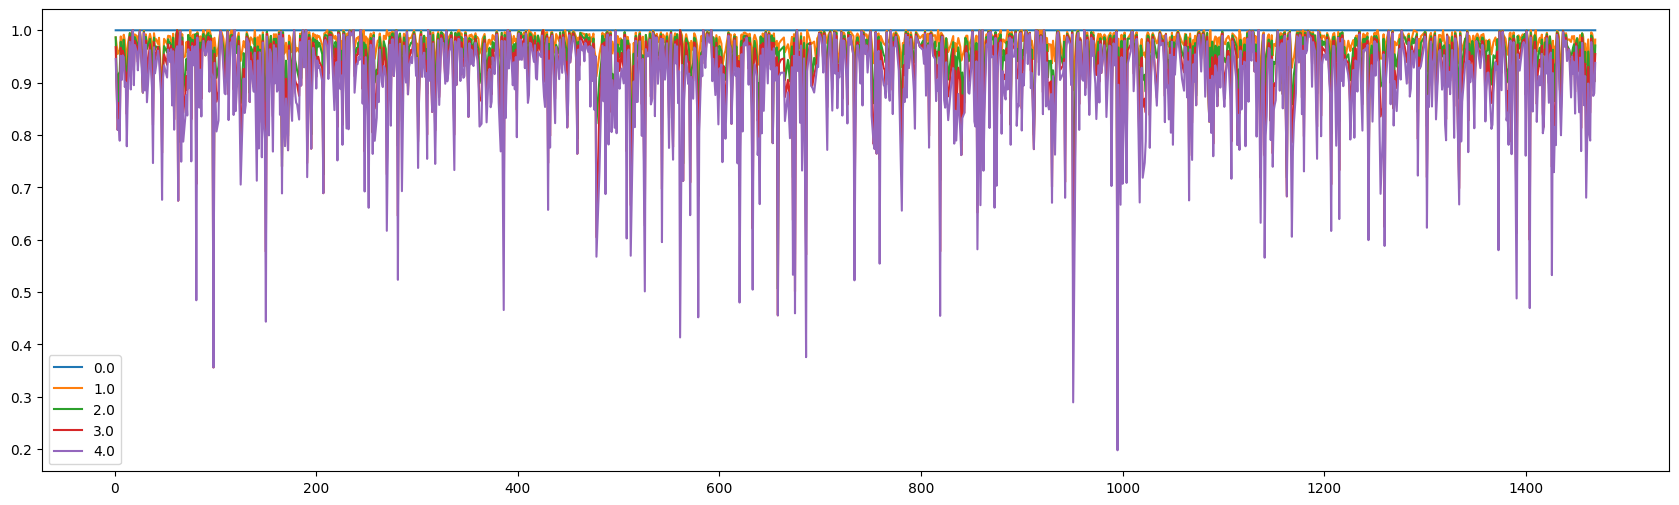

In [535]:
pd.DataFrame(predictions).head().T.plot(figsize=(21, 6))

<Axes: xlabel='log(HR) (95% CI)'>

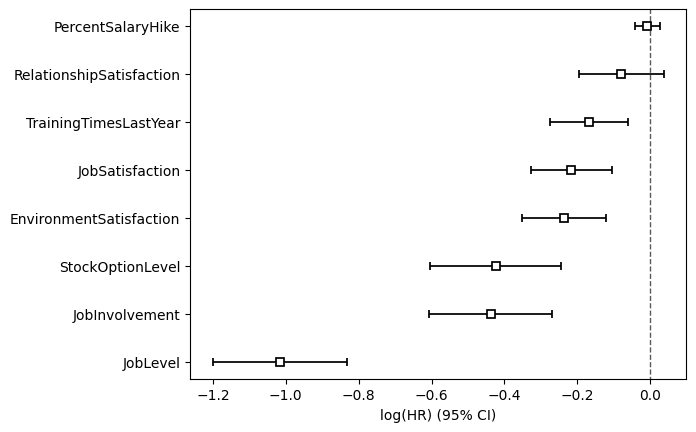

In [536]:
coxph.plot()

In [537]:
coxph.check_assumptions(df)

Proportional hazard assumption looks okay.


[]

### (3) Accelerated Failure Time (AFT) Model
- Cox-PH 모델의 비례 위험 가정 기준을 만족하지 못하는 경우에는 파라메트릭 모델을 사용하는 것이 더 나은 접근 방식이며, AFT는 파라메트릭 모델 중 하나
- 생존 함수가 모수적 연속 분포를 따른다고 가정 (Weibull 분포 또는 로그 정규 분포 등)
- 두 모집단(예: P 및 Q)에서 파생된 생존 함수가 공변량의 함수로 모델링할 수 있는 acceleration 계수 람다(λ)와 관련이 있다고 가정
- 공변량을 기반으로 고장 시간을 가속화하거나 감속

In [538]:
from lifelines import WeibullFitter, ExponentialFitter, LogNormalFitter, LogLogisticFitter

In [539]:
# Instantiate each fitter
wb = WeibullFitter()
ex = ExponentialFitter()
log = LogNormalFitter()
loglogis = LogLogisticFitter()

# Fit to data
for model in [wb, ex, log, loglogis]:
    model.fit(durations = df["YearsAtCompany"].replace(0 , 0.000001), event_observed = df["Attrition"])
    # Print AIC
    print("The AIC value for", model.__class__.__name__, "is",  model.AIC_)

The AIC value for WeibullFitter is 2138.2708129525727
The AIC value for ExponentialFitter is 2263.9437336059136
The AIC value for LogNormalFitter is 2276.8859677966007
The AIC value for LogLogisticFitter is 2151.579769001517


In [540]:
LogLogistic_aft = LogLogisticFitter() # best model
LogLogistic_aft.fit(durations=df['YearsAtCompany'].replace(0 , 0.000001), event_observed=df['Attrition'])
LogLogistic_aft.print_summary(3)

<lifelines.LogLogisticFitter:"LogLogistic_estimate", fitted with 1470 total observations, 1233 right-censored observations>
   number of observations = 1470
number of events observed = 237
           log-likelihood = -1073.790
               hypothesis = alpha_ != 1, beta_ != 1

---
          coef   se(coef)   coef lower 95%   coef upper 95%
alpha_ 123.013     26.194           71.673          174.353
beta_    0.581      0.035            0.513            0.648

         cmp to       z       p   -log2(p)
alpha_    1.000   4.658 <0.0005     18.257
beta_     1.000 -12.130 <0.0005    110.073
---
AIC = 2151.580

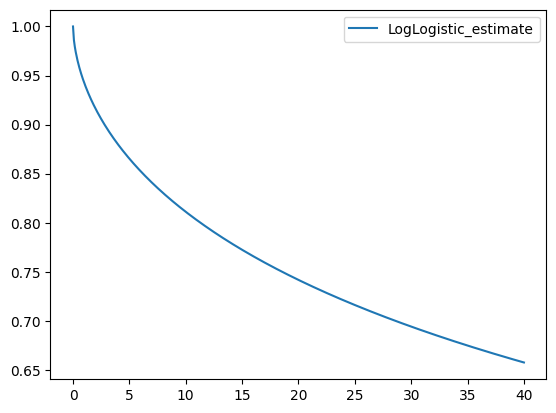

In [541]:
LogLogistic_aft.survival_function_.plot()
plt.show()

In [542]:
# 공변량의 단위 증가는 평균/중간 생존 시간이 exp(계수)만큼 변경됨을 나타냅니다.
# 계수가 양수이면 exp(계수)가 >1이 되어 사건/이벤트 시간이 느려지며, 마찬가지로 음의 계수는 평균/중간 생존 시간을 줄입니다.
LogLogistic_aft.median_survival_time_

123.01280287855722

<Axes: >

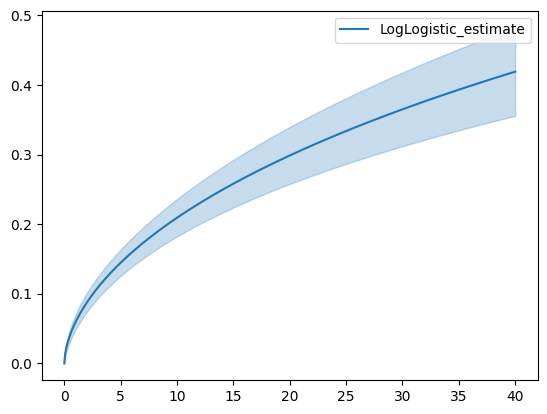

In [543]:
LogLogistic_aft.plot()

## Cohort Analysis
- 사용자 행동을 그룹으로 나눠 지표별로 수치화한 뒤 분석하는 기법

- 분석 주제
    - 첫 번째 구매행동 이후 몇 개월까지 구매행위가 지속되는가?
    - 구매주기는 대략적으로 얼마큼 되는가?
    - 첫 구매 날짜(브랜드 인입 시기)에 따른 최근 구매 패턴(구매, 비구매) 비교 등

- 상기 분석 목표에 따라서 변수를 설정하여야 하는데, 여기에서는 '첫구매'일로 설정함
- 구매일(OrderDate)을 YYYY-MM 형식으로 만들어줌

In [544]:
df = pd.read_excel("./data/relay-foods.xlsx", sheet_name = 'Purchase') # Purchase 
df.head()

OrderId  OrderDate  UserId  TotalCharges CommonId  PupId PickupDate
0      262 2009-01-11      47         50.67    TRQKD      2 2009-01-12
1      278 2009-01-20      47         26.60    4HH2S      3 2009-01-20
2      294 2009-02-03      47         38.71    3TRDC      2 2009-02-04
3      301 2009-02-06      47         53.38    NGAZJ      2 2009-02-09
4      302 2009-02-06      47         14.28    FFYHD      2 2009-02-09

In [545]:
df['OrderPeriod'] = df.OrderDate.apply(lambda x: x.strftime('%Y-%m'))
df.head()

OrderId  OrderDate  UserId  TotalCharges CommonId  PupId PickupDate  \
0      262 2009-01-11      47         50.67    TRQKD      2 2009-01-12   
1      278 2009-01-20      47         26.60    4HH2S      3 2009-01-20   
2      294 2009-02-03      47         38.71    3TRDC      2 2009-02-04   
3      301 2009-02-06      47         53.38    NGAZJ      2 2009-02-09   
4      302 2009-02-06      47         14.28    FFYHD      2 2009-02-09   

  OrderPeriod  
0     2009-01  
1     2009-01  
2     2009-02  
3     2009-02  
4     2009-02

In [546]:
# 각각 사용자의 첫 구매월을 추출하기위해 UserId를 index로 설정한 이후 groupby 함수를 사용하여 (기준 index level = 0) 'CohortGroup' 변수 추가
df = df.set_index('UserId')

# 고객 각각의 첫 구매기간 추출
df['CohortGroup'] = df.groupby(level=0)['OrderDate'].min().apply(lambda x: x.strftime('%Y-%m'))
df = df.reset_index()
df.head()

UserId  OrderId  OrderDate  TotalCharges CommonId  PupId PickupDate  \
0      47      262 2009-01-11         50.67    TRQKD      2 2009-01-12   
1      47      278 2009-01-20         26.60    4HH2S      3 2009-01-20   
2      47      294 2009-02-03         38.71    3TRDC      2 2009-02-04   
3      47      301 2009-02-06         53.38    NGAZJ      2 2009-02-09   
4      47      302 2009-02-06         14.28    FFYHD      2 2009-02-09   

  OrderPeriod CohortGroup  
0     2009-01     2009-01  
1     2009-01     2009-01  
2     2009-02     2009-01  
3     2009-02     2009-01  
4     2009-02     2009-01

In [547]:
# 첫구매일(년월)와 구매 날짜(년월)를 기준으로 하여 고객 수, 주문 수, 총매출 합계를 계산합니다.
# CohortGroup & OrderPeriod
grouped = df.groupby(['CohortGroup', 'OrderPeriod'])

cohorts = grouped.agg({'UserId': pd.Series.nunique, # DISTINCT COUNT 
                       'OrderId': pd.Series.nunique,
                       'TotalCharges': np.sum}) # SUM 
                       
cohorts.rename(columns={'UserId': 'TotalUsers',
                        'OrderId': 'TotalOrders'}, inplace=True)
cohorts.head()

TotalUsers  TotalOrders  TotalCharges
CohortGroup OrderPeriod                                       
2009-01     2009-01              22           30      1850.255
            2009-02               8           25      1351.065
            2009-03              10           26      1357.360
            2009-04               9           28      1604.500
            2009-05              10           26      1575.625

In [548]:
# <년월 - 년월>의 패턴을 <년월 - 소요기간(월)>로 변환하여 보기 위함
# Label the CohortPeriod for each CohortGroup
def cohort_period(df):
    df['CohortPeriod'] = np.arange(len(df)) + 1
    return df

In [549]:
cohorts = cohorts.groupby(level=0).apply(cohort_period).droplevel([0])
cohorts.head(20)

TotalUsers  TotalOrders  TotalCharges  CohortPeriod
CohortGroup OrderPeriod                                                     
2009-01     2009-01              22           30     1850.2550             1
            2009-02               8           25     1351.0650             2
            2009-03              10           26     1357.3600             3
            2009-04               9           28     1604.5000             4
            2009-05              10           26     1575.6250             5
            2009-06               8           26     1384.8400             6
            2009-07               8           24     1750.8400             7
            2009-08               7           21     1426.5714             8
            2009-09               7           24     1964.2755             9
            2009-10               7           13      860.3292            10
            2009-11               7           21     1821.8153            11
            2009-12               8           22     2152.1165            12
            2010-01              11           25     2084.2236            13
            2010-02               7           19     2068.7771            14
            2010-03               6           12     1504.3325            15
2009-02     2009-02              15           15      666.3100             1
            2009-03               3            8      501.6100             2
            2009-04               5           10      968.7800             3
            2009-05               1            2       53.3600             4
            2009-06               4            9      758.5200             5

In [550]:
cohorts.reset_index(inplace=True)

In [551]:
# Retention 결과를 (%) 비율로 나타내기 위해 각각 첫 구매일(년월)에 따른 회원수를 구합니다.
# 2009-01 에 첫 구매한 회원수 22명 , 2월에 첫 구매한 회원수 15명
cohorts.set_index(['CohortGroup', 'CohortPeriod'], inplace=True)

cohort_group_size = cohorts['TotalUsers'].groupby(level=0).first()
cohort_group_size.head()

CohortGroup
2009-01    22
2009-02    15
2009-03    13
2009-04    39
2009-05    50
Name: TotalUsers, dtype: int64

In [552]:
cohorts['TotalUsers'].unstack(0).head()

CohortGroup   2009-01  2009-02  2009-03  2009-04  2009-05  2009-06  2009-07  \
CohortPeriod                                                                  
1                22.0     15.0     13.0     39.0     50.0     32.0     50.0   
2                 8.0      3.0      4.0     13.0     13.0     15.0     23.0   
3                10.0      5.0      5.0     10.0     12.0      9.0     13.0   
4                 9.0      1.0      4.0     13.0      5.0      6.0     10.0   
5                10.0      4.0      1.0      6.0      4.0      7.0     11.0   

CohortGroup   2009-08  2009-09  2009-10  2009-11  2009-12  2010-01  2010-02  \
CohortPeriod                                                                  
1                31.0     37.0     54.0    130.0     65.0     95.0    100.0   
2                11.0     15.0     17.0     32.0     17.0     50.0     19.0   
3                 9.0     14.0     12.0     26.0     18.0     26.0      NaN   
4                 7.0      8.0     13.0     29.0      7.0      NaN      NaN   
5                 6.0     13.0     13.0     13.0      NaN      NaN      NaN   

CohortGroup   2010-03  
CohortPeriod           
1                24.0  
2                 NaN  
3                 NaN  
4                 NaN  
5                 NaN

In [553]:
user_retention = cohorts['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)
user_retention.head(10)

CohortGroup    2009-01   2009-02   2009-03   2009-04  2009-05  2009-06  \
CohortPeriod                                                             
1             1.000000  1.000000  1.000000  1.000000     1.00  1.00000   
2             0.363636  0.200000  0.307692  0.333333     0.26  0.46875   
3             0.454545  0.333333  0.384615  0.256410     0.24  0.28125   
4             0.409091  0.066667  0.307692  0.333333     0.10  0.18750   
5             0.454545  0.266667  0.076923  0.153846     0.08  0.21875   
6             0.363636  0.266667  0.153846  0.179487     0.12  0.15625   
7             0.363636  0.266667  0.153846  0.102564     0.06  0.09375   
8             0.318182  0.333333  0.230769  0.153846     0.10  0.09375   
9             0.318182  0.333333  0.153846  0.051282     0.10  0.31250   
10            0.318182  0.266667  0.076923  0.102564     0.08  0.09375   

CohortGroup   2009-07   2009-08   2009-09   2009-10   2009-11   2009-12  \
CohortPeriod                                                              
1                1.00  1.000000  1.000000  1.000000  1.000000  1.000000   
2                0.46  0.354839  0.405405  0.314815  0.246154  0.261538   
3                0.26  0.290323  0.378378  0.222222  0.200000  0.276923   
4                0.20  0.225806  0.216216  0.240741  0.223077  0.107692   
5                0.22  0.193548  0.351351  0.240741  0.100000       NaN   
6                0.20  0.258065  0.243243  0.129630       NaN       NaN   
7                0.22  0.129032  0.216216       NaN       NaN       NaN   
8                0.14  0.129032       NaN       NaN       NaN       NaN   
9                0.14       NaN       NaN       NaN       NaN       NaN   
10                NaN       NaN       NaN       NaN       NaN       NaN   

CohortGroup    2010-01  2010-02  2010-03  
CohortPeriod                              
1             1.000000     1.00      1.0  
2             0.526316     0.19      NaN  
3             0.273684      NaN      NaN  
4                  NaN      NaN      NaN  
5                  NaN      NaN      NaN  
6                  NaN      NaN      NaN  
7                  NaN      NaN      NaN  
8                  NaN      NaN      NaN  
9                  NaN      NaN      NaN  
10                 NaN      NaN      NaN

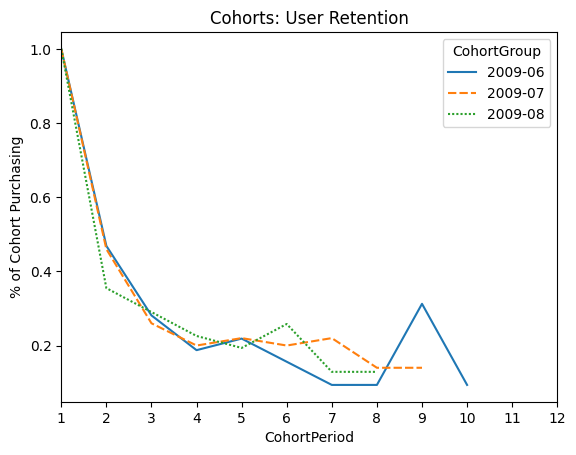

In [554]:
sns.lineplot(user_retention[['2009-06', '2009-07', '2009-08']])
plt.title('Cohorts: User Retention')
plt.xticks(np.arange(1, 12.1, 1))
plt.xlim(1, 12)
plt.ylabel('% of Cohort Purchasing');

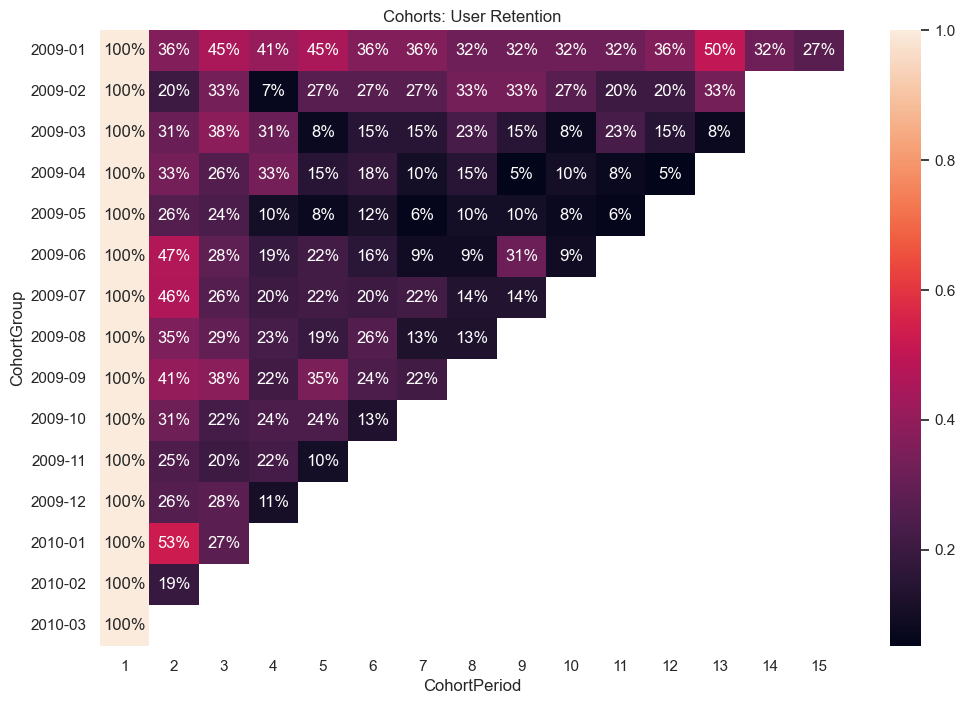

In [555]:
# 그래프는 각각 브랜드에 유입된 시기를 비교하여 첫구매 이후 고객들의 구매패턴을 나타낸 것입니다.
# 2009년 07월에 유입된 고객들의 패턴을 기준으로 살펴보면 첫 구매 이후 한 달 뒤 46%가 구매행동을 보였고 8개월이 지난 후에는 14%만이 구매행동을 보였습니다.
# 여기서 자세히 살펴보면 최근 기준으로 구매행동을 보인 고객들의 유입 날짜(년월)를 확인할 수 있습니다.
sns.set(style='white')
plt.figure(figsize=(12, 8))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%');

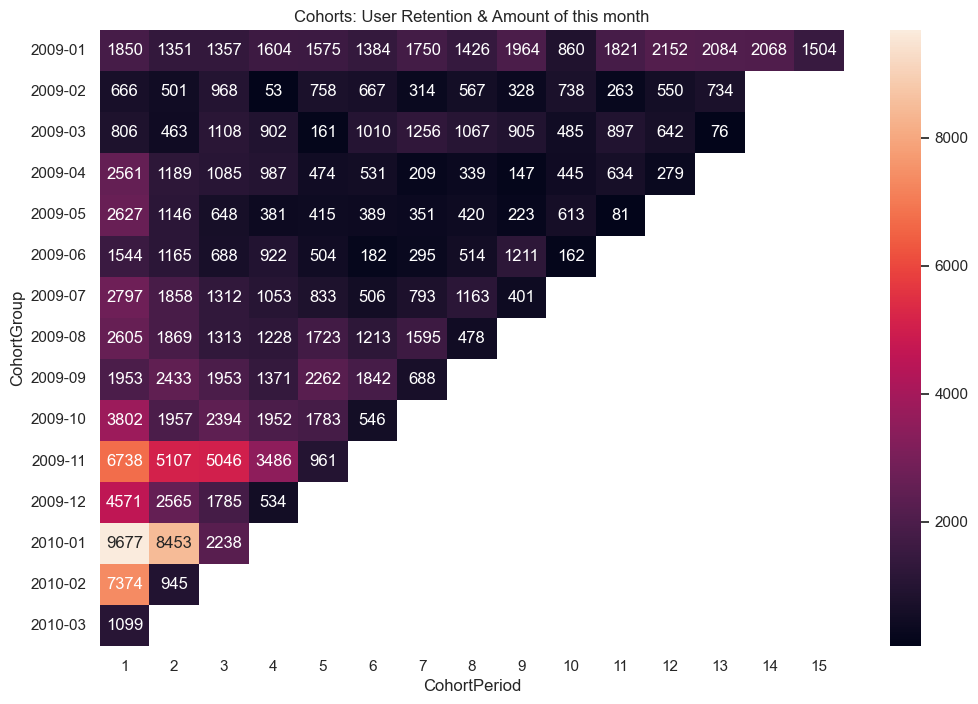

In [556]:
# 최근 발생한 매출의 회원들의 첫 구매일 분포
plt.figure(figsize=(12, 8))
plt.title('Cohorts: User Retention & Amount of this month')
sns.heatmap(cohorts['TotalCharges'].unstack(0).T.fillna(0).astype('int'), 
            mask=user_retention.T.isnull(), annot=True, fmt= '0');

## Association Analysis
- 사건의 연관규칙을 찾는 방법
- A -> B

### (1) Run test
#### One sample

In [557]:
data = ['a', 'a', 'b', 'b', 'a', 'a', 'a', 'a', 'b', 'b', 'b', 'b', 'b', 'a', 'a', 'b', 'b', 'a', 'b', 'b']

test_df = pd.DataFrame(data, columns=["product"])
test_df.head()

product
0       a
1       a
2       b
3       b
4       a

귀무가설(H0) <br>
연속적인 관측값이 임의적이다.<br>
대립가설(H1)<br>
연속적인 관측값이 임의적이지 않다 (연관이 있다).<br>

In [558]:
from statsmodels.sandbox.stats.runs import runstest_1samp

In [559]:
# Run-test를 위한 데이터 변환 
test_df.loc[test_df['product']=='a', 'product']=1
test_df.loc[test_df['product']=='b', 'product']=0

# Perform Runs test
runstest_1samp(test_df['product'], cutoff=0.5, correction=True)

(-1.1144881152070183, 0.26506984027306035)

[결과해석]
P-value가 유의수준 (0.05)보다 크므로 귀무가설을 기각하지 않는다. 즉, 상품 a와 b의 구매에는 연관이 없다.

#### Two sample
- 두 표본이 같은 분포에서 나왔는지 테스트
- Wald–Wolfowitz Run test

H0: The two populations have the same distribution. <br>
H1: The two populations have different distributions. 

In [560]:
from statsmodels.sandbox.stats.runs import runstest_2samp

In [561]:
x = [31.8, 32.8, 39.2, 36, 30, 34.5, 37.4]
y = [35.5, 27.6, 21.3, 24.8, 36.7, 30]

res = runstest_2samp(x, y)
res

ties detected


(0.022428065200812752, 0.9821064931864921)

[결과해석]
P-value가 유의수준 (0.05)보다 크므로 귀무가설을 기각하지 않는다. 즉, x와 y는 같은 분포에서 온 것으로 볼 수 있다.

### (2) Association rules
- 조건-결과 식으로 표현되는 유용한 패턴을 발견해 내는 것
- 장바구니분석, 서열분석
- 간단하지만, 품목수가 많으면 계산량이 기하급수적으로 증가하므로, 적절한 품목 결정 필요
- 측정 지표
    - 지지도 (Support): 전체 거래 중 품목 A, B가 동시에 포함되는 거래의 비율. 전체 구매 경향 파악
    - 신뢰도 (Confidence): 품목 A가 포함된 거래 중 A, B가 동시에 포함되는 거래의 비율. A -> B 연관성 정도
    - 향상도 (Lift): 품목 B를 구매한 고객 중, A를 구매한 후 B를 구매할 확률. 1이면 A, B가 독립, 1보다 크면 양의 상관관계
- Apriori 알고리즘
    - 계산량을 줄이기 위해, 빈발집합(Frequent Item Sets)만을 고려해서 연관 규칙 생성
    - Frequent Item set: 최소지지도 이상의 지지도 값을 갖는 item

In [562]:
# !pip install mlxtend
from mlxtend.preprocessing import TransactionEncoder

In [563]:
dataset = [['Apple', 'Beer', 'Rice', 'Chicken'],
           ['Apple', 'Beer', 'Rice'],
           ['Apple', 'Beer'],
           ['Apple', 'Bananas'],
           ['Milk', 'Beer', 'Rice', 'Chicken'],
           ['Milk', 'Beer', 'Rice'],
           ['Milk', 'Beer'],
           ['Apple', 'Bananas']]

te = TransactionEncoder() # Transaction 형태로 변환
te_ary = te.fit_transform(dataset)
print(te.columns_)
te_ary

['Apple', 'Bananas', 'Beer', 'Chicken', 'Milk', 'Rice']


array([[ True, False,  True,  True, False,  True],
       [ True, False,  True, False, False,  True],
       [ True, False,  True, False, False, False],
       [ True,  True, False, False, False, False],
       [False, False,  True,  True,  True,  True],
       [False, False,  True, False,  True,  True],
       [False, False,  True, False,  True, False],
       [ True,  True, False, False, False, False]])

In [564]:
df = pd.DataFrame(te_ary, columns=te.columns_)
df

Apple  Bananas   Beer  Chicken   Milk   Rice
0   True    False   True     True  False   True
1   True    False   True    False  False   True
2   True    False   True    False  False  False
3   True     True  False    False  False  False
4  False    False   True     True   True   True
5  False    False   True    False   True   True
6  False    False   True    False   True  False
7   True     True  False    False  False  False

In [565]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [566]:
### 지지도 60 % 이상인 품목만 추출 
apriori(df, min_support=0.6, use_colnames=True)

support itemsets
0    0.625  (Apple)
1    0.750   (Beer)

In [567]:
### 규칙의 길이를 추출하는 방법 
frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

support       itemsets  length
0    0.625        (Apple)       1
1    0.750         (Beer)       1
2    0.375         (Milk)       1
3    0.500         (Rice)       1
4    0.375  (Beer, Apple)       2
5    0.375   (Beer, Milk)       2
6    0.500   (Beer, Rice)       2

In [568]:
df = pd.read_csv('./ADP_book_ver01/data/groceries.csv',)
df

citrus fruit,semi-finished bread,margarine,ready soups
0                          tropical fruit,yogurt,coffee    
1                                            whole milk    
2            pip fruit,yogurt,cream cheese,meat spreads    
3     other vegetables,whole milk,condensed milk,lon...    
4        whole milk,butter,yogurt,rice,abrasive cleaner    
...                                                 ...    
9829  sausage,chicken,beef,hamburger meat,citrus fru...    
9830                                  cooking chocolate    
9831  chicken,citrus fruit,other vegetables,butter,y...    
9832  semi-finished bread,bottled water,soda,bottled...    
9833  chicken,tropical fruit,other vegetables,vinega...    

[9834 rows x 1 columns]

In [569]:
### Comma로 데이터 분할
df_split = df.iloc[:, 0].str.split(',', expand=True)
df_split.values

array([['tropical fruit', 'yogurt', 'coffee', ..., None, None, None],
       ['whole milk', None, None, ..., None, None, None],
       ['pip fruit', 'yogurt', 'cream cheese', ..., None, None, None],
       ...,
       ['chicken', 'citrus fruit', 'other vegetables', ..., None, None,
        None],
       ['semi-finished bread', 'bottled water', 'soda', ..., None, None,
        None],
       ['chicken', 'tropical fruit', 'other vegetables', ..., None, None,
        None]], dtype=object)

In [570]:
### None 제거
df_split_ary = df_split.values
groceries = []
for i in range(len(df_split_ary)) : 
    temp = list(filter(None, df_split_ary[i]))
    groceries.append(temp)

In [571]:
te = TransactionEncoder()
groceries_tr = te.fit(groceries).transform(groceries)
groceries_tr = pd.DataFrame(groceries_tr, columns=te.columns_)
groceries_tr

Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
0                     False     False             False             False   
1                     False     False             False             False   
2                     False     False             False             False   
3                     False     False             False             False   
4                     False     False              True             False   
...                     ...       ...               ...               ...   
9829                  False     False             False             False   
9830                  False     False             False             False   
9831                  False     False             False             False   
9832                  False     False             False             False   
9833                  False     False             False             False   

      baby cosmetics  baby food   bags  baking powder  bathroom cleaner  \
0              False      False  False          False             False   
1              False      False  False          False             False   
2              False      False  False          False             False   
3              False      False  False          False             False   
4              False      False  False          False             False   
...              ...        ...    ...            ...               ...   
9829           False      False  False          False             False   
9830           False      False  False          False             False   
9831           False      False  False          False             False   
9832           False      False  False          False             False   
9833           False      False  False          False             False   

       beef  ...  turkey  vinegar  waffles  whipped/sour cream  whisky  \
0     False  ...   False    False    False               False   False   
1     False  ...   False    False    False               False   False   
2     False  ...   False    False    False               False   False   
3     False  ...   False    False    False               False   False   
4     False  ...   False    False    False               False   False   
...     ...  ...     ...      ...      ...                 ...     ...   
9829   True  ...   False    False    False                True   False   
9830  False  ...   False    False    False               False   False   
9831  False  ...   False    False    False               False   False   
9832  False  ...   False    False    False               False   False   
9833  False  ...   False     True    False               False   False   

      white bread  white wine  whole milk  yogurt  zwieback  
0           False       False       False    True     False  
1           False       False        True   False     False  
2           False       False       False    True     False  
3           False       False        True   False     False  
4           False       False        True    True     False  
...           ...         ...         ...     ...       ...  
9829        False       False        True   False     False  
9830        False       False       False   False     False  
9831        False       False       False    True     False  
9832        False       False       False   False     False  
9833        False       False       False   False     False  

[9834 rows x 169 columns]

In [572]:
# 지지도가 5% 이상인 빈번 항목 집합 탐색
groceries_ap = apriori(groceries_tr, min_support=0.05, use_colnames=True)
groceries_ap

support                        itemsets
0   0.052471                          (beef)
1   0.080537                  (bottled beer)
2   0.110535                 (bottled water)
3   0.064877                   (brown bread)
4   0.055420                        (butter)
5   0.077690                   (canned beer)
6   0.082672                  (citrus fruit)
7   0.058064                        (coffee)
8   0.053285                          (curd)
9   0.063453                 (domestic eggs)
10  0.058979                   (frankfurter)
11  0.072300         (fruit/vegetable juice)
12  0.058471                     (margarine)
13  0.052369                       (napkins)
14  0.079825                    (newspapers)
15  0.193512              (other vegetables)
16  0.088977                        (pastry)
17  0.075656                     (pip fruit)
18  0.057657                          (pork)
19  0.183954                    (rolls/buns)
20  0.109010               (root vegetables)
21  0.093960                       (sausage)
22  0.098536                 (shopping bags)
23  0.174395                          (soda)
24  0.104942                (tropical fruit)
25  0.071690            (whipped/sour cream)
26  0.255542                    (whole milk)
27  0.139516                        (yogurt)
28  0.074842  (other vegetables, whole milk)
29  0.056640        (whole milk, rolls/buns)
30  0.056030            (yogurt, whole milk)

In [573]:
# 신뢰도가 0.3 이상인 빈번 항목 집합 탐색
association_rules(groceries_ap, metric="confidence", min_threshold=0.3)

antecedents   consequents  antecedent support  consequent support  \
0  (other vegetables)  (whole milk)            0.193512            0.255542   
1        (rolls/buns)  (whole milk)            0.183954            0.255542   
2            (yogurt)  (whole milk)            0.139516            0.255542   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.074842    0.386758  1.513480  0.025392    1.213971       0.420677  
1  0.056640    0.307905  1.204909  0.009632    1.075659       0.208397  
2  0.056030    0.401603  1.571575  0.020378    1.244088       0.422664

In [574]:
rules = association_rules(groceries_ap, metric="lift", min_threshold=1)

# 규칙의 길이 컬럼 생성 
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules

antecedents         consequents  antecedent support  \
0  (other vegetables)        (whole milk)            0.193512   
1        (whole milk)  (other vegetables)            0.255542   
2        (whole milk)        (rolls/buns)            0.255542   
3        (rolls/buns)        (whole milk)            0.183954   
4            (yogurt)        (whole milk)            0.139516   
5        (whole milk)            (yogurt)            0.255542   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.255542  0.074842    0.386758  1.513480  0.025392    1.213971   
1            0.193512  0.074842    0.292877  1.513480  0.025392    1.140520   
2            0.183954  0.056640    0.221647  1.204909  0.009632    1.048428   
3            0.255542  0.056640    0.307905  1.204909  0.009632    1.075659   
4            0.255542  0.056030    0.401603  1.571575  0.020378    1.244088   
5            0.139516  0.056030    0.219260  1.571575  0.020378    1.102139   

   zhangs_metric  antecedent_len  
0       0.420677               1  
1       0.455729               1  
2       0.228437               1  
3       0.208397               1  
4       0.422664               1  
5       0.488538               1

In [575]:
rules[(rules['antecedent_len'] >=1) & (rules['confidence'] >=0.4) & (rules['lift'] >=1)]

antecedents   consequents  antecedent support  consequent support  support  \
4    (yogurt)  (whole milk)            0.139516            0.255542  0.05603   

   confidence      lift  leverage  conviction  zhangs_metric  antecedent_len  
4    0.401603  1.571575  0.020378    1.244088       0.422664               1

In [576]:
### Adult data
adult = pd.read_csv('./data/adult.csv')
adult.head()

items  transactionID
0  {age=Middle-aged,workclass=State-gov,education...              1
1  {age=Senior,workclass=Self-emp-not-inc,educati...              2
2  {age=Middle-aged,workclass=Private,education=H...              3
3  {age=Senior,workclass=Private,education=11th,m...              4
4  {age=Middle-aged,workclass=Private,education=B...              5

In [577]:
adult['items'][0]

'{age=Middle-aged,workclass=State-gov,education=Bachelors,marital-status=Never-married,occupation=Adm-clerical,relationship=Not-in-family,race=White,sex=Male,capital-gain=Low,capital-loss=None,hours-per-week=Full-time,native-country=United-States,income=small}'

In [578]:
### Comma로 데이터 분할
adult['items'] = adult['items'].str.replace('{', '')
adult['items'] = adult['items'].str.replace('}', '')
adult_split = adult['items'].str.split(',', expand=True)
adult_split.values

array([['age=Middle-aged', 'workclass=State-gov', 'education=Bachelors',
        ..., 'hours-per-week=Full-time', 'native-country=United-States',
        'income=small'],
       ['age=Senior', 'workclass=Self-emp-not-inc',
        'education=Bachelors', ..., 'hours-per-week=Part-time',
        'native-country=United-States', 'income=small'],
       ['age=Middle-aged', 'workclass=Private', 'education=HS-grad', ...,
        'hours-per-week=Full-time', 'native-country=United-States',
        'income=small'],
       ...,
       ['age=Middle-aged', 'workclass=Private', 'education=Bachelors',
        ..., 'hours-per-week=Over-time', 'native-country=United-States',
        None],
       ['age=Middle-aged', 'workclass=Private', 'education=Bachelors',
        ..., 'hours-per-week=Full-time', 'native-country=United-States',
        None],
       ['age=Middle-aged', 'workclass=Self-emp-inc',
        'education=Bachelors', ..., 'hours-per-week=Over-time',
        'native-country=United-States', No

In [579]:
### None 제거
adult_split_ary = adult_split.values
adult_list = []
for i in range(len(adult_split_ary)) : 
    temp = list(filter(None, adult_split_ary[i]))
    adult_list.append(temp)

In [580]:
te = TransactionEncoder()
adult_tr = te.fit(adult_list).transform(adult_list)
adult_tr = pd.DataFrame(adult_tr, columns=te.columns_)
adult_tr

age=Middle-aged  age=Old  age=Senior  age=Young  capital-gain=High  \
0                 True    False       False      False              False   
1                False    False        True      False              False   
2                 True    False       False      False              False   
3                False    False        True      False              False   
4                 True    False       False      False              False   
...                ...      ...         ...        ...                ...   
48837             True    False       False      False              False   
48838            False    False        True      False              False   
48839             True    False       False      False              False   
48840             True    False       False      False              False   
48841             True    False       False      False              False   

       capital-gain=Low  capital-gain=None  capital-loss=High  \
0                  True              False              False   
1                 False               True              False   
2                 False               True              False   
3                 False               True              False   
4                 False               True              False   
...                 ...                ...                ...   
48837             False               True              False   
48838             False               True              False   
48839             False               True              False   
48840              True              False              False   
48841             False               True              False   

       capital-loss=Low  capital-loss=None  ...  sex=Female  sex=Male  \
0                 False               True  ...       False      True   
1                 False               True  ...       False      True   
2                 False               True  ...       False      True   
3                 False               True  ...       False      True   
4                 False               True  ...        True     False   
...                 ...                ...  ...         ...       ...   
48837             False               True  ...        True     False   
48838             False               True  ...       False      True   
48839             False               True  ...       False      True   
48840             False               True  ...       False      True   
48841             False               True  ...       False      True   

       workclass=Federal-gov  workclass=Local-gov  workclass=Never-worked  \
0                      False                False                   False   
1                      False                False                   False   
2                      False                False                   False   
3                      False                False                   False   
4                      False                False                   False   
...                      ...                  ...                     ...   
48837                  False                False                   False   
48838                  False                False                   False   
48839                  False                False                   False   
48840                  False                False                   False   
48841                  False                False                   False   

       workclass=Private  workclass=Self-emp-inc  workclass=Self-emp-not-inc  \
0                  False                   False                       False   
1                  False                   False                        True   
2                   True                   False                       False   
3                   True                   False                       False   
4                   True                   False                       False   
...                

In [581]:
# 지지도가 10% 이상인 빈번 항목 집합 탐색
adult_ap = apriori(adult_tr, min_support=0.1, use_colnames=True)
adult_ap

support                                           itemsets
0     0.505119                                  (age=Middle-aged)
1     0.260862                                       (age=Senior)
2     0.197105                                        (age=Young)
3     0.917387                                (capital-gain=None)
4     0.953278                                (capital-loss=None)
...        ...                                                ...
2611  0.110172  (race=White, relationship=Husband, native-coun...
2612  0.176999  (race=White, relationship=Husband, native-coun...
2613  0.102821  (race=White, relationship=Husband, native-coun...
2614  0.108595  (race=White, relationship=Husband, native-coun...
2615  0.105667  (age=Middle-aged, race=White, relationship=Hus...

[2616 rows x 2 columns]

In [582]:
# 신뢰도가 0.6 이상인 빈번 항목 집합 탐색
ar = association_rules(adult_ap, metric="confidence", min_threshold=0.6)
ar

antecedents  \
0                                      (age=Middle-aged)   
1                                      (age=Middle-aged)   
2                             (hours-per-week=Over-time)   
3                                      (age=Middle-aged)   
4                                      (age=Middle-aged)   
...                                                  ...   
22041  (marital-status=Married-civ-spouse, workclass=...   
22042  (sex=Male, marital-status=Married-civ-spouse, ...   
22043  (capital-gain=None, marital-status=Married-civ...   
22044  (marital-status=Married-civ-spouse, capital-lo...   
22045  (workclass=Private, relationship=Husband, age=...   

                                             consequents  antecedent support  \
0                                    (capital-gain=None)            0.505119   
1                                    (capital-loss=None)            0.505119   
2                                      (age=Middle-aged)            0.259531   
3                         (native-country=United-States)            0.505119   
4                                           (race=White)            0.505119   
...                                                  ...                 ...   
22041  (race=White, relationship=Husband, sex=Male, c...            0.156791   
22042  (race=White, relationship=Husband, native-coun...            0.157221   
22043  (race=White, relationship=Husband, native-coun...            0.159125   
22044  (race=White, relationship=Husband, native-coun...            0.167090   
22045  (race=White, native-country=United-States, sex...            0.155706   

       consequent support   support  confidence      lift  leverage  \
0                0.917387  0.463208    0.917028  0.999609 -0.000181   
1                0.953278  0.480079    0.950428  0.997010 -0.001440   
2                0.505119  0.156873    0.604449  1.196649  0.025779   
3                0.897424  0.448876    0.888655  0.990228 -0.004430   
4                0.855043  0.425351    0.842082  0.984842 -0.006547   
...                   ...       ...         ...       ...       ...   
22041            0.297736  0.105667    0.673936  2.263538  0.058985   
22042            0.274661  0.105667    0.672093  2.446989  0.062485   
22043            0.316142  0.105667    0.664050  2.100483  0.055361   
22044            0.296937  0.105667    0.632398  2.129737  0.056052   
22045            0.276524  0.105667    0.678632  2.454151  0.062611   

       conviction  zhangs_metric  
0        0.995678      -0.000790  
1        0.942502      -0.006023  
2        1.251120       0.221931  
3        0.921239      -0.019551  
4        0.917926      -0.030163  
...           ...            ...  
22041    2.153761       0.662011  
22042    2.212024       0.701648  
22043    2.035598       0.623064  
22044    1.912566       0.636874  
22045    2.251241       0.701802  

[22046 rows x 10 columns]

In [583]:
# 특정 consequents 찾기
ar[(ar.consequents == frozenset({'income=small'})) | (ar.consequents == frozenset({'income=large'}))]

antecedents     consequents  \
16                                           (age=Young)  (income=small)   
116                       (marital-status=Never-married)  (income=small)   
119                             (relationship=Own-child)  (income=small)   
352                       (capital-gain=None, age=Young)  (income=small)   
372                       (capital-loss=None, age=Young)  (income=small)   
...                                                  ...             ...   
14494  (sex=Female, race=White, capital-gain=None, ca...  (income=small)   
15753  (marital-status=Never-married, race=White, nat...  (income=small)   
15783  (sex=Female, race=White, native-country=United...  (income=small)   
16656  (marital-status=Never-married, race=White, nat...  (income=small)   
19556  (marital-status=Never-married, race=White, nat...  (income=small)   

       antecedent support  consequent support   support  confidence      lift  \
16               0.197105            0.506122  0.128926    0.654098  1.292372   
116              0.329982            0.506122  0.208673    0.632376  1.249454   
119              0.155215            0.506122  0.102391    0.659676  1.303393   
352              0.191393            0.506122  0.125691    0.656718  1.297549   
372              0.192560            0.506122  0.126182    0.655290  1.294727   
...                   ...                 ...       ...         ...       ...   
14494            0.176139            0.506122  0.108513    0.616064  1.217225   
15753            0.181504            0.506122  0.117501    0.647377  1.279094   
15783            0.168011            0.506122  0.102473    0.609920  1.205085   
16656            0.184186            0.506122  0.117931    0.640285  1.265080   
19556            0.176057            0.506122  0.114225    0.648796  1.281898   

       leverage  conviction  zhangs_metric  
16     0.029167    1.427797       0.281767  
116    0.041662    1.343432       0.297978  
119    0.023834    1.451198       0.275539  
352    0.028823    1.438695       0.283594  
372    0.028724    1.432734       0.281924  
...         ...         ...            ...  
14494  0.019365    1.286356       0.216613  
15753  0.025638    1.400586       0.266582  
15783  0.017439    1.266093       0.204549  
16656  0.024711    1.372969       0.256843  
19556  0.025119    1.406245       0.266896  

[103 rows x 10 columns]

In [584]:
# frozenset data extract
[i for i in ar.consequents[0]]

['capital-gain=None']

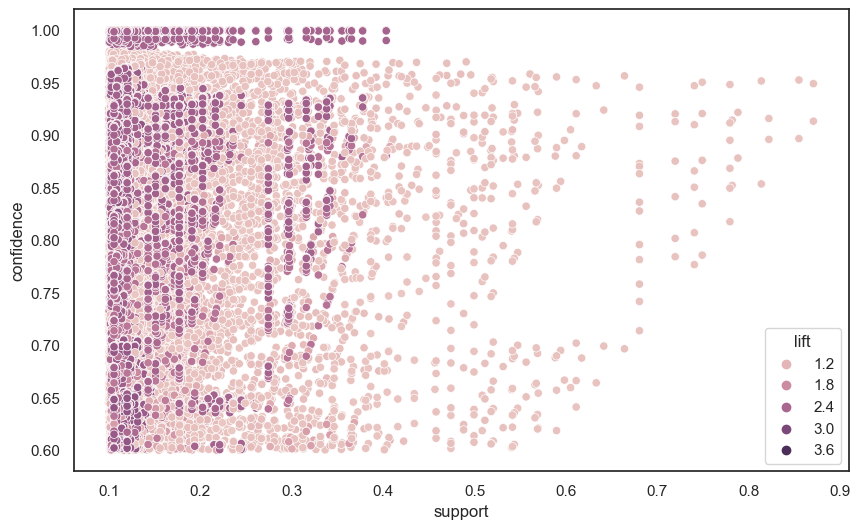

In [585]:
# 성능변수 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x=ar['support'], y=ar['confidence'], hue=ar['lift'])
plt.show()

In [586]:
import networkx as nx

In [587]:
### Visualize network
def draw_graph(rules, rules_to_show):
    G1 = nx.DiGraph()
   
    color_map = []
    colors = np.random.rand(rules_to_show)    
    strs = ["R"+str(i+1) for i in range(rules_to_show + 2)]
   
    for i in range (rules_to_show):      
        G1.add_nodes_from(["R"+str(i)])
     
        for a in rules.iloc[i]['antecedents']:
            G1.add_nodes_from([a])
            G1.add_edge(a, "R"+str(i), color=colors[i] , weight=2)
       
        for c in rules.iloc[i]['consequents']:
            G1.add_nodes_from([])
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)
 
    for node in G1:
        found_a_string = False
        for item in strs: 
            if node==item:
                found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')       

    edges = G1.edges()
    
    colors = [G1[u][v]['color'] for u,v in edges]
    weights = [G1[u][v]['weight'] for u,v in edges]
    print(len(colors))
    pos = nx.spring_layout(G1, k=16, scale=1)
    nx.draw(G1, pos, node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)            
   
    for p in pos:  # raise text positions
        pos[p][1] += 0.07
    nx.draw_networkx_labels(G1, pos)
    plt.show()

20


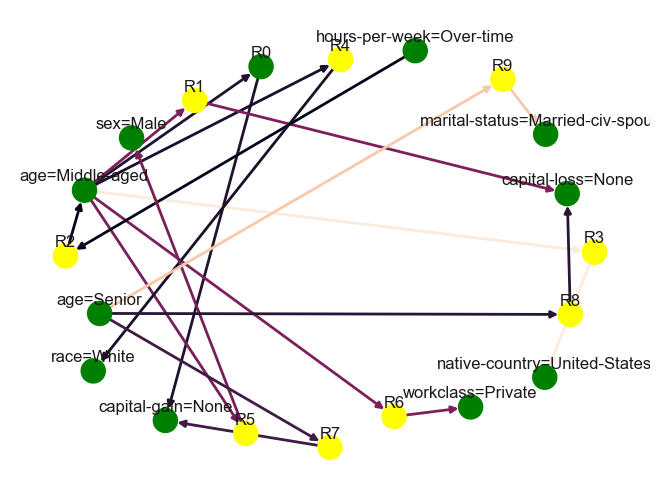

In [588]:
draw_graph(ar, 10)

## Time-Series Analysis
- 시간에 흐름에 따른 데이터 분석
- 미래의 변화에 대한 추세 분석
- 정상성
    - 평균이 일정
    - 분산이 시점과 독립
    - 공분산은 시차에만 의존
- Log transformation(분산 변동폭 제거), Differencing(추세와 계절성 제거)

### (1) ARIMA
- AR(Autoregressive): 현 시점의 자료가 p 시점 전의 유한개의 과거 자료로 설명됨. AR(p)
- MA(Moving Average): 현 시점의 자료를 백색잡음의 선형결함으로 표현하며, 항상 정상성이 만족됨. MA(q)
- AR 모형은 ACF가 연속적인 (감소) 형태, PACF가 p+1 시차에서 절단된 형태
- MA 모형은 PACF가 연속적인 형태, ACF가 p+1 시차에서 절단된 형태

In [589]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [590]:
arima_data = pd.read_csv('./ADP_book_ver01/data/arima_data.csv', names=['day', 'price'])
arima_data.head()

day  price
0  2013-01-01   3794
1  2013-02-01   3863
2  2013-03-01   5190
3  2013-04-01   5783
4  2013-05-01   6298

In [591]:
arima_data['day'] = pd.to_datetime(arima_data['day'], format="%Y-%m-%d")
arima_data.set_index('day', inplace=True)
arima_data.head(3)

price
day              
2013-01-01   3794
2013-02-01   3863
2013-03-01   5190

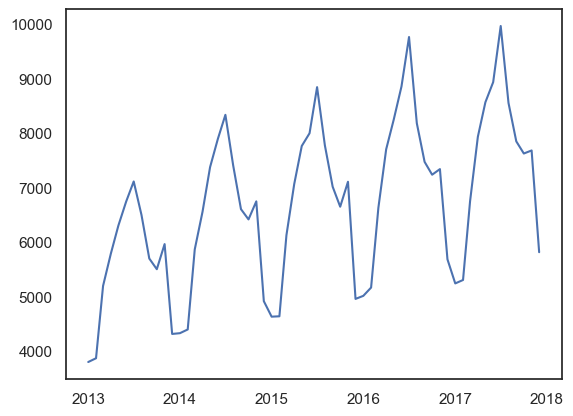

In [592]:
plt.plot(arima_data.index, arima_data['price'])
plt.show()

In [593]:
# Train, Test 데이터 구분
training = arima_data[:"2016-12-01"]
test = arima_data.drop(training.index)

귀무가설(H0) <br>
데이터가 정상성을 갖지 않는다.<br>
대립가설(H1)<br>
데이터가 정상성을 갖는다.<br>

In [594]:
### 정상성 검정
adf = adfuller(training, regression='ct')
print('ADF Statistic: {}'.format(adf[0]))
print('p-value : {}'.format(adf[1]))

ADF Statistic: -1.9997199341327319
p-value : 0.6015863303794438


<Axes: xlabel='day'>

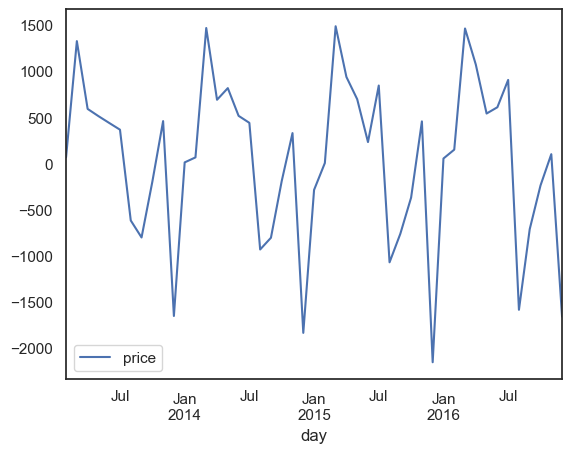

In [595]:
### 차분 실행
diff_data = training.diff(1)
diff_data = diff_data.dropna()
diff_data.plot()

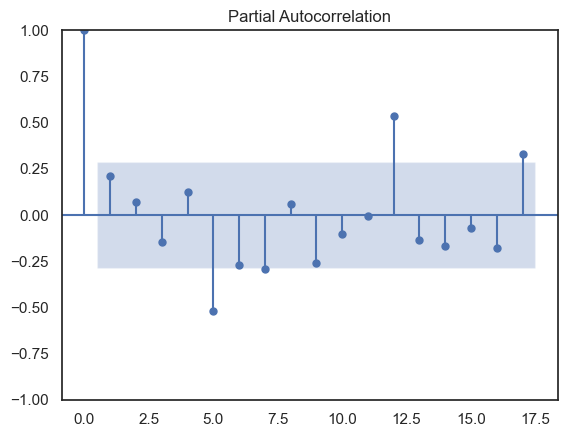

In [596]:
plot_pacf(diff_data) # AR(p)의 값 확인 가능?
plt.show()

In [597]:
from statsmodels.tsa.arima.model import ARIMA

In [598]:
model = ARIMA(training, order=(2, 1, 2))
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                   48
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -375.875
Date:                Sun, 13 Aug 2023   AIC                            761.750
Time:                        20:14:46   BIC                            771.001
Sample:                    01-01-2013   HQIC                           765.231
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3167      0.190     -6.920      0.000      -1.690      -0.944
ar.L2         -0.3191      0.191     -1.670      0.095      -0.694       0.055
ma.L1          1.9692      0.244      8.074      0.000       1.491       2.447
ma.L2          0.9941      0.243      4.098      0.000       0.519       1.470
sigma2      4.455e+05   1.15e-06   3.88e+11      0.000    4.45e+05    4.45e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 0.38
Prob(Q):                              0.74   Prob(JB):                         0.83
Heteroskedasticity (H):               1.49   Skew:                            -0.21
Prob(H) (two-sided):                  0.44   Kurtosis:                         2.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.52e+27. Standard errors may be unstable.
"""

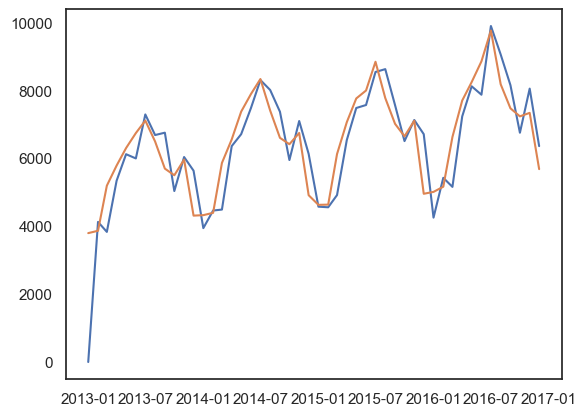

In [599]:
plt.plot(res.predict())
plt.plot(training)

In [600]:
# 학습 데이터셋으로부터 test 데이터 길이만큼 예측합니다.
forecast_data = res.forecast(steps=len(test), alpha=0.05) 

pred_y = forecast_data
pred_y

2017-01-01    5830.400526
2017-02-01    5508.289982
2017-03-01    5883.784643
2017-04-01    5492.149456
2017-05-01    5888.003302
2017-06-01    5491.744795
2017-07-01    5887.190051
2017-08-01    5492.944716
2017-09-01    5885.869607
2017-10-01    5494.300476
2017-11-01    5884.505803
2017-12-01    5495.663603
Freq: MS, Name: predicted_mean, dtype: float64

In [601]:
test_y = test # 실제 데이터
test_y

price
day              
2017-01-01   5236
2017-02-01   5299
2017-03-01   6744
2017-04-01   7927
2017-05-01   8561
2017-06-01   8930
2017-07-01   9960
2017-08-01   8548
2017-09-01   7843
2017-10-01   7620
2017-11-01   7676
2017-12-01   5809

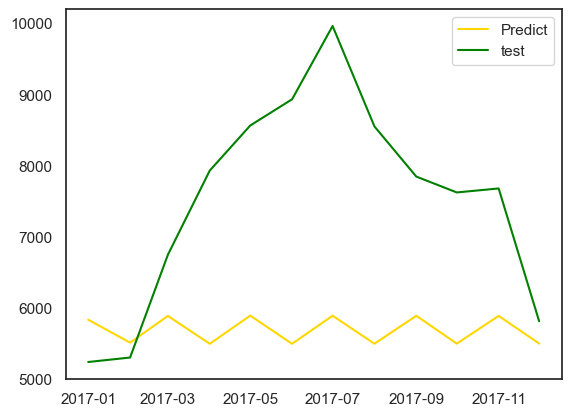

In [602]:
plt.plot(pred_y, color="gold", label='Predict') # 모델이 예상한 가격 그래프
plt.plot(test_y, color="green" , label='test') # 실제 가격 그래프
plt.legend()
plt.show()

In [603]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [604]:
print("r2_score : ", r2_score(test_y, pred_y))
RMSE = mean_squared_error(test_y, pred_y)**0.5
print("RMSE : " , RMSE)

r2_score :  -1.6432459219844344
RMSE :  2302.3506971082043


In [605]:
### Nile강 data
nile = pd.read_csv('./r_csv/datasets/Nile.csv').drop('Unnamed: 0', axis=1)
nile.set_index('time', inplace=True)
nile.head()

value
time       
1871   1120
1872   1160
1873    963
1874   1210
1875   1160

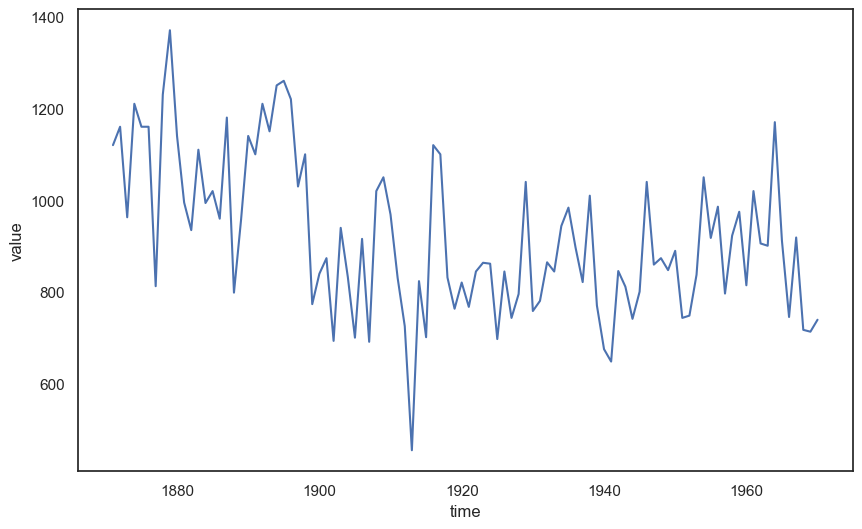

In [606]:
plt.figure(figsize=(10,6))
sns.lineplot(x='time', y='value', data=nile)
plt.show()

In [607]:
### 정상성 검정 -> 만족
adf = adfuller(nile, regression='ct')
print('ADF Statistic: {}'.format(adf[0]))
print('p-value : {}'.format(adf[1]))

ADF Statistic: -4.790765517983117
p-value : 0.00048614302900814677


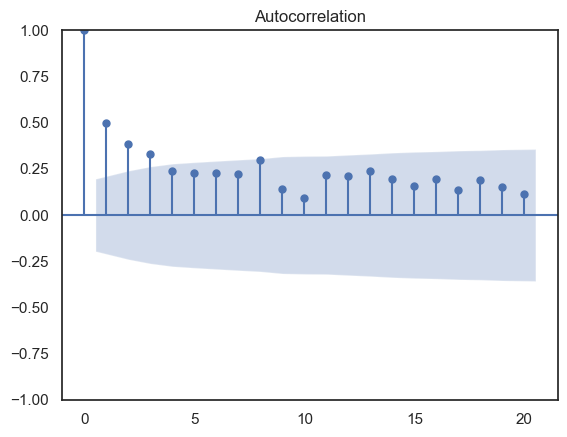

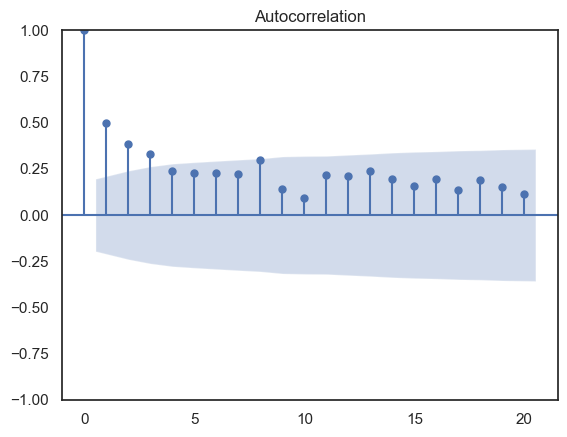

In [608]:
plot_acf(nile) # MA(q)의 값 확인 가능?

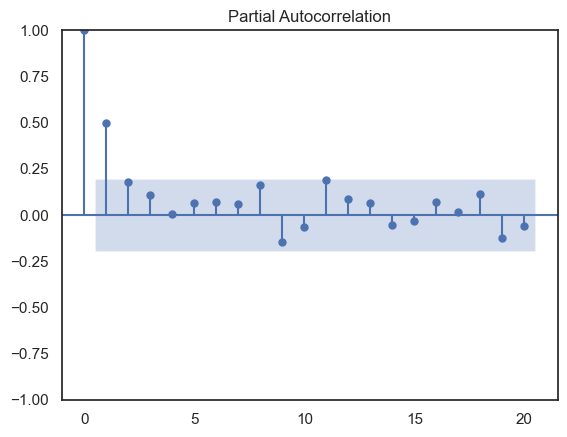

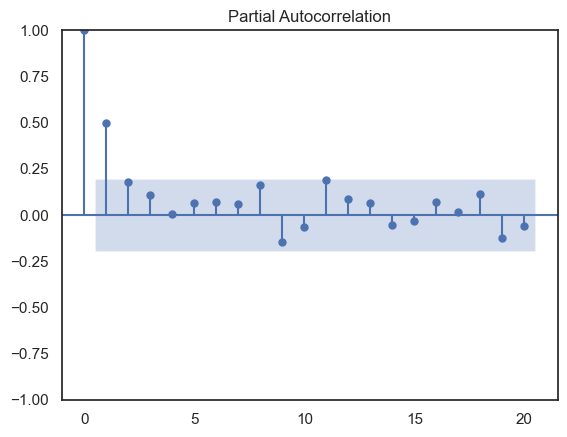

In [609]:
plot_pacf(nile) # AR(p)의 값 확인 가능?

In [610]:
model = ARIMA(nile, order=(2, 0, 1))
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                  100
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -636.269
Date:                Sun, 13 Aug 2023   AIC                           1282.538
Time:                        20:14:47   BIC                           1295.564
Sample:                             0   HQIC                          1287.810
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        934.4061     77.597     12.042      0.000     782.319    1086.493
ar.L1          1.2100      0.151      8.000      0.000       0.914       1.507
ar.L2         -0.2359      0.133     -1.773      0.076      -0.497       0.025
ma.L1         -0.8431      0.102     -8.287      0.000      -1.043      -0.644
sigma2      1.954e+04   3019.315      6.473      0.000    1.36e+04    2.55e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.23
Prob(Q):                              0.84   Prob(JB):                         0.89
Heteroskedasticity (H):               0.61   Skew:                            -0.02
Prob(H) (two-sided):                  0.16   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [611]:
forecast_data = res.forecast(steps=10, alpha=0.05) 

In [612]:
pred_y = forecast_data
pred_y.index = range(1971, 1981) # index 조정

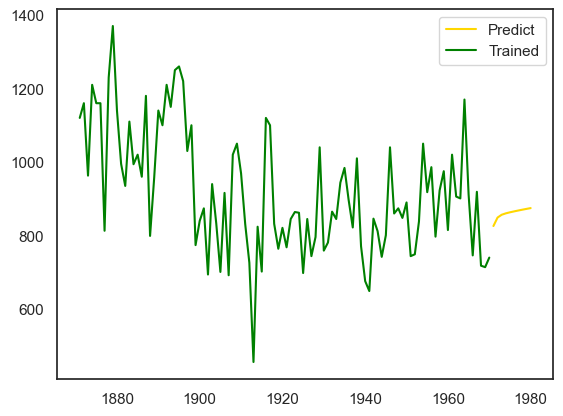

In [613]:
plt.plot(pred_y, color="gold", label='Predict') # 모델이 예상한 가격 그래프
plt.plot(nile['value'], color="green" , label='Trained') # 실제 가격 그래프
plt.legend()
plt.show()

In [614]:
### air passengers data
data = pd.read_csv('./data/AirPassengers.csv')
data = data.rename(columns = {'Month':'month', '#Passengers':'passengers'})
data['month'] = pd.to_datetime(data['month'])
data = data.set_index('month') ### 시간 컬럼을 인덱스로 만들어줌
data.head()

passengers
month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121

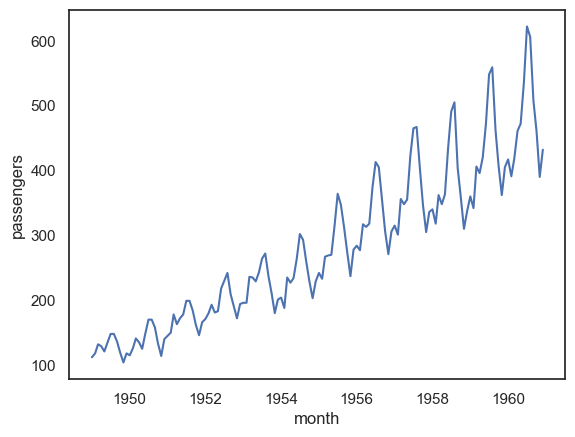

In [615]:
sns.lineplot(x=data.index, y='passengers', data=data)
plt.show()

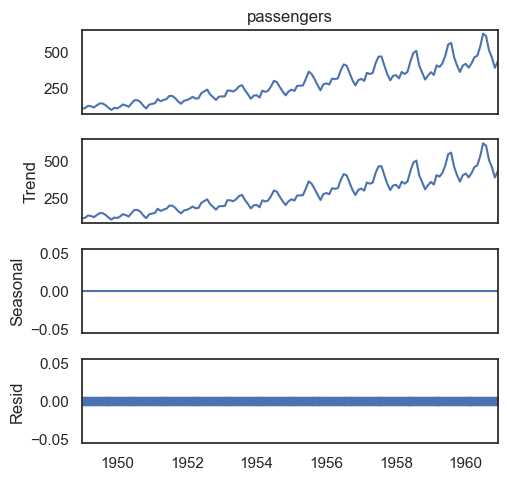

In [616]:
decomposition = sm.tsa.seasonal_decompose(data['passengers'], model = 'additive', period=1)
fig = decomposition.plot()
fig.set_size_inches(5, 5)
plt.show()

In [617]:
from sklearn.model_selection import train_test_split

In [618]:
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

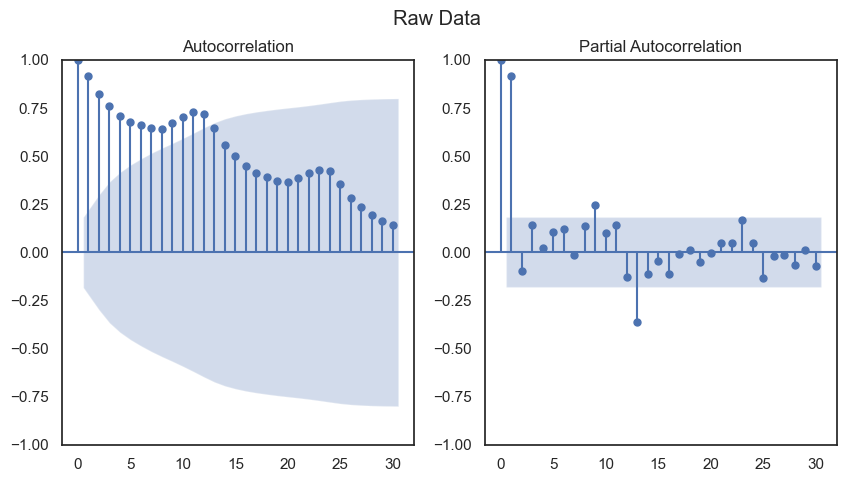

In [619]:
# ACF, PACF plot
fig, ax = plt.subplots(1,2, figsize = (10, 5))
fig.suptitle('Raw Data')
sm.graphics.tsa.plot_acf(train_data.values.squeeze(), lags = 30, ax = ax[0])
sm.graphics.tsa.plot_pacf(train_data.values.squeeze(), lags = 30, ax = ax[1])
plt.show()
### ACF 그래프가 점진적으로 감소하는 것은 전형적인 Non-stationary 데이터이다 = 정상성이 없음

In [620]:
# Differencing
diff_train_data = train_data.copy()
diff_train_data = diff_train_data['passengers'].diff()
diff_train_data = diff_train_data.dropna()

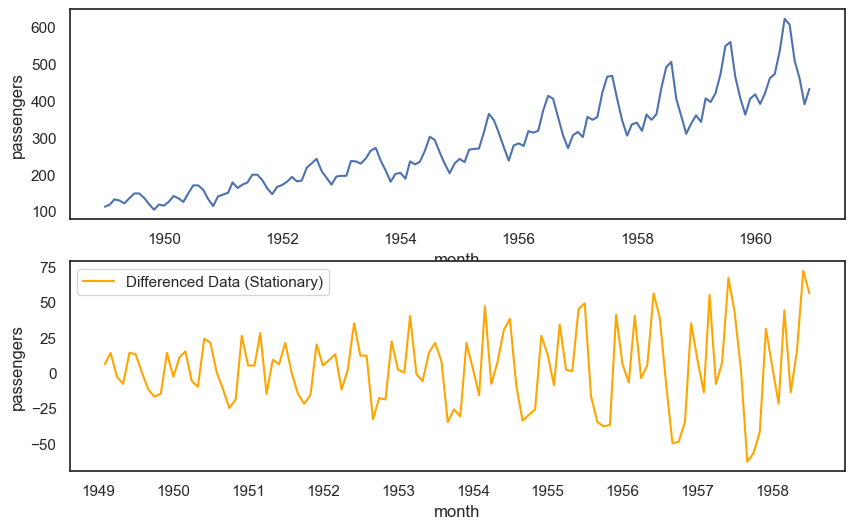

In [621]:
# differenced data plot
plt.figure(figsize = (10, 6))
plt.subplot(211)
sns.lineplot(x=data.index, y='passengers', data=data)
plt.subplot(212)
sns.lineplot(x=diff_train_data.index, y=diff_train_data, color='orange')
plt.legend(['Differenced Data (Stationary)'])
plt.show()

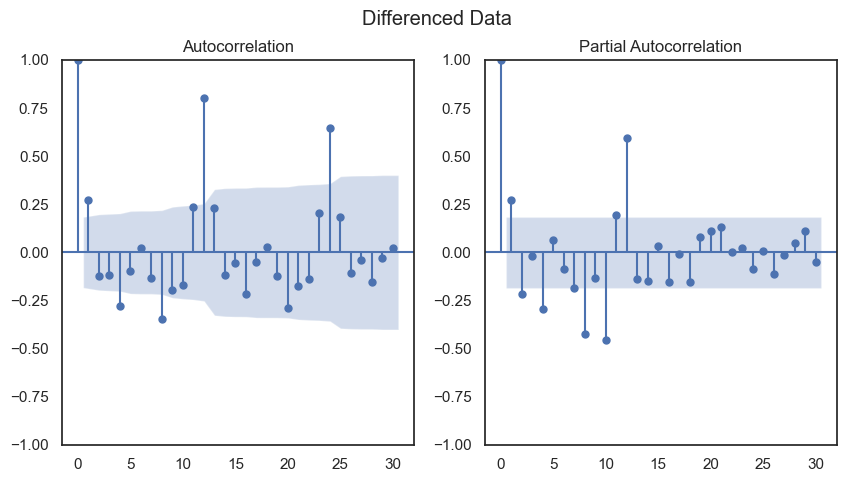

In [622]:
# ACF, PACF plot
# ACF는 sin 곡선의 형태로 점차 감소한다고 보이고, PACF는 애매하지만 Lag 1 이후 절단면을 가지는 것으로 판단하여 AR(1) 모델을 선택함
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Differenced Data')
plot_acf(diff_train_data.values.squeeze(), lags = 30, ax = ax[0])
plot_pacf(diff_train_data.values.squeeze(), lags = 30, ax = ax[1])
plt.show()

In [623]:
# ARIMA model fitting
# The (p, d, q) order of the model for the number of AR parameters, differences, and MA parameters to use.
model = ARIMA(train_data.values, order=(1, 1, 0))
model_fit = model.fit()
model_fit.summary()

# AIC 값은 1068.54

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  115
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -532.268
Date:                Sun, 13 Aug 2023   AIC                           1068.536
Time:                        20:14:49   BIC                           1074.008
Sample:                             0   HQIC                          1070.757
                                - 115                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2904      0.089      3.278      0.001       0.117       0.464
sigma2       664.7320     89.253      7.448      0.000     489.800     839.664
===================================================================================
Ljung-Box (L1) (Q):                   0.32   Jarque-Bera (JB):                 3.25
Prob(Q):                              0.57   Prob(JB):                         0.20
Heteroskedasticity (H):               6.18   Skew:                             0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [624]:
# Parameter search
print('Examples of parameter combinations for ARIMA...')
p = range(0, 3)
d = range(1, 2)
q = range(0, 3)

pdq = list(itertools.product(p, d, q))
pdq

Examples of parameter combinations for ARIMA...


[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2)]

In [625]:
aic=[]
for i in pdq:
    model = ARIMA(train_data.values, order=(i))
    model_fit = model.fit()
    print(f'ARIMA: {i} >> AIC : {round(model_fit.aic, 2)}')
    aic.append(round(model_fit.aic,2))

# Search optimal parameters
optimal = [(pdq[i], j) for i, j in enumerate(aic) if j == min(aic)]
optimal

ARIMA: (0, 1, 0) >> AIC : 1076.27
ARIMA: (0, 1, 1) >> AIC : 1063.65
ARIMA: (0, 1, 2) >> AIC : 1060.69
ARIMA: (1, 1, 0) >> AIC : 1068.54
ARIMA: (1, 1, 1) >> AIC : 1058.25
ARIMA: (1, 1, 2) >> AIC : 1057.33
ARIMA: (2, 1, 0) >> AIC : 1065.64
ARIMA: (2, 1, 1) >> AIC : 1058.65
ARIMA: (2, 1, 2) >> AIC : 1057.52


[((1, 1, 2), 1057.33)]

In [626]:
# 위 최적 값으로 만든 모델 다시 Summary
model_opt = ARIMA(train_data.values, order = optimal[0][0])
model_opt_fit = model_opt.fit()
model_opt_fit.summary()

# AIC score가 1057.33으로 임의의 모델보다 성능이 좋아졌고, p-value도 모두 유의미하게 나옴

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  115
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -524.664
Date:                Sun, 13 Aug 2023   AIC                           1057.328
Time:                        20:14:49   BIC                           1068.272
Sample:                             0   HQIC                          1061.769
                                - 115                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5387      0.128      4.219      0.000       0.288       0.789
ma.L1         -0.2053      0.122     -1.688      0.091      -0.444       0.033
ma.L2         -0.5606      0.084     -6.647      0.000      -0.726      -0.395
sigma2       578.5728    105.827      5.467      0.000     371.155     785.991
===================================================================================
Ljung-Box (L1) (Q):                   0.52   Jarque-Bera (JB):                 4.81
Prob(Q):                              0.47   Prob(JB):                         0.09
Heteroskedasticity (H):               5.54   Skew:                             0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [627]:
### Model for predict
prediction = model_opt_fit.forecast(steps=len(test_data), alpha=0.05)
predicted_value = prediction[0]

In [628]:
from sklearn.metrics import r2_score

In [629]:
prediction = model_opt_fit.forecast(len(test_data))
predicted_value = prediction[0]
predict_index = list(test_data.index)

r2 = r2_score(test_data, prediction)

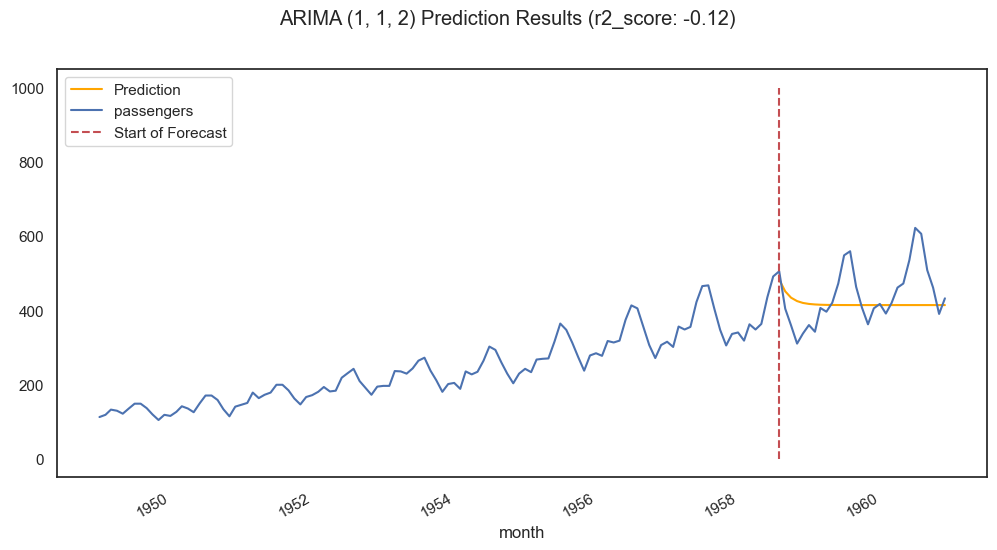

In [630]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(predict_index, prediction, color = 'orange', label = 'Prediction') # 예측값(위 vline 이후 구간에 표시됨)

data.plot(ax = ax);
ax.vlines('1958-08-01', 0, 1000, linestyle = '--', color = 'r', label = 'Start of Forecast') # x좌표를 날짜로 적음
ax.legend(loc='upper left')
plt.suptitle(f'ARIMA {optimal[0][0]} Prediction Results (r2_score: {round(r2,2)})')

plt.show()

# 빨간 점선 이후의 주황색 선이 예측값
# 대체로 추세를 따라가나 피크 값을 완벽히 예측하기에는 다소 무리가 있는 것을 볼 수 있다.
# R2 score도 마이너스인 것을 확인할 수 있었다.

### (2) SARIMA
- Seasonal ARIMA
- 총 7개의 파라미터 존재. trend에 대한 부분(p, d, q)과 seasonal에 대한 부분(P, D, Q, m)
    - trend 파라미터는 ARIMA와 동일
    - P: pacf에서 계절성이 주기가 몇 번 반복 됐는지 확인
    - D: 계절성이 있는지 확인하고 계절성 차분의 필요성에 따라 1 or 0
    - Q: acf기준 계절성 주기가 몇 번 반복 됐는지 확인
    - m: 계절성 주기
- 모델 검증
    - Ljung-Box(L1): 잔차가 white noise를 따르는지 확인
        - 귀무가설: 잔차가 white noise를 따른다
        - p-value가 낮으면 white noise를 따르지 않고 시간대 별 잔차가 corrleated 되어 있는 것으로 판단
    - Jarque-Bera : 잔차의 정규성 판단
        - 귀무가설: 잔차가 normal distribution을 따른다
    - Heteroskedasticity: 각 시간대 별 잔차의 분산이 일정한지 확인
        - 귀무가설: 잔차의 분산이 일정하다

In [631]:
# !pip install pmdarima
from pmdarima import auto_arima

In [ ]:
auto_model = auto_arima(training, start_p=0, d=1, start_q=0,
                        max_p=3, max_q=3, 
                        start_P=0, start_Q=0,
                        max_P=3, max_Q=3, m=12,
                        seasonal=True, information_criterion='aic',
                        trace=True)

In [ ]:
auto_model.summary()

In [ ]:
# 학습 데이터셋으로부터 test 데이터 길이만큼 예측
auto_pred_y = pd.DataFrame(auto_model.predict(n_periods=len(test)), index=test.index) 
auto_pred_y.columns = ['predicted_price']
auto_pred_y

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(training, label="Train") # Train 데이터 
plt.plot(auto_pred_y, label="Prediction") # 모델이 예상한 그래프 
plt.plot(test, label="Test") # 실제 가격 그래프 
plt.legend(loc='upper left')
plt.show()

In [ ]:
print("r2_score : ", r2_score(test_y, auto_pred_y))
RMSE = mean_squared_error(test_y, auto_pred_y)**0.5
print("RMSE : " , RMSE)

In [ ]:
### air passengers data
auto_arima_model = auto_arima(train_data, start_p=1, start_q=1, # p, q 시작값
                             max_p=3, max_q=3, # p, q 최대값
                             m=12, seasonal=True, # 계절성 있는지와 구간(True = SARIMA) / 계절성 없다고 생각되면 m빼고, False
                             d=1, D=1, # 차분 최소, 최대
                             max_P=3, max_Q=3, # P, Q 최대  ## start_P, start_Q의 default 값은 1이라 생략했음
                             trace=True,  # 각 결과값은 print 해줌
                             error_action='ignore',
                             suppress_warnings=True,
                             stepwise=False)

In [ ]:
auto_arima_model.summary()

In [ ]:
prediction = auto_arima_model.predict(len(test_data), return_conf_int=True)
predicted_value = prediction[0]
predicted_ub = prediction[1][:,0]
predicted_lb = prediction[1][:,1]
predict_index = list(test_data.index)
r2 = r2_score(test_data, predicted_value)

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(predict_index, predicted_value, color = 'orange', label = 'Prediction') # 예측값(위 vline 이후 구간에 표시됨)
ax.fill_between(predict_index, predicted_lb, predicted_ub, color = 'k', alpha = 0.1, label = '0.95 Prediction Interval')

data.plot(ax = ax);
ax.vlines('1958-08-01', 0, 700, linestyle = '--', color = 'r', label = 'Start of Forecast') # x좌표를 날짜로 적음
ax.legend(loc='upper left')
plt.suptitle(f'SARIMA {optimal[0][0][0]},{optimal[0][0][1]} Prediction Results (r2_score: {round(r2,2)})')

plt.show()

# 예측 값의 추세가 실제 값을 상당히 잘 따라가고 있으며,
# r2 score가 0.89로 훨씬 더 성능이 향상됨
# 계절성을 반영한 것이 예측 성능을 향상시키는데 기여를 했다고 볼 수 있다.

In [ ]:
### J&J data: for native sarima
data = pd.read_csv('./data/jj.csv')
data.head()

In [ ]:
plt.figure(figsize=[10, 5]); # Set dimensions for figure
sns.lineplot(x=data['date'], y=data['data'])
plt.title('Quarterly EPS for Johnson & Johnson')
plt.ylabel('EPS per share ($)')
plt.xlabel('Date')
plt.xticks(rotation=90)# Augmented Dickey-Fuller test

ad_fuller_result = adfuller(data['data'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')
plt.show()

In [ ]:
plot_acf(data['data']);
plot_pacf(data['data']);

In [ ]:
# Augmented Dickey-Fuller test
ad_fuller_result = adfuller(data['data'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

In [ ]:
# Take the log difference to make data stationary
data['data'] = np.log(data['data'])
data['data'] = data['data'].diff()
data = data.drop(data.index[0])

In [ ]:
plt.figure(figsize=[10, 5]); # Set dimensions for figure
sns.lineplot(data['data'])
plt.title("Log Difference of Quarterly EPS for Johnson & Johnson")
plt.show()

In [ ]:
# Seasonal differencing
data['data'] = data['data'].diff(4)
data = data.drop([1, 2, 3, 4], axis=0).reset_index(drop=True)
data.head()

In [ ]:
plt.figure(figsize=[10, 5]); # Set dimensions for figure
plt.plot(data['data'])
plt.title("Log Difference of Quarterly EPS for Johnson & Johnson")
plt.show()

In [ ]:
# Augmented Dickey-Fuller test
ad_fuller_result = adfuller(data['data'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product

In [ ]:
def optimize_SARIMA(parameters_list, d, D, s, exog):
    """
        Return dataframe with parameters, corresponding AIC and SSE
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
        exog - the exogenous variable
    """
    
    results = []
    
    for param in parameters_list:
        model = SARIMAX(exog, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        aic = model.aic
        results.append([param, aic])

    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)x(P,Q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [ ]:
p = range(0, 4, 1)
d = 1
q = range(0, 4, 1)
P = range(0, 4, 1)
D = 1
Q = range(0, 4, 1)
s = 4

parameters = product(p, q, P, Q)
parameters_list = list(parameters)

In [ ]:
result_df = optimize_SARIMA(parameters_list, d, D, s, data['data'])

In [ ]:
result_df[result_df.AIC==result_df.AIC.min()]

In [ ]:
best_model = SARIMAX(data['data'], order=(0, 2, 0), seasonal_order=(0, 2, 0, 2)).fit(dis=-1)
best_model.summary()

In [ ]:
best_model.plot_diagnostics(figsize=(10, 8));

In [ ]:
data['arima_model'] = best_model.fittedvalues
data['arima_model'][:2 + 1] = np.NaN # 첫 주기까지(여기서는 2)는 NaN으로 처리하는 듯

forecast = best_model.predict(start=data.shape[0], end=data.shape[0] + 8)
forecast = data['arima_model']._append(forecast)

plt.figure(figsize=(10, 5))
sns.lineplot(forecast, color='red', label='model')
plt.axvspan(data.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
sns.lineplot(data['data'], label='actual')
plt.legend()
plt.show()

### (3) MARIMA
- Multi-variate ARIMA
- VAR (Vector AR)

In [ ]:
air_quality = pd.read_excel('./data/AirQualityUCI.xlsx')
air_quality.head()

In [ ]:
air_quality['Date_Time'] = air_quality['Date'].astype(str) + ' ' + air_quality['Time'].astype(str)

In [ ]:
air_quality['Date_Time'] = pd.to_datetime(air_quality.Date_Time , format = '%Y-%m-%d %H:%M:%S')
air_quality.index = air_quality.Date_Time
air_quality = air_quality.drop(['Date_Time', 'Date', 'Time'], axis=1)

In [ ]:
air_quality = air_quality.dropna()
air_quality.info()

In [ ]:
air_quality

In [ ]:
### Granger 인과검정
# VAR 예측을 수행하기 전에 해당 변수들이 모두 상호연관성이 있는가를 확인해줄 필요가 있다.
# Granger 인과검정의 영가설은 X가 Y에 영향을 미치지 않는다 이다. 즉, 검정 결과 p_value가 유의수준 0.05 이하라면 영가설을 기각하고 해당 변수를 예측모델의 인자로 사용하도록 한다.
df_pairs = pd.DataFrame(data=np.zeros((len(air_quality.columns), len(air_quality.columns))),
                        columns = ['X_'+ x for x in air_quality.columns],
                        index = ['Y_'+ x for x in air_quality.columns])

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

In [ ]:
maxlag = 14
for col_i, col in enumerate(air_quality.columns):
    for idx_i, idx in enumerate(air_quality.columns):
        outs = grangercausalitytests(air_quality[[col,idx]], maxlag=maxlag)
        pval_min = np.min([round(outs[x][0]['ssr_chi2test'][1],2) for x in range(1, maxlag + 1)])
        df_pairs.iloc[idx_i, col_i] = pval_min

In [ ]:
df_pairs

In [ ]:
plt.figure(figsize=(30, 6))
ax = sns.heatmap(df_pairs, annot=True, cmap='Blues')
ax.xaxis.tick_top()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
# 상호 영향이 일부 없는 변수 제거 -> AH, T, RH
air_quality = air_quality.drop(['AH', 'T', 'RH'], axis=1)

In [ ]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

In [ ]:
### 공적분 검정(혹은 요한슨 검정)은 다중 시계열 간 적분상 균형관계가 존재하는가를 판단한다.
# 즉, Granger 검정이 단일 시계열보다 다중 시계열로 설명력을 더 얻을수 있는가? 를 확인해주었다면, Cointegration 검정은 다중 시계열이 장기적 기간을 두고 안정적인 연관성을 보이는가? 를 확인해준다.

In [ ]:
def calc_sig_dist(cols):
    out = coint_johansen(air_quality[cols], 1, 1)
    stats = [round(x,2) for x in out.lr1]
    sigs = [round(x,2) for x in out.cvt[:, 1]]
    yns = [x>y for x,y in zip(stats,sigs)]
    dist = np.mean(np.array(stats) - np.array(sigs))
    
    print('stats: ',stats)
    print('sig-level: ',sigs)
    print('significant_yn: ',[x>y for x,y in zip(stats,sigs)])
    print('dist: ', round(dist,2))

In [ ]:
calc_sig_dist(air_quality.columns)

In [ ]:
target_lag = 30

df_train = air_quality.iloc[:-target_lag, :]
df_test = air_quality.iloc[-target_lag:, :]

print(df_train.shape, df_test.shape)

In [ ]:
### 정상성 확인
# 모든 변수가 정상성 만족
for col in air_quality.columns:
    adf_sample = adfuller(df_train[col], autolag='AIC') # AIC가 가장 낮은 lag(시차)를 자동 선택
    print(col, adf_sample)

In [ ]:
from statsmodels.tsa.api import VAR

In [ ]:
# 첫 데이터를 0으로 변환하고, 첫 날 대비 변화량을 보여주는 정규화
df_train_norm = (df_train / df_train.iloc[0]) - 1
df_train_norm

In [ ]:
# AIC가 10 이상인 경우 보통 모델링 결과가 좋지 않은 것으로 판단함
var = VAR(df_train_norm)
var.select_order(maxlags=30).summary()

In [ ]:
model = var.fit(26)
model.summary()

In [ ]:
model.resid.corr()

In [ ]:
from statsmodels.stats.stattools import durbin_watson

In [ ]:
durbin_res = pd.DataFrame([model.resid.columns, [round(x, 2) for x in durbin_watson(model.resid)]]).T
durbin_res.set_index([0])

In [ ]:
# model의 lag
model.k_ar

In [ ]:
ins = df_train_norm.values[-model.k_ar:] # train data의 마지막 26개

f = model.forecast(y=ins, steps=7)
df_f = pd.DataFrame(f, columns=df_train_norm.columns)

df_f_denom = (df_f +1).mul(df_train.iloc[0].to_numpy()) # 역정규화. 만약 차분을 진행했을 경우, 차분 결과도 원래 값으로 돌려줘야 함
df_f_denom.index = df_test.index[:7]

In [ ]:
df_f_denom

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
#check rmse
for i in air_quality.columns:
    print('rmse value for', i, 'is : ', np.sqrt(mean_squared_error(df_f_denom[i], df_test.iloc[:7][i])))

In [ ]:
def draw_subplot(axes, ax_i, col):
    d_test = df_test[col].iloc[:7]
    d_pred = df_f_denom[col]
    
    d_test.diff() > 0
    
    axes[ax_i].plot(d_test, label='real')
    axes[ax_i].plot(d_pred, label='pred')
    
    hits = (d_test.diff() < 0) == (d_pred.diff() < 0)
    for i, hit in enumerate(hits):
        if hit:
            if i==0:
                pass
            if i+1==len(hits):
                i==None
            axes[ax_i].fill_between(x=d_test.index[i-1:i+1], 
                                    y1=d_pred[i-1:i+1],
                                    y2=d_test[i-1:i+1], 
                                    color='lightpink', 
                                    alpha=0.1)       
    axes[ax_i].set_title(col)
    axes[ax_i].legend(loc=(1,1))

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,10))

draw_subplot(axes, 0, 'CO(GT)')
draw_subplot(axes, 1, 'PT08.S1(CO)')
draw_subplot(axes, 2, 'NMHC(GT)')

plt.tight_layout()
plt.show()

### (4) Exponential Smoothing
- 직관적이어서 이해하기 쉽고 (ARIMA 대비 상대적으로), 또 시계열 자료의 구성요소가 변동이 느리거나 매우 규칙적(periodic)일 때 예측 정확도가 높음
- 최근 관측한 값에 높은 가중치를 주고, 먼 과거의 관측치에는 낮은 관측치를 주어 가중 평균값을 구함
    - 가중치는 현재로 부터 과거로 갈 수록 지수적으로 감소(exponential decay)시켜서 차등적으로 주는 평활 함수(smoothing function) 사용
    - 여러개의 관측치를 모아서 가중 평균을 사용하기 때문에 "평활(smoothing)"되는 효과가 있음

- 모델의 종류
    - 시계열 자료에 추세(Trend)가 있는지, 추세가 있다면 1차 선형인지 아니면 비선형 인가? 
        - 추세 없음 (No Trend)             --> Simple Exponential Smoothing
        - 1차 선형 추세 (Linear Trend)     --> Two Parameter Exponential Smoothing
        - 2차 비선형 추세 (Quadratic Trend) --> Three Parameter Smoothing
    - 시계열 자료에 계절성(Seasonality)이 있는가? 
        - 계절성 없음 (No Seasonality)
        - 계절성 있음 (with Seasonality)  --> Winters' Method
    - 시계열 자료의 계절성이 시간이 지남에 따라 고정(fixed)되어 있는지 아니면 확산(increasing)되는가? 
        - 고정(상수) 계절 변동 (fixed seasonal variation) --> Additive Model
        - 확산 계절 변동 (increasing seasonal variation) --> Multiplicative Model

In [ ]:
data = pd.read_csv('./data/jj.csv')
train, test = data.iloc[:75,:], data.iloc[75:,:]

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [ ]:
# Simple Exponential Smoothing
model_1 = SimpleExpSmoothing(train['data'], initialization_method="estimated").fit()
pred_1 = model_1.predict(start=test['data'].index[0], end=test['data'].index[-1])
model_1.summary() 

In [ ]:
# Trend
model_2 = Holt(train['data'], initialization_method="estimated").fit()
pred_2 = model_2.predict(start=test.index[0], end=test.index[-1])
model_2.summary() 

In [ ]:
# Multiplicative damped trend
model_3 = Holt(train['data'], exponential=True, damped_trend=True, initialization_method="estimated").fit()
pred_3 = model_3.predict(start=test.index[0], end=test.index[-1])
model_3.summary() 

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
# additive model for fixed seasonal variation
model_4 = ExponentialSmoothing(train['data'], seasonal_periods=4, trend='add', seasonal='add').fit()
pred_4 = model_4.predict(start=test.index[0], end=test.index[-1])
model_4.summary() 

In [ ]:
# multiplicative model for increasing seasonal variation
# 시간이 흐름에 따라 분산이 점점 커지는 경우
model_5 = ExponentialSmoothing(train['data'], seasonal='mul', seasonal_periods=4).fit()
pred_5 = model_5.predict(start=test.index[0], end=test.index[-1])
model_5.summary() 

In [ ]:
## forecasting for seasons
forecast_1 = model_1.forecast(9)
forecast_2 = model_2.forecast(9)
forecast_3 = model_3.forecast(9)
forecast_4 = model_4.forecast(9)
forecast_5 = model_5.forecast(9)

t_p = pd.DataFrame({'test': test['data'], 'f1': forecast_1, 'f2': forecast_2, 'f3': forecast_3, 'f4': forecast_4, 'f5': forecast_5})
t_p

In [ ]:
## evaluation metrics
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE

## UDF for counting the number of parameters in model
def num_params(model):
    n_params = 0

    for p in list(model.params.values()):
        if isinstance(p, np.ndarray):
            n_params += len(p)
            #print(p)
        elif p in [np.nan, False, None]:
            pass
        elif np.isnan(float(p)):
            pass
        else:
            n_params += 1
            #print(p)
    
    return n_params

# Mean Absolute Percentage Error
def SSE(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.sum((y_test - y_pred)**2)

def ME(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(y_test - y_pred)

def RMSE(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.sqrt(np.mean((y_test - y_pred)**2))   
    #return np.sqrt(MSE(y_test - y_pred))

def MPE(y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean((y_test - y_pred) / y_test) * 100

def MAPE(y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

def AIC(y_test, y_pred, T, model):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    sse = np.sum((y_test - y_pred)**2)
    #T = len(y_train) # number of observations
    k = num_params(model) # number of parameters
    return T * np.log(sse/T) + 2*k

def SBC(y_test, y_pred, T, model):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    sse = np.sum((y_test - y_pred)**2)
    #T = len(y_train) # number of observations
    k = num_params(model) # number of parameters
    return T * np.log(sse/T) + k * np.log(T)

def APC(y_test, y_pred, T, model):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    sse = np.sum((y_test - y_pred)**2)
    #T = len(y_train) # number of observations
    k = num_params(model) # number of parameters
    return ((T+k)/(T-k)) * sse / T

def ADJ_R2(y_test, y_pred, T, model):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    sst = np.sum((y_test - np.mean(y_test))**2)
    sse = np.sum((y_test - y_pred)**2)
    #T = len(y_train) # number of observations
    k = num_params(model) # number of parameters
    r2 = 1 - sse/sst
    return 1 - ((T - 1)/(T - k)) * (1 - r2)
    

## Combining all metrics together
def eval_all(y_test, y_pred, T, model):
    sse = SSE(y_test, y_pred)
    mse = MSE(y_test, y_pred)
    rmse = RMSE(y_test, y_pred)
    me = ME(y_test, y_pred)
    mae = MAE(y_test, y_pred)
    mpe = MPE(y_test, y_pred)
    mape = MAPE(y_test, y_pred)
    aic = AIC(y_test, y_pred, T, model)
    sbc = SBC(y_test, y_pred, T, model)
    apc = APC(y_test, y_pred, T, model)
    adj_r2 = ADJ_R2(y_test, y_pred, T, model)
    
    return [sse, mse, rmse, me, mae, mpe, mape, aic, sbc, apc, adj_r2]

In [ ]:
T = train.shape[0]

eval_all_df = pd.DataFrame(
    {'SES': eval_all(test['data'], forecast_1, T, model_1), 
    "Trend": eval_all(test['data'], forecast_2, T, model_2), 
    'Multiplicative T': eval_all(test['data'], forecast_3, T, model_3), 
    'Addictive S': eval_all(test['data'], forecast_4, T, model_4), 
    'Multiplicative S': eval_all(test['data'], forecast_5, T, model_5)}, index=['SSE', 'MSE', 'RMSE', 'ME', 'MAE', 'MPE', 'MAPE', 'AIC', 'SBC', 'APC', 'Adj_R2'])
eval_all_df

In [ ]:
nrows = 2
ncols = 3
pred_idx = {1: pred_1, 2: pred_2, 3: pred_3, 4: pred_4, 5: pred_5}
fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(15, 8))
plt.title('Quarterly EPS for Johnson & Johnson')
plt.ylabel('EPS per share ($)')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.legend()

for i in range(5):
    row = i // 3
    col = i % 3
    sns.lineplot(x=train['date'], y=train['data'], label='Train', ax=axes[row][col])
    sns.lineplot(x=test['date'], y=test['data'], label='Test', ax=axes[row][col])
    axes[row][col].xaxis.set_major_locator(mpl.ticker.MultipleLocator(40))
    sns.lineplot(x=pred_idx[i + 1].index, y=pred_idx[i + 1], label='Simple Smoothing', ax=axes[row][col])

In [ ]:
# horizontal bar chart
sns.barplot(x=eval_all_df.columns, y=eval_all_df.loc['MAPE', :])
plt.title('Mean Absolute Percentage Error (MAPE)', fontsize=16)
plt.show()